In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sea
import pandas as pd
import os
from astropy.io import fits
from astropy.table import Table
import img_scale
from glob import glob
from astropy.wcs import wcs
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

CO(2-1): $\lambda$ 1.3 mm / 1300 $\mu$m

Band 3 84-116 Ghz /  2600-3600 $\mu$m

In [2]:
2600 / 1300 - 1, 3600 / 1300 - 1

(1.0, 1.7692307692307692)

In [2]:
v4S = Table.read(fits.open('/Volumes/Vince_CLEAR/3dhst_V4.4/goodss_3dhst.v4.4.cats/Eazy/goodss_3dhst.v4.4.zout.fits'),
                 format='fits').to_pandas()

v4Scat = Table.read('/Volumes/Vince_CLEAR/3dhst_V4.4/goodss_3dhst.v4.4.cats/Catalog/goodss_3dhst.v4.4.cat',
                 format='ascii').to_pandas()

In [3]:
v4S['use'] = v4Scat['use_phot']
v4S['star'] = v4Scat['class_star']

In [4]:
filesS = glob('/Volumes/Vince_CLEAR/RELEASE_v2.0.0/*S*/*/Prep/*full.png')

allSids = [int(os.path.basename(U).replace('.full.png','').split('_')[1]) for U in filesS]

Sids = np.array(list(set(allSids)))

Spresent = [U in Sids for U in v4S.id]

v4S['R2'] = Spresent

In [5]:
fileS_v1 = glob('/Users/vestrada/Data/CLEAR/RELEASE_v1.0.0/COMBINED/1D/FITS/*S*')
allSids_v1 = [int(os.path.basename(U).replace('.1D.fits','').split('_')[1]) for U in fileS_v1]

Sids_v1 = np.array(list(set(allSids_v1)))
Spresent_v1 = [U in Sids_v1 for U in v4S.id]
v4S['R1'] = Spresent_v1

In [7]:
3 < 4 and v4S.R2[0] or v4S.R1[0]

False

[0, 2.5, 0.5, 2.5]

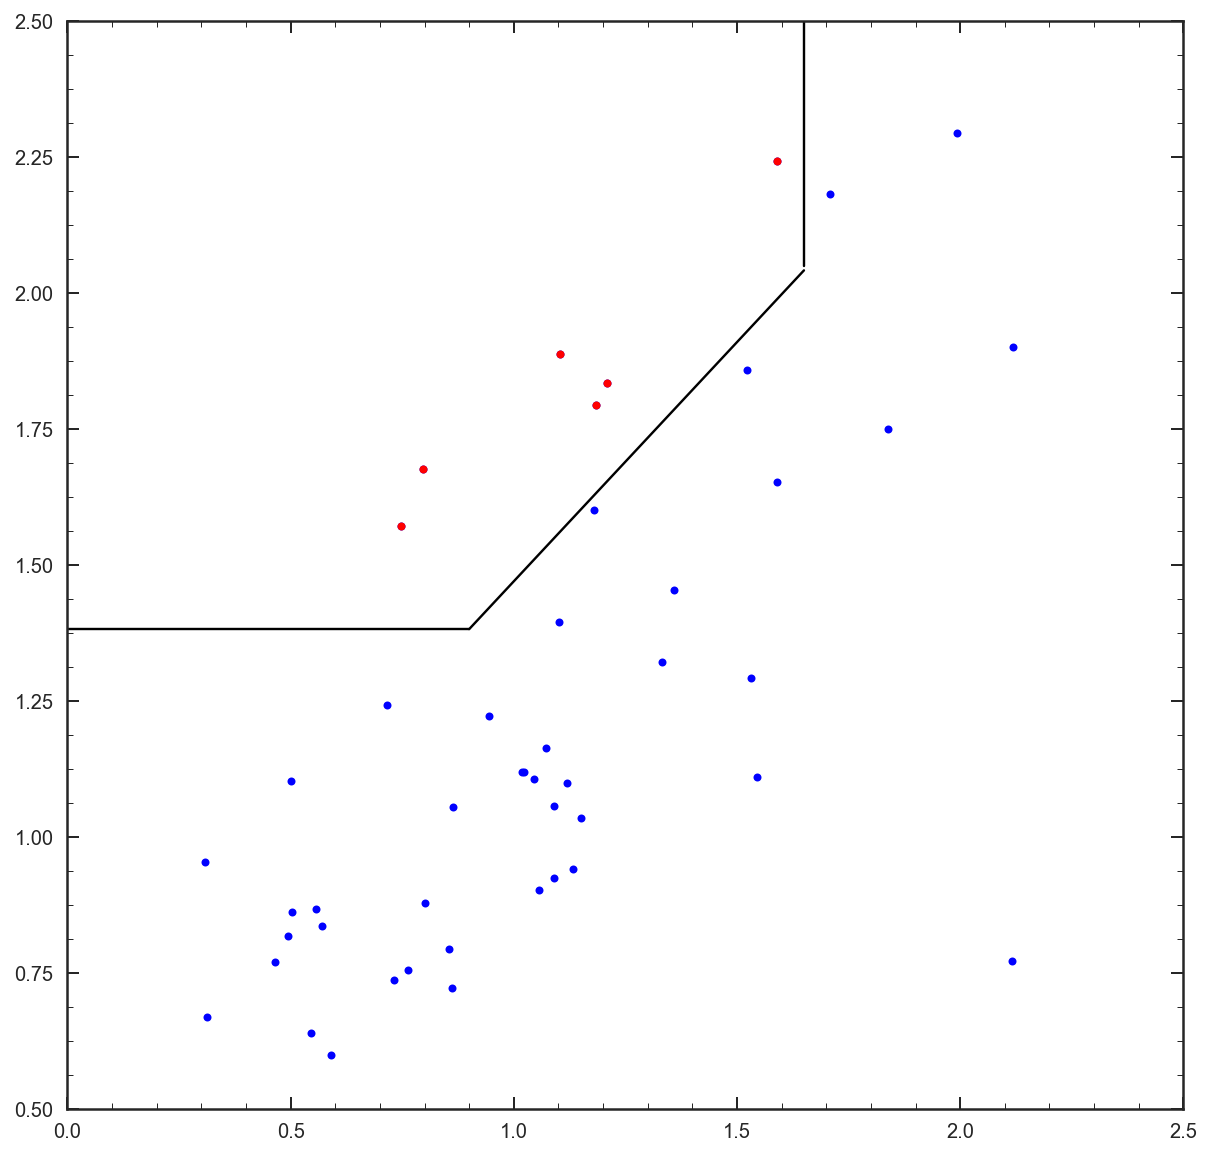

In [6]:
v4S_red = v4S.query('mass > 10**9.8 and 1.5 < z500 < 1.7 and use == 1 and star < 0.8')
v4S_red = v4S_red.query('R2 == True or R1 == True')
def Color(band1, band2):
    m1=-2.5*np.log10(band1)
    m2=-2.5*np.log10(band2)
    return m1-m2

SUV = Color(v4S_red.restU, v4S_red.restV)
SVJ = Color(v4S_red.restV, v4S_red.restJ)

SQ = []
Ssf = []

for i in SUV.index:
    if SUV[i]>=0.88*SVJ[i]+0.59 and SUV[i]>1.382 and SVJ[i]<1.65:
        SQ.append(i)
    else:
        Ssf.append(i)
        
plt.figure(figsize=[10,10])
plt.plot(SVJ, SUV,'bo',ms=4)

plt.plot(SVJ[SQ], SUV[SQ],'ro',ms=4)

plt.plot([0,.9],[1.382,1.382],'k',lw=1.2)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=1.2)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=1.2)
plt.axis([0,2.5,.5,2.5])

In [7]:
SQ_up = np.array([26271, 29256, 38842, 39011, 39363, 40222, 41519, 42112, 42777, 43006, 44041])

In [8]:
len(v4S_red.ra[SQ_up])

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


11

In [9]:
plt.figure(figsize=[8,8])

sflts = glob('/Users/Vince.ec/Clear_data/s_flt_files/*')

dat = fits.open(sflts[0])

dat[0].header['TARGNAME']

def flt_pos(fn):
    flt=fits.open(fn)
    w = wcs.WCS(flt[1].header)

    xpixlim=len(flt[1].data[0])
    ypixlim=len(flt[1].data)

    pos=w.wcs_pix2world([[0,0],[xpixlim, 0],[xpixlim, ypixlim],[0, ypixlim]],1)
            
    return pos

allpos = np.zeros([len(sflts),2,5])

for i in range(len(sflts)):
    p1,p2,p3,p4 = flt_pos(sflts[i])
    allpos[i] = np.array([p1,p2,p3,p4,p1]).T
#     plt.plot(allpos[0],allpos[1], 'k',alpha = 0.1,zorder=1)

# plt.scatter(v4S.ra[SQ_up],v4S.dec[SQ_up],marker='*', s=200, color = 'r')

<Figure size 576x576 with 0 Axes>

In [10]:
np.array([p1,p2,p3,p4,p1]).T

array([[ 53.17350352,  53.180388  ,  53.14239771,  53.13552601,
         53.17350352],
       [-27.71305064, -27.75071074, -27.75626182, -27.71859984,
        -27.71305064]])

## img pull

In [12]:
seg = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss_3dhst.v4.0.F160W_seg.fits')[0].data
f160 = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss_3dhst.v4.0.F160W_orig_sci.fits')[0].data
f140 = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss_3dhst.v4.0.F140W_orig_sci.fits')[0].data
f125 = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss_3dhst.v4.0.F125W_orig_sci.fits')[0].data
f105 = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss-F105W-astrodrizzle-v4.4_drz_sci.fits')[0].data

In [61]:
v4S.id[SQ_up].values

array([26272, 29257, 38843, 39012, 39364, 40223, 41520, 42113, 42778,
       43007, 44042])

img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh


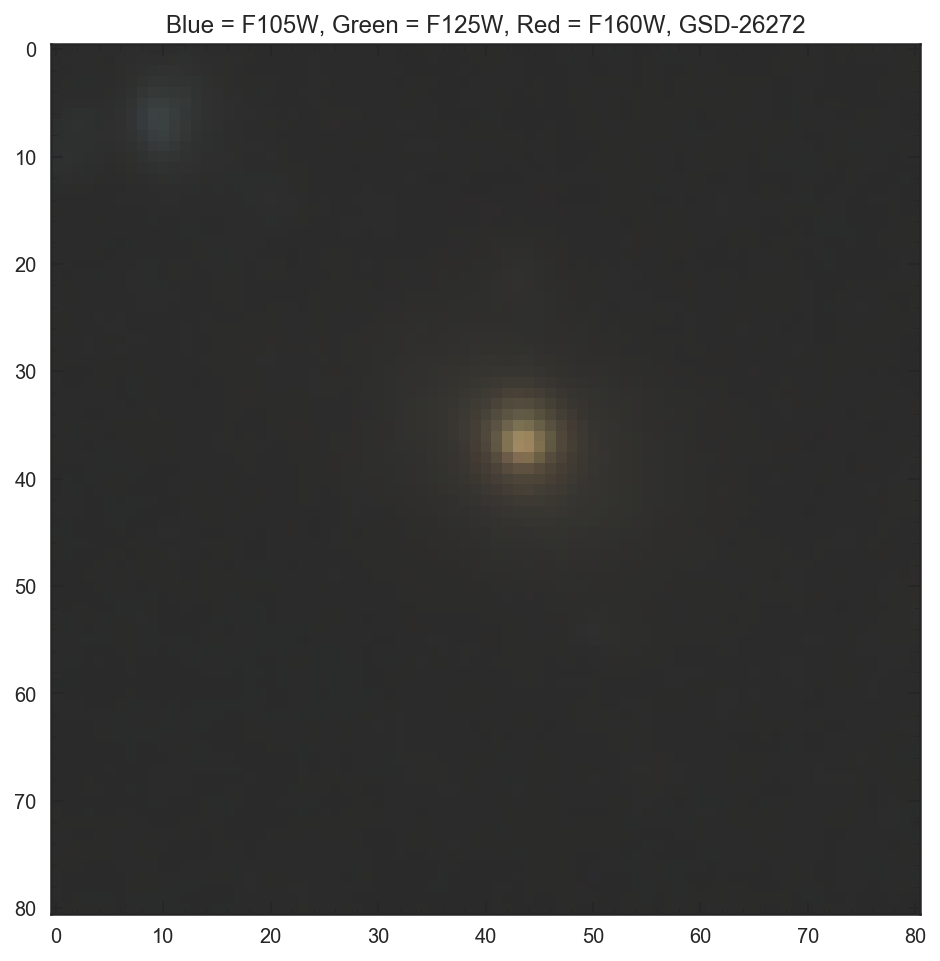

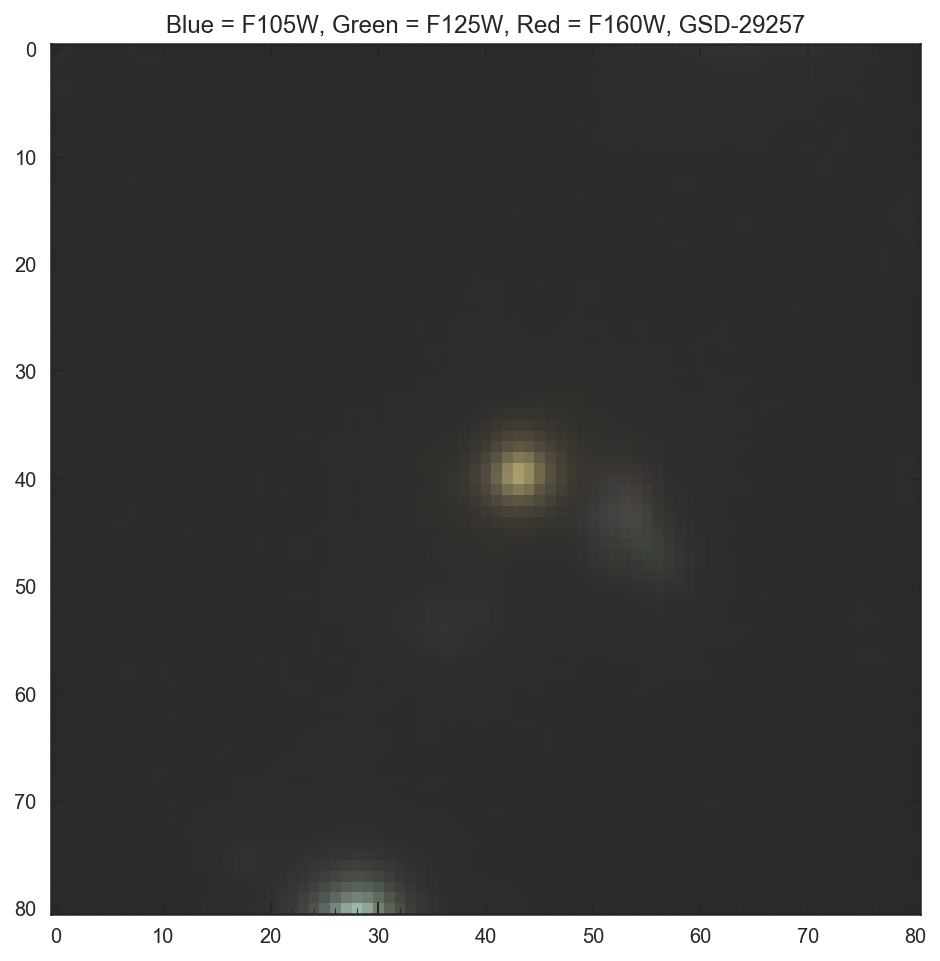

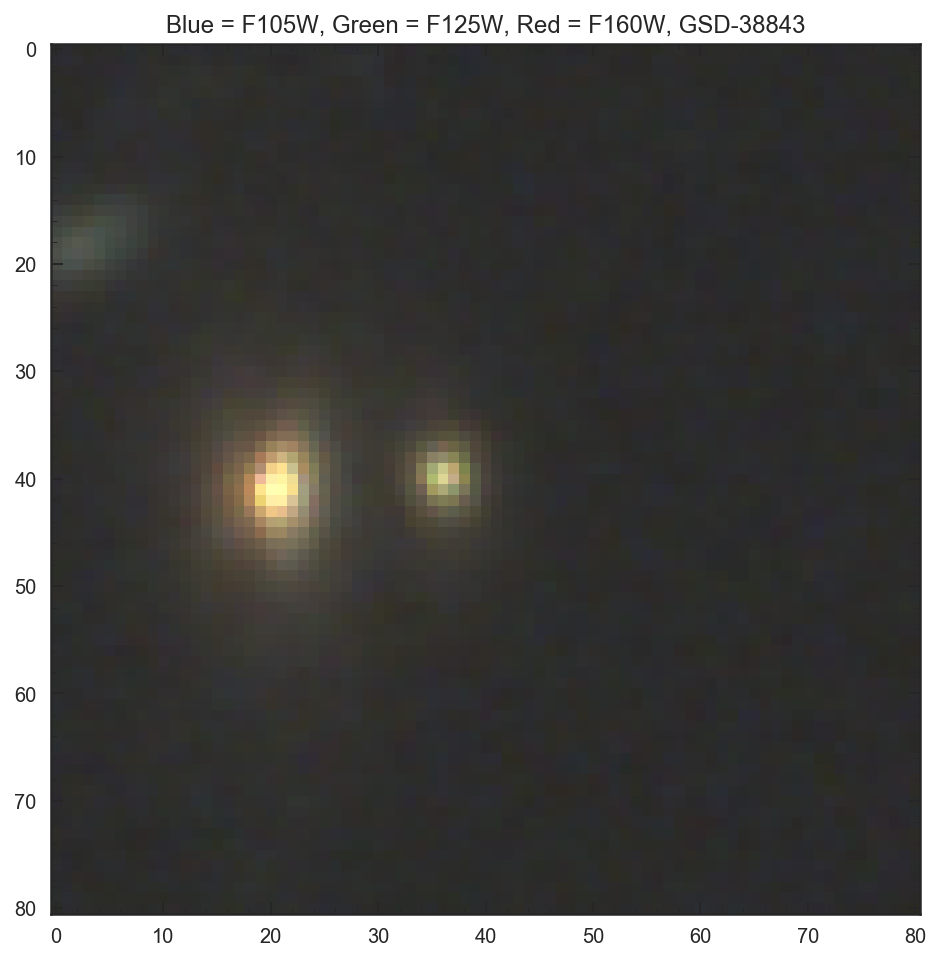

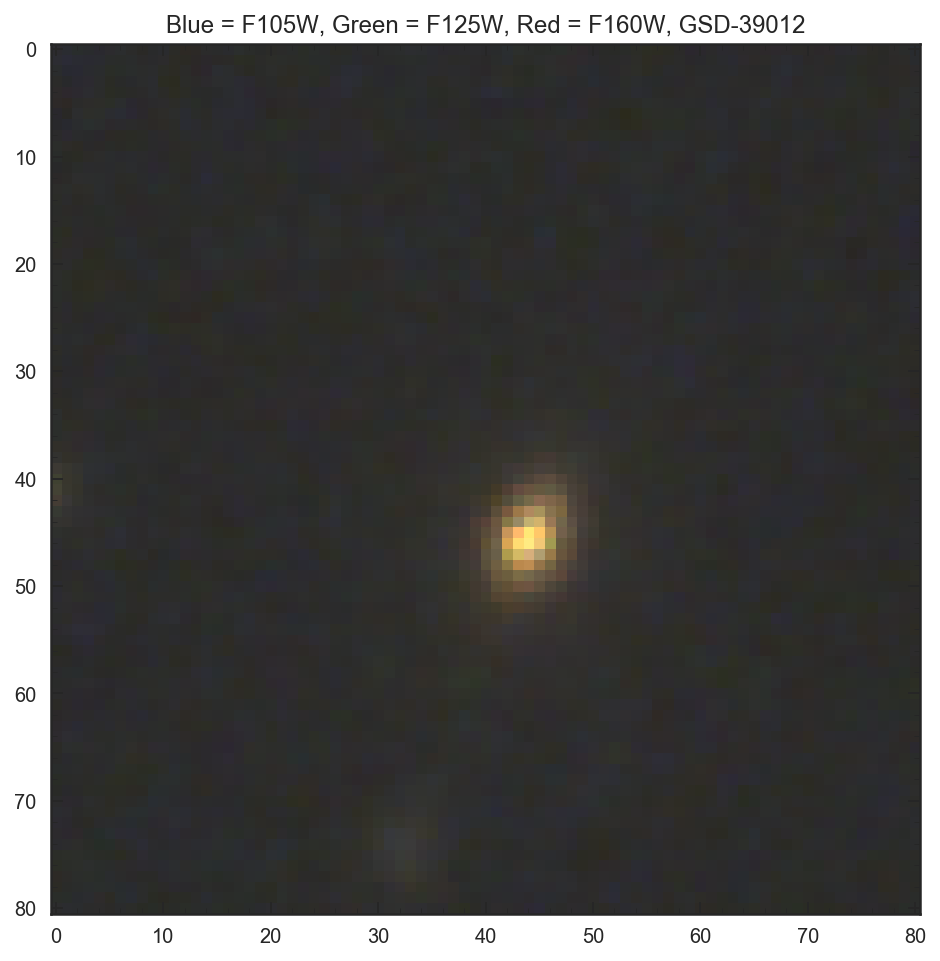

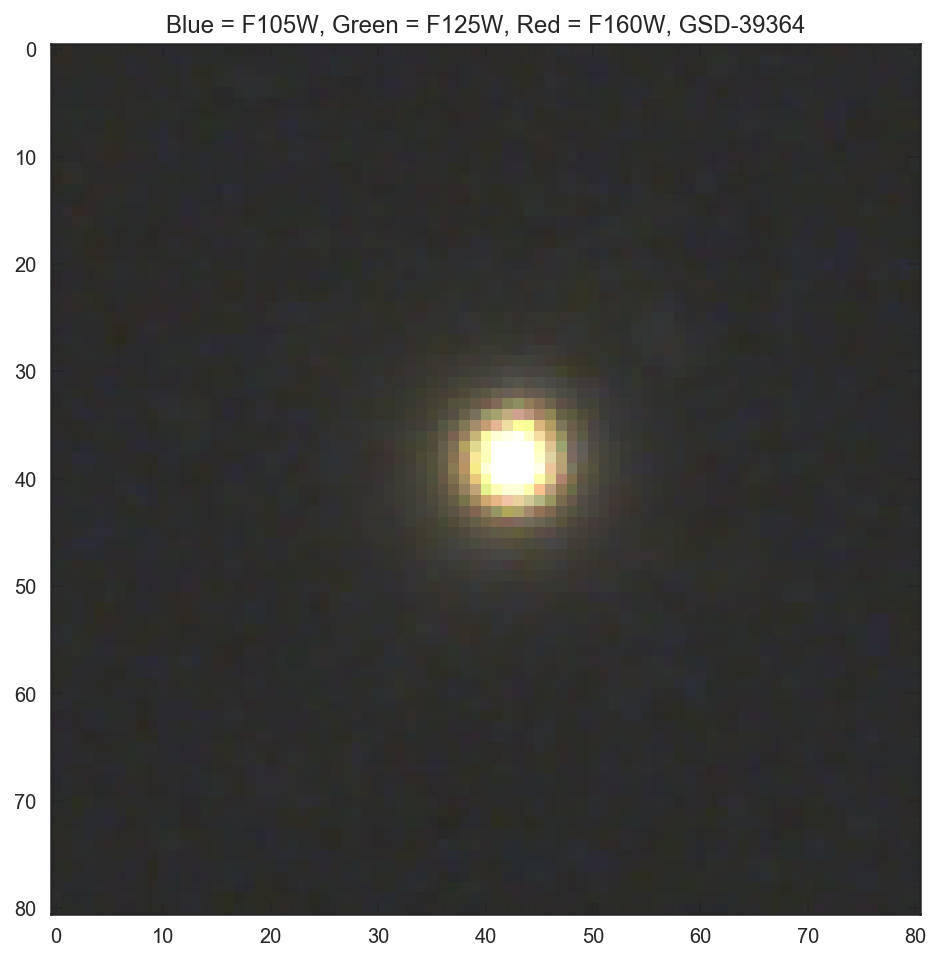

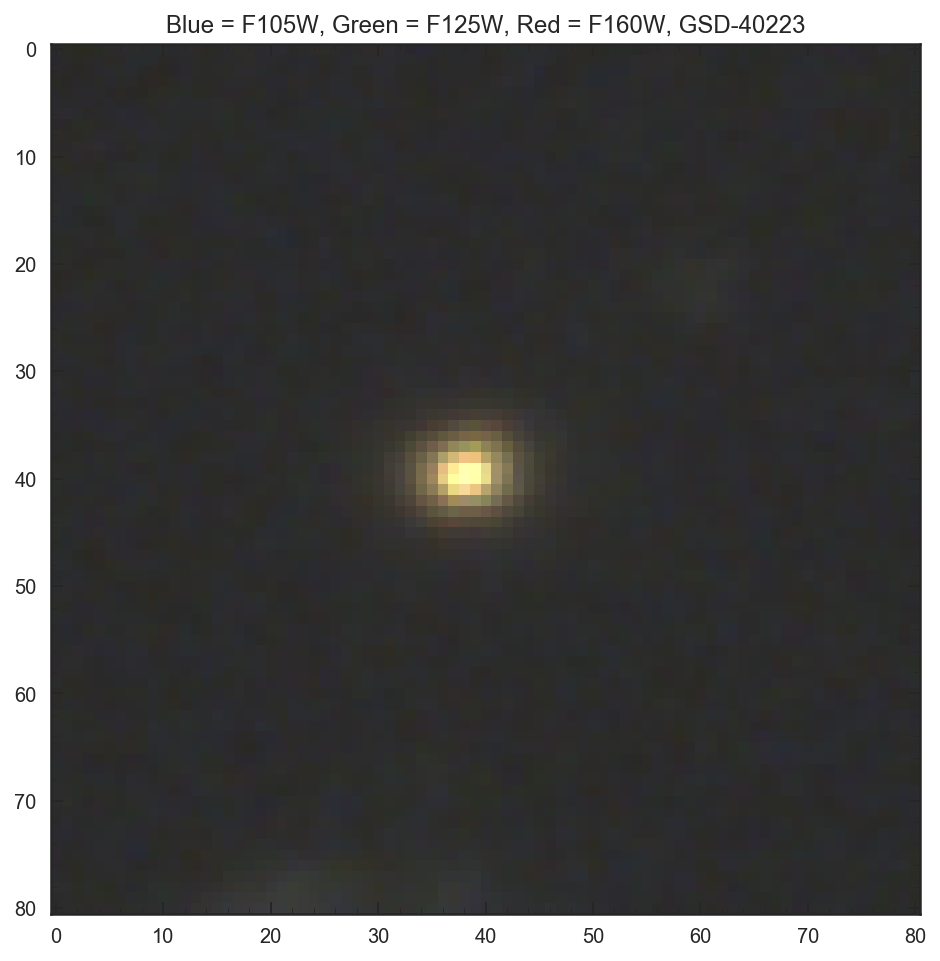

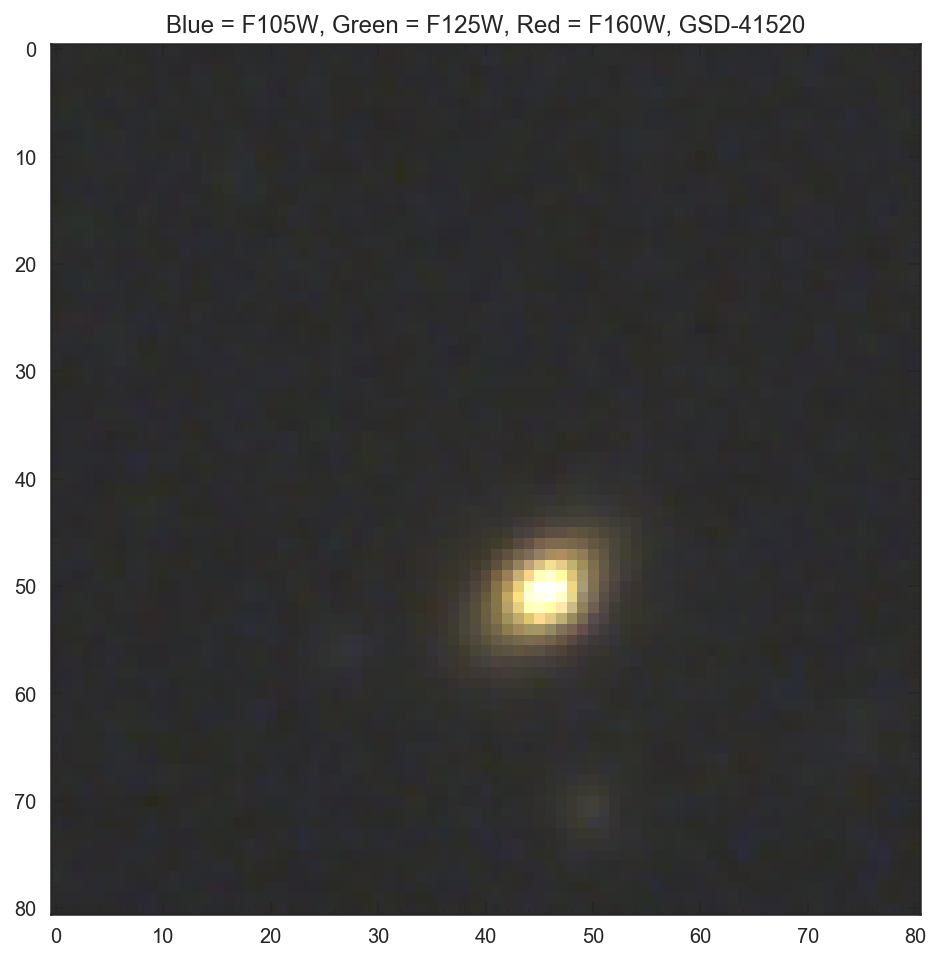

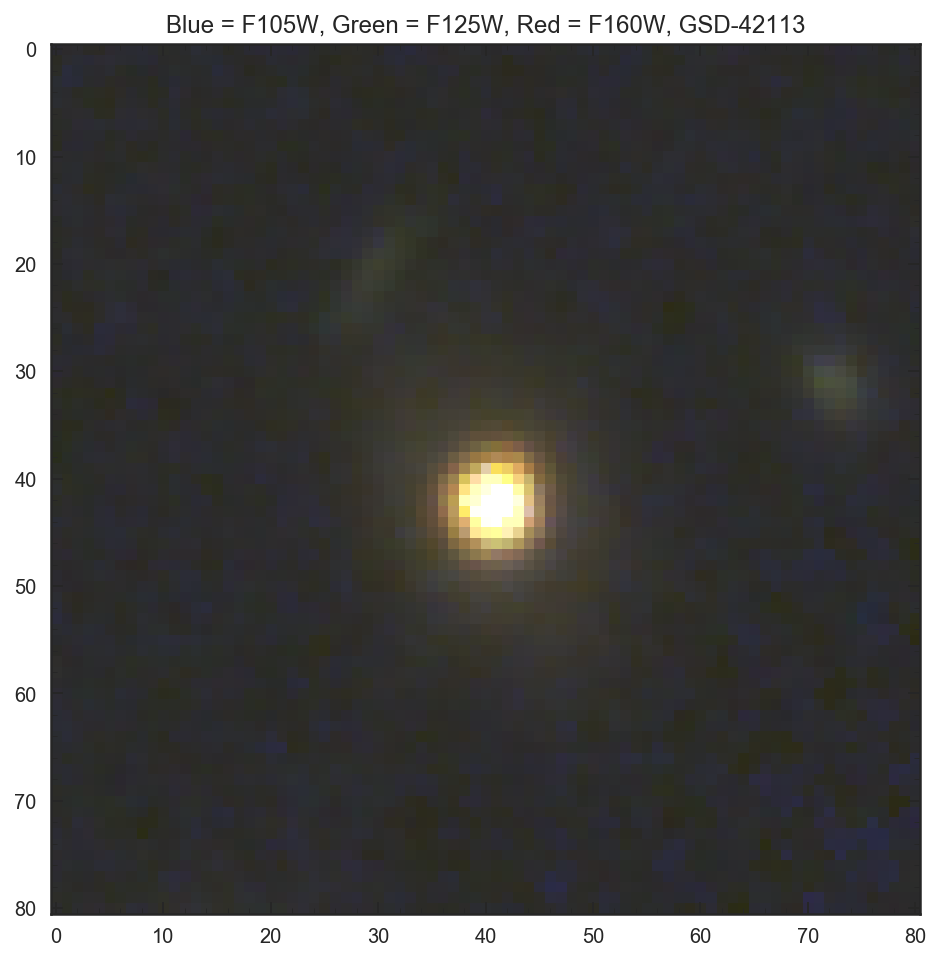

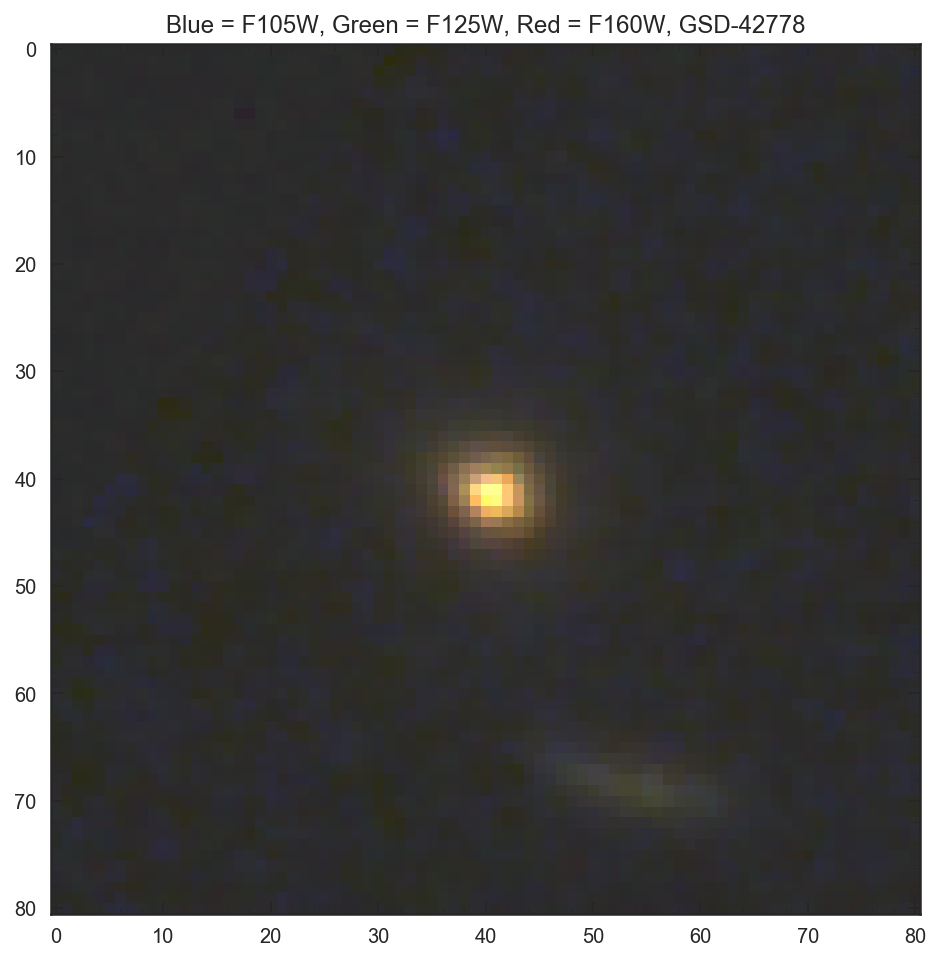

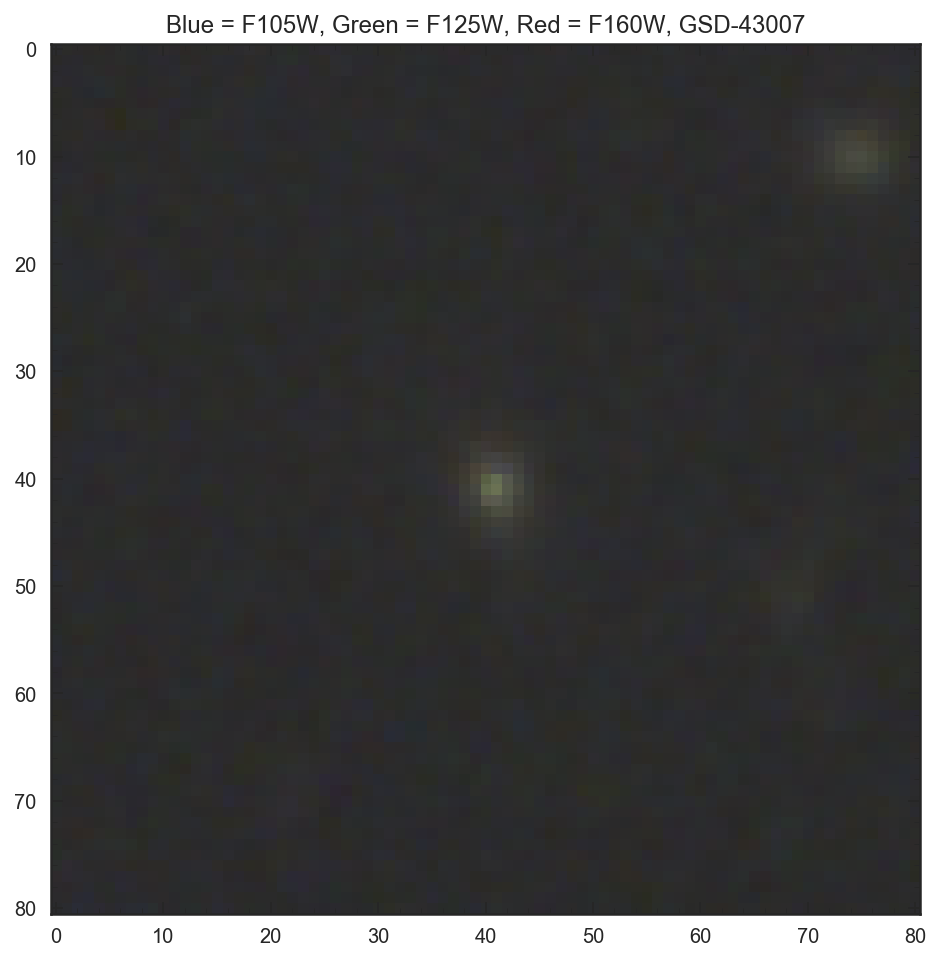

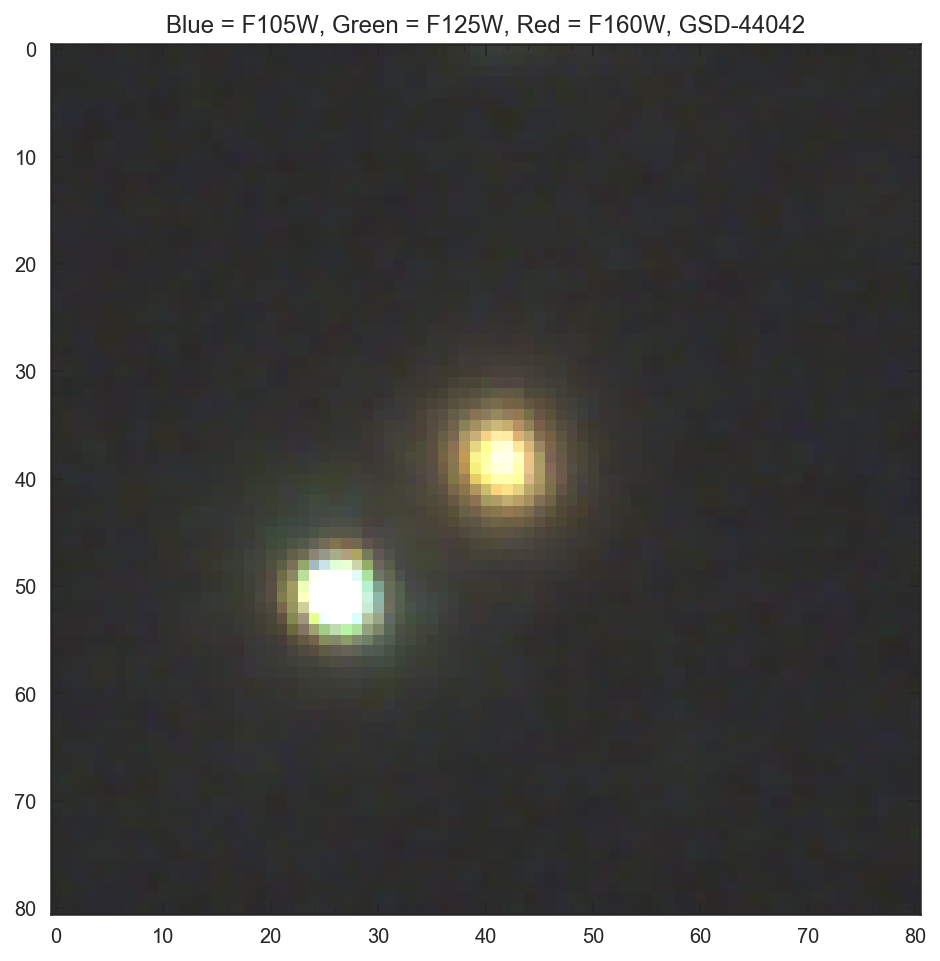

In [13]:
gids = v4S.id[SQ_up].values

for i in gids:
    idx = np.argwhere(seg == i)

    ycnt =int((max(idx.T[0]) + min(idx.T[0])) / 2)
    xcnt = int((max(idx.T[1]) + min(idx.T[1])) / 2)
    
    f105img = f105[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
    f125img = f125[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
    f160img = f160[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]

    img = np.zeros((f125img.shape[0], f125img.shape[1], 3), dtype=float)
    img[:,:,0] = img_scale.asinh(f160img, scale_min=-0.1, scale_max=0.5)
    img[:,:,1] = img_scale.asinh(f125img, scale_min=-0.1, scale_max=0.5)
    img[:,:,2] = img_scale.asinh(f105img, scale_min=-0.1, scale_max=0.5)

    plt.figure(figsize=[8,8])
    plt.imshow(img,aspect='equal')
    plt.title('Blue = F105W, Green = F125W, Red = F160W, GSD-{0}'.format(i))

In [14]:
v4S.id[SQ_up]

26271    26272
29256    29257
38842    38843
39011    39012
39363    39364
40222    40223
41519    41520
42112    42113
42777    42778
43006    43007
44041    44042
Name: id, dtype: int64

In [13]:
from spec_extract import Stack

def Extract_phot(catalog, galaxy_id, masterlist = '../phot/master_template_list.pkl'):

    galdf = catalog[catalog.id == galaxy_id]
    master_tmp_df = pd.read_pickle(masterlist)

    pre= 'S_'

    eff_wv = []
    phot_fl = []
    phot_er = []
    phot_num = []

    for i in galdf.keys():
        if i[0:2] == 'f_':
            Clam = 3E18 / master_tmp_df.eff_wv[master_tmp_df.tmp_name == pre + i].values[0] **2 * 10**((-1.1)/2.5-29)
            if galdf[i].values[0] > -99.0:
                eff_wv.append(master_tmp_df.eff_wv[master_tmp_df.tmp_name == pre + i].values[0])
                phot_fl.append(galdf[i].values[0]*Clam)
                phot_num.append(master_tmp_df.tmp_num[master_tmp_df.tmp_name == pre + i].values[0])
        if i[0:2] == 'e_':
            if galdf[i].values[0] > -99.0:
                phot_er.append(galdf[i].values[0]*Clam)
    
    np.save('../Alma_files/GSD_{0}_phot'.format(galaxy_id),[eff_wv,phot_fl,phot_er,phot_num])

    return eff_wv,phot_fl,phot_er,phot_num


def Extract_spec_R2(galaxy_id):
    spec_list = glob('/Volumes/Vince_CLEAR/RELEASE_v2.0.0/*S*/*/Prep/*{0}*1D.fits'.format(galaxy_id))

    Bwv, Bfl, Ber, Bft, Bln, Bct = [[],[],[],[],[],[]]

    Rwv, Rfl, Rer, Rft, Rln, Rct = [[],[],[],[],[],[]]

    for i in range(len(spec_list)):
        dat = fits.open(spec_list[i])

        try:
            Bwv.append(np.array(dat['G102'].data['wave']).T)
            Bfl.append(np.array(dat['G102'].data['flux']).T)
            Ber.append(np.array(dat['G102'].data['err']).T)
            Bft.append(np.array(dat['G102'].data['flat']).T)
            Bln.append(np.array(dat['G102'].data['line']).T)
            Bct.append(np.array(dat['G102'].data['cont']).T)

        except:
            print('no g102')

        try:
            Rwv.append(np.array(dat['G141'].data['wave']).T)
            Rfl.append(np.array(dat['G141'].data['flux']).T)
            Rer.append(np.array(dat['G141'].data['err']).T)
            Rft.append(np.array(dat['G141'].data['flat']).T)
            Rln.append(np.array(dat['G141'].data['line']).T)
            Rct.append(np.array(dat['G141'].data['cont']).T)

        except:
            print('no g141')

    if len(Bwv) > 0:                
        SBW, SBF, SBE, SBT, SBL, SBC = Stack(Bwv, Bfl, Ber, Bft, Bln, Bct)
        np.save('../Alma_files/GSD_{0}_g102'.format(galaxy_id),[SBW, SBF, SBE, SBT, SBL, SBC])
        IDB = [U for U in range(len(SBW)) if 8750 < SBW[U] < 11350]


    if len(Rwv) > 0:     
        SRW, SRF, SRE, SRT, SRL, SRC = Stack(Rwv, Rfl, Rer, Rft, Rln, Rct)
        np.save('../Alma_files/GSD_{0}_g141'.format(galaxy_id),[SRW, SRF, SRE, SRT, SRL, SRC])        
        IDR = [U for U in range(len(SRW)) if 11300 < SRW[U] < 16500]
        
        
    if len(Bwv) > 0 and len(Rwv) > 0:
        return SBW[IDB], SBF[IDB] / SBT[IDB], SBE[IDB] / SBT[IDB], SRW[IDR], SRF[IDR] / SRT[IDR], SRE[IDR] / SRT[IDR]
        
    if len(Bwv) > 0 and not len(Rwv) > 0:
        return SBW[IDB], SBF[IDB] / SBT[IDB], SBE[IDB] / SBT[IDB]
        
    if len(Rwv) > 0 and not len(Bwv) > 0:
        return SRW[IDR], SRF[IDR] / SRT[IDR], SRE[IDR] / SRT[IDR]


def Extract_spec_R1(galaxy_id):
    spec_list = glob('/Volumes/Vince_research/Data/CLEAR/RELEASE_v1.0.0/COMBINED/1D/FITS/*S*{0}*1D.fits'.format(galaxy_id))

    Bwv, Bfl, Ber, Bft = [[],[],[],[]]


    for i in range(len(spec_list)):
        dat = fits.open(spec_list[i])

        Bwv.append(np.array(dat[1].data['wave']))
        Bfl.append(np.array(dat[1].data['flux']) - np.array(dat[1].data['contam']))
        Ber.append(np.array(dat[1].data['error']))
        Bft.append(np.array(dat[1].data['sensitivity']))


    SBW, SBF, SBE, SBT, SBL, SBC = Stack(Bwv, Bfl, Ber, Bft, np.ones_like(Bwv), np.ones_like(Bwv))
    np.save('../Alma_files/GSD_{0}_g102'.format(galaxy_id),[SBW, SBF, SBE, SBT, SBL, SBC])

    IDB = [U for U in range(len(SBW)) if 8750 < SBW[U] < 11350]

    return SBW[IDB], SBF[IDB] / SBT[IDB] * 1E-17, SBE[IDB] / SBT[IDB] * 1E-17

In [16]:
spec_list = glob('/Volumes/Vince_research/Data/CLEAR/RELEASE_v1.0.0/COMBINED/1D/FITS/*S*41520*')

In [17]:
dat = fits.open(spec_list[0])

In [18]:
wv = dat[1].data['wave']
fl = dat[1].data['flux']
er = dat[1].data['error']
cntm = dat[1].data['contam']
sens = dat[1].data['sensitivity']

<ErrorbarContainer object of 3 artists>

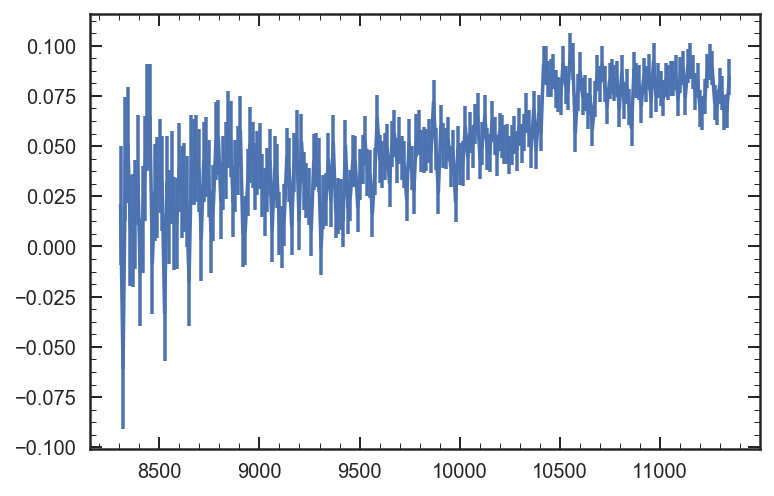

In [34]:
IDX = [U for U in range(len(wv)) if 8300 < wv[U] < 11350]

plt.errorbar(wv[IDX],(fl[IDX] - cntm[IDX]) / sens[IDX],er[IDX]/ sens[IDX])

/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_fiel

no g102


/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_fiel

no g102


/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_fiel

no g102


/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_fiel

no g102


/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_fiel

no g102


/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_fiel

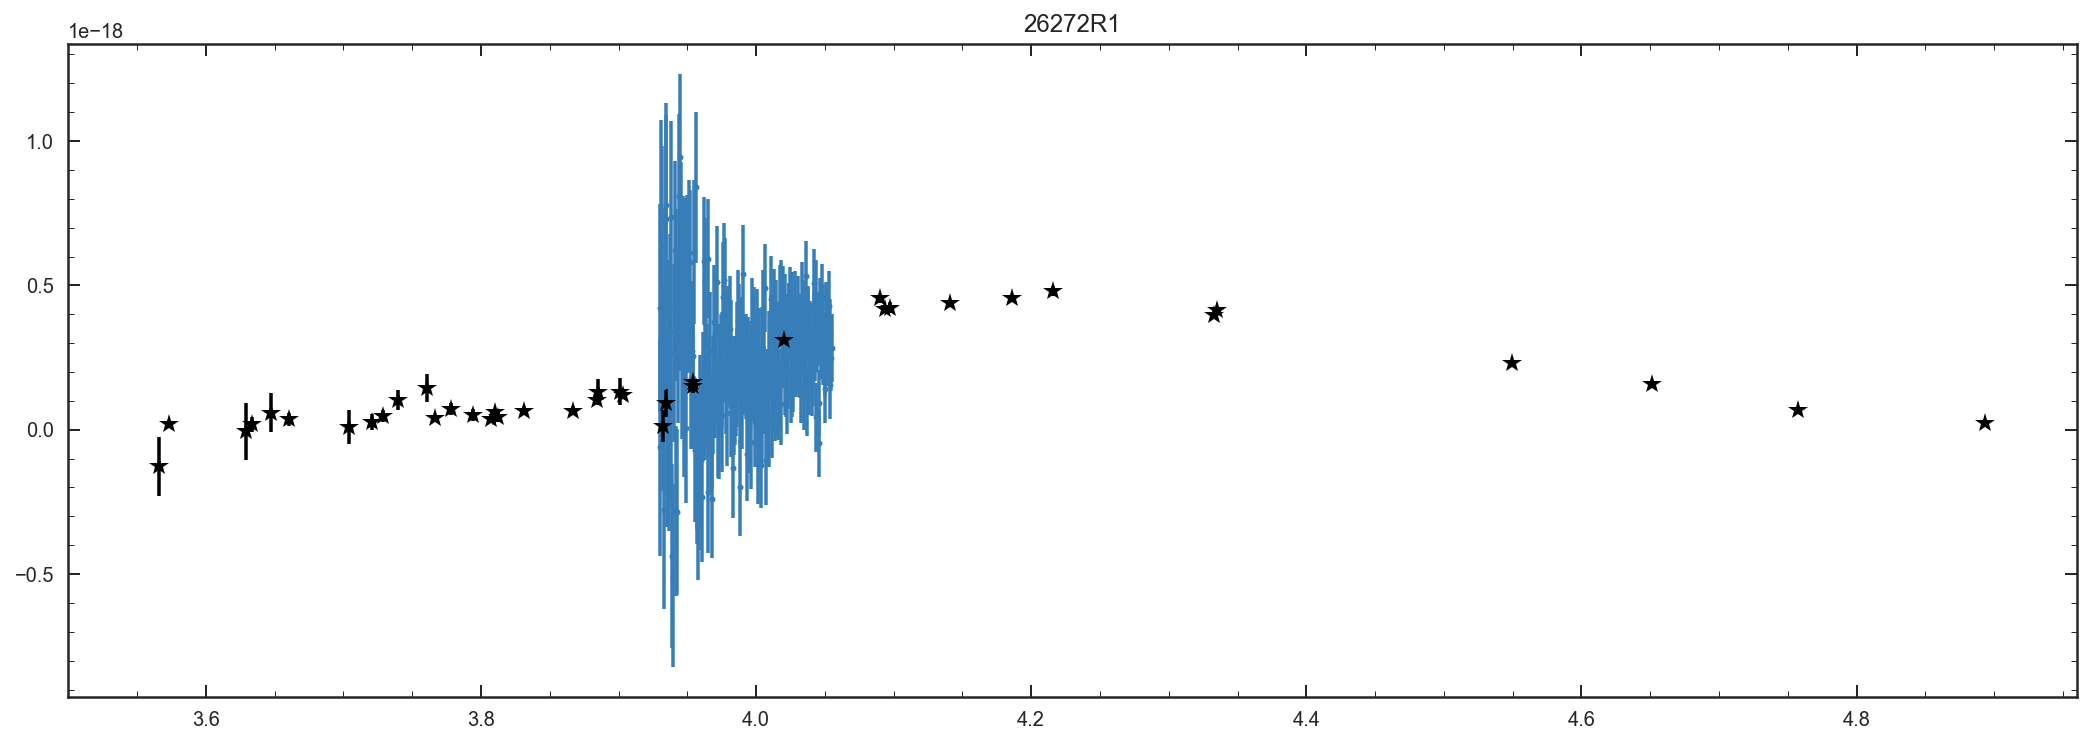

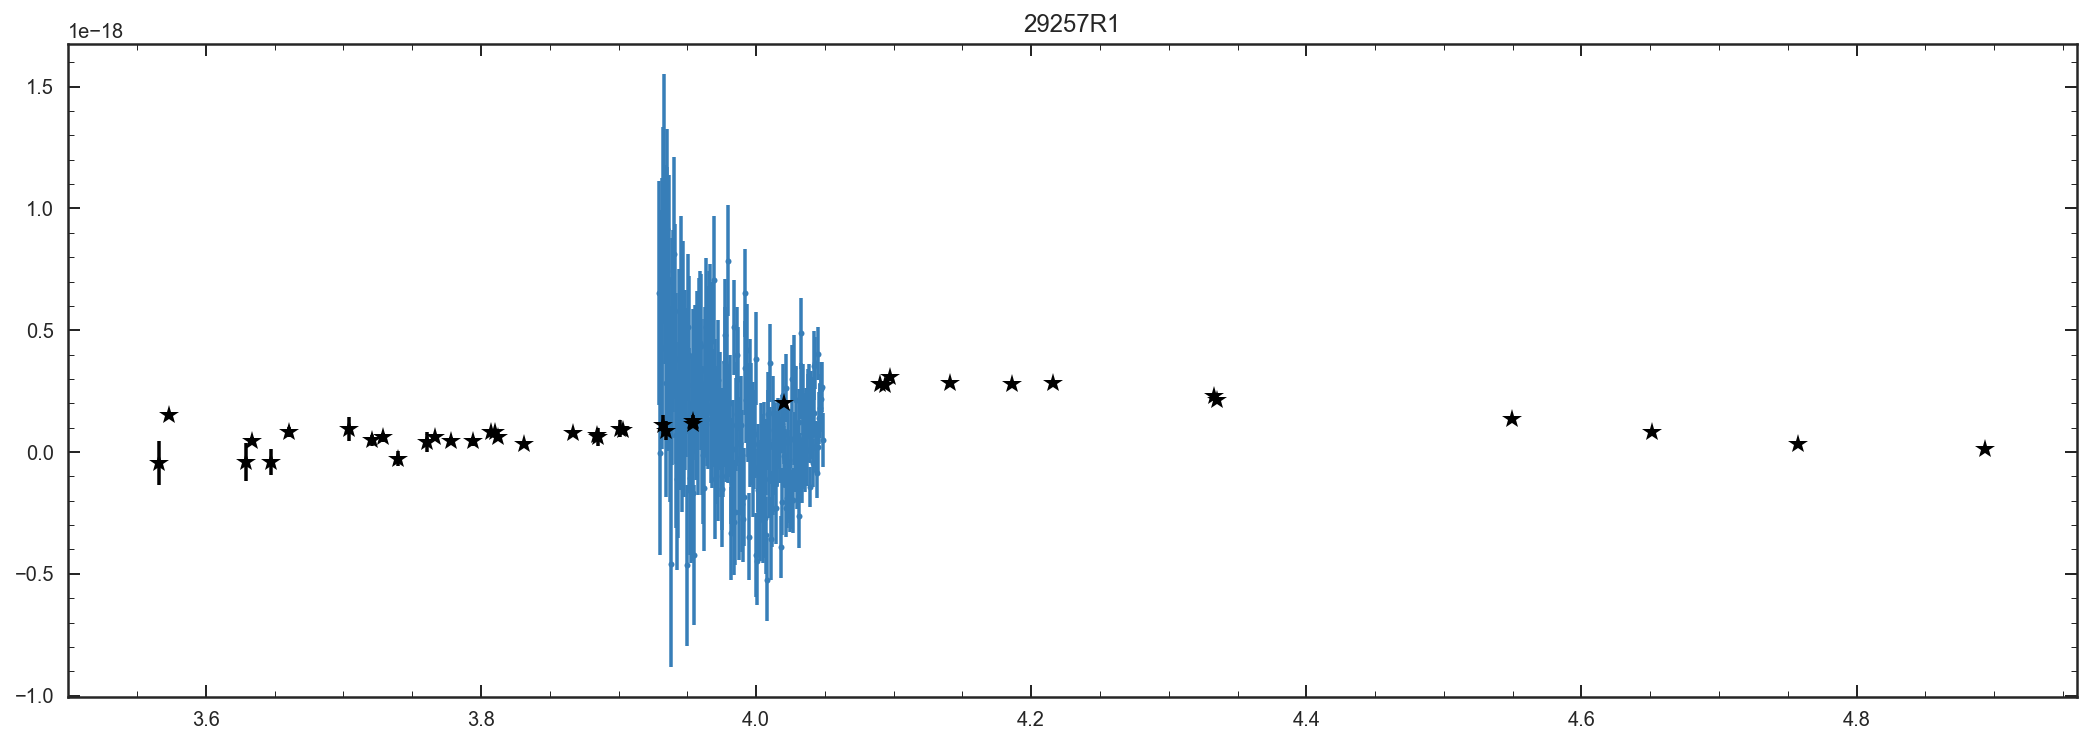

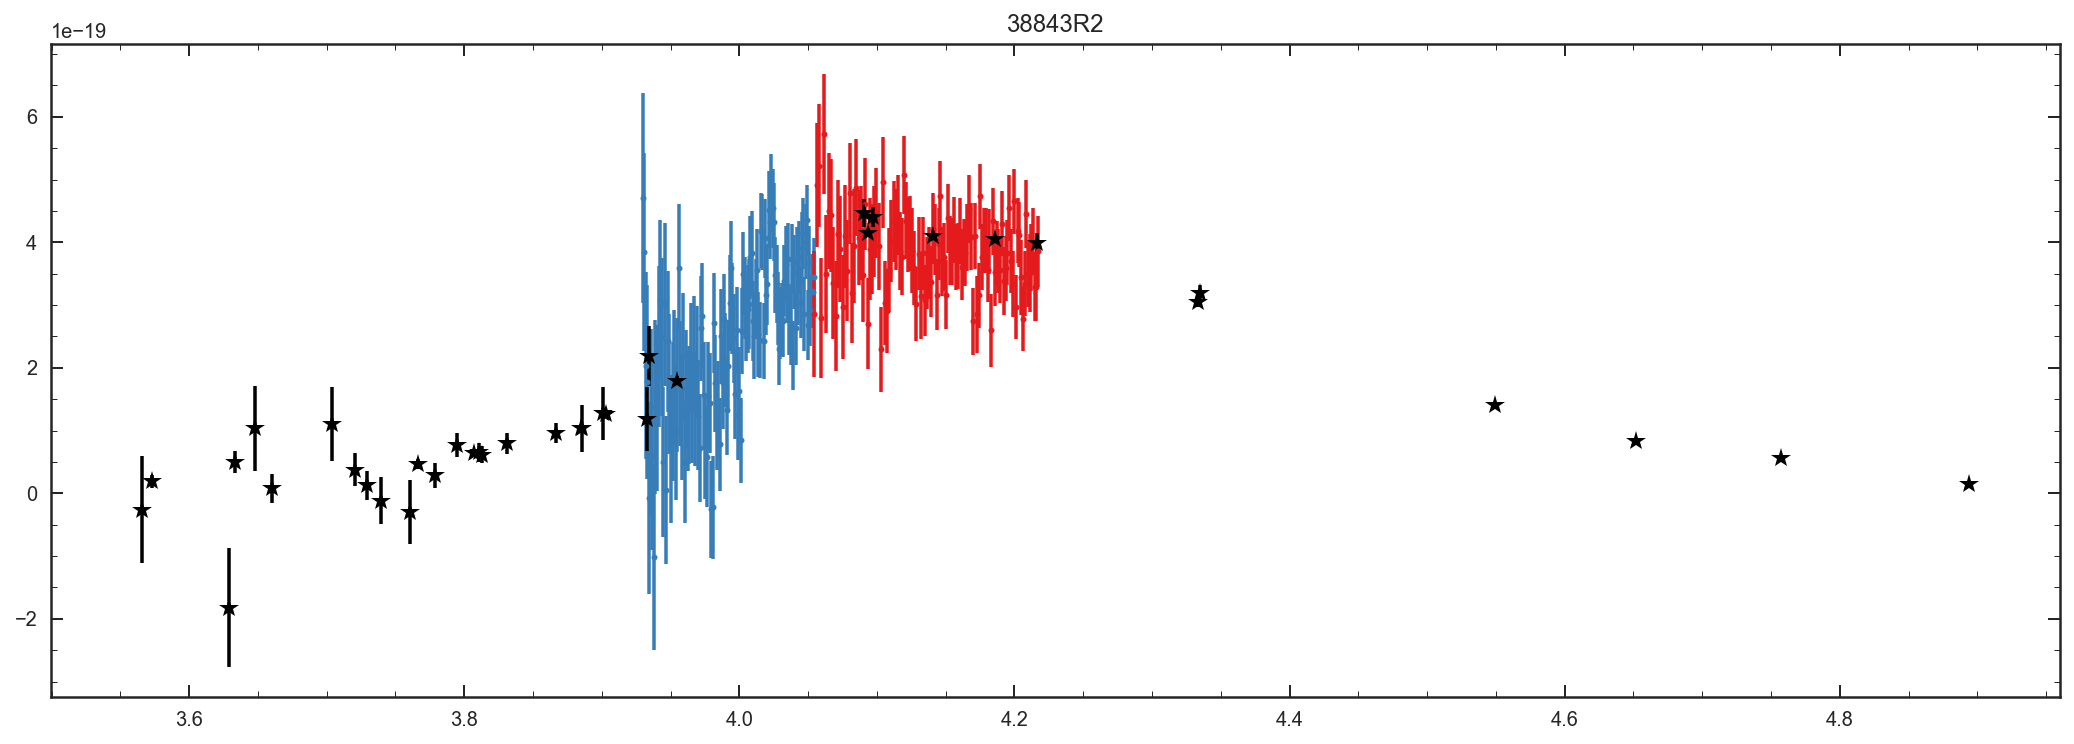

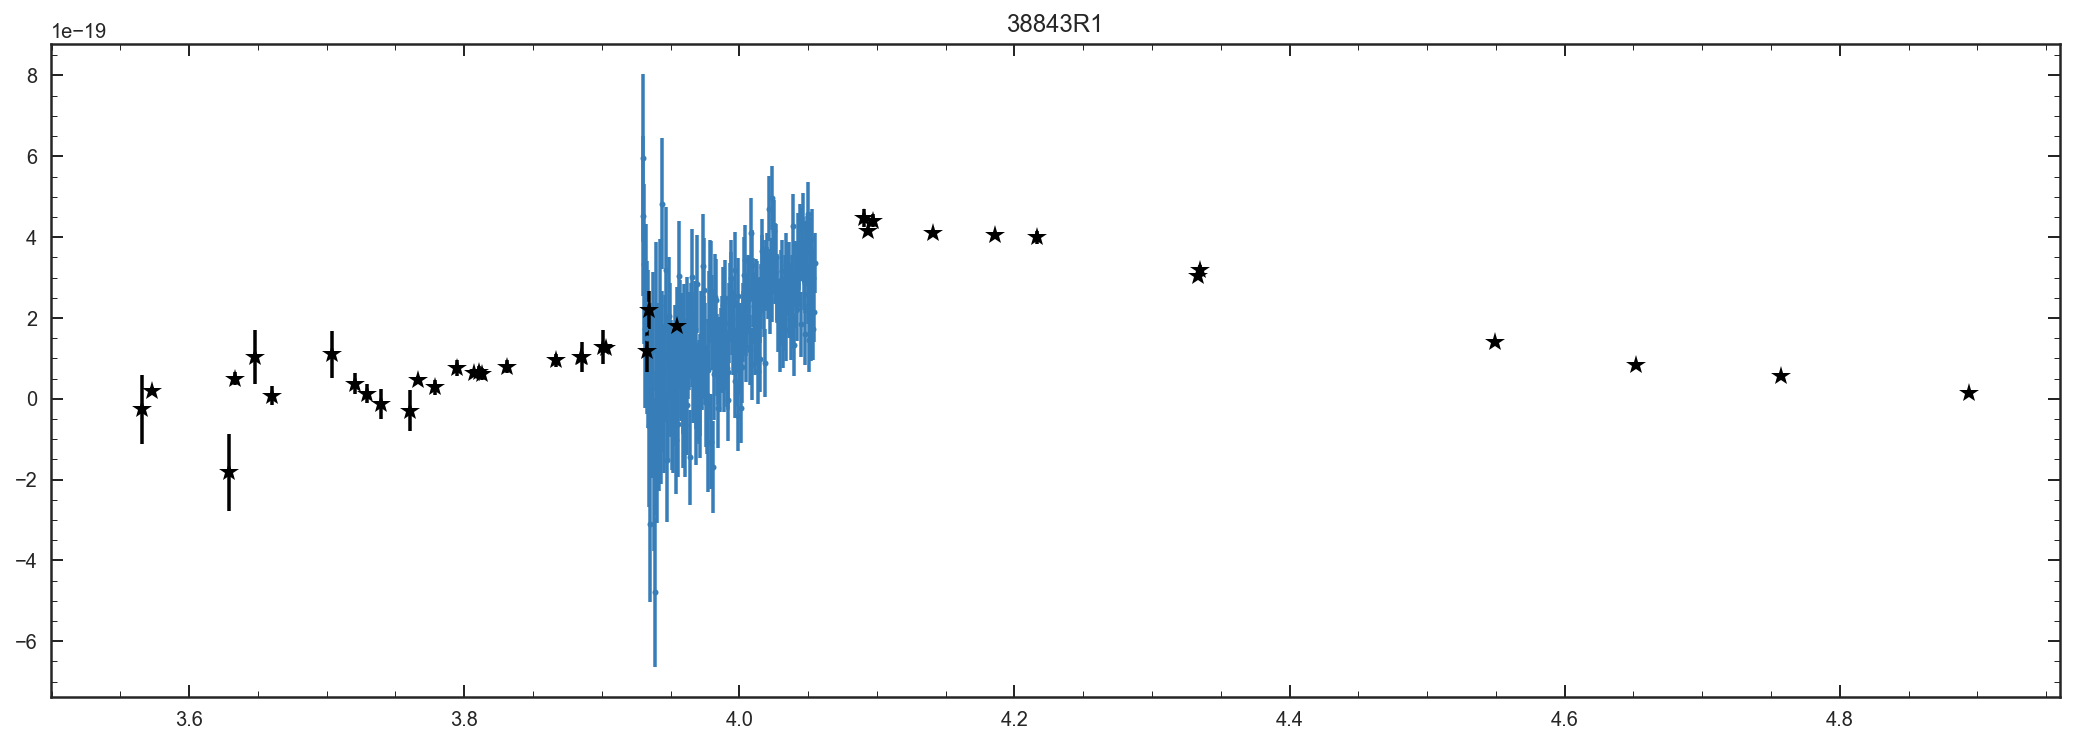

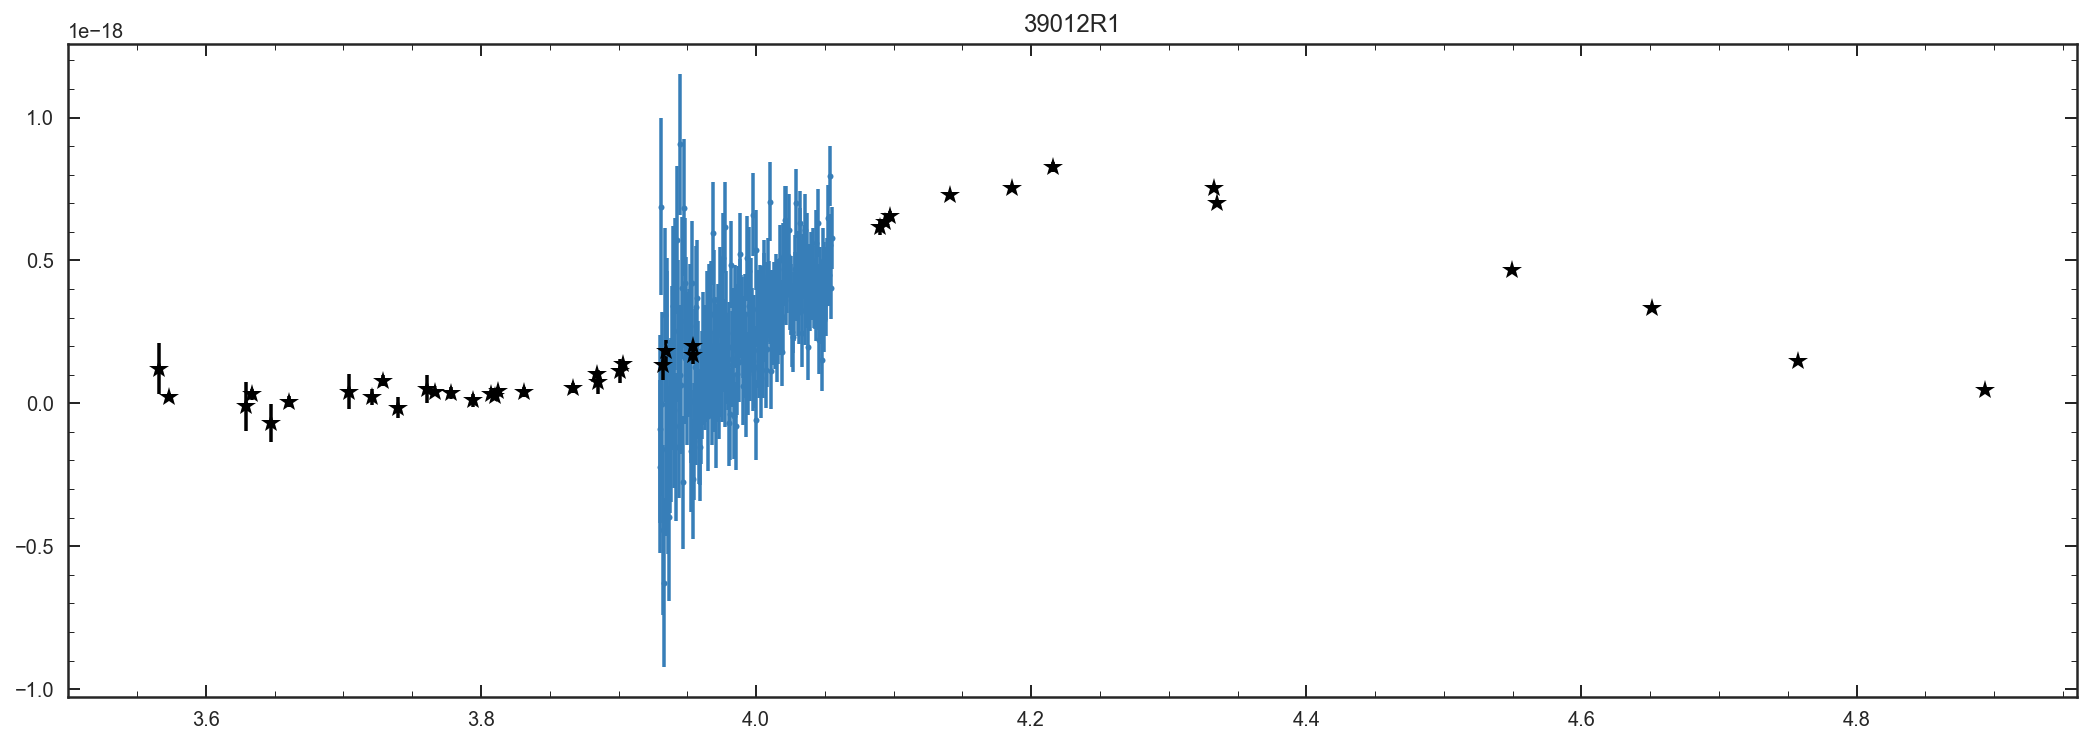

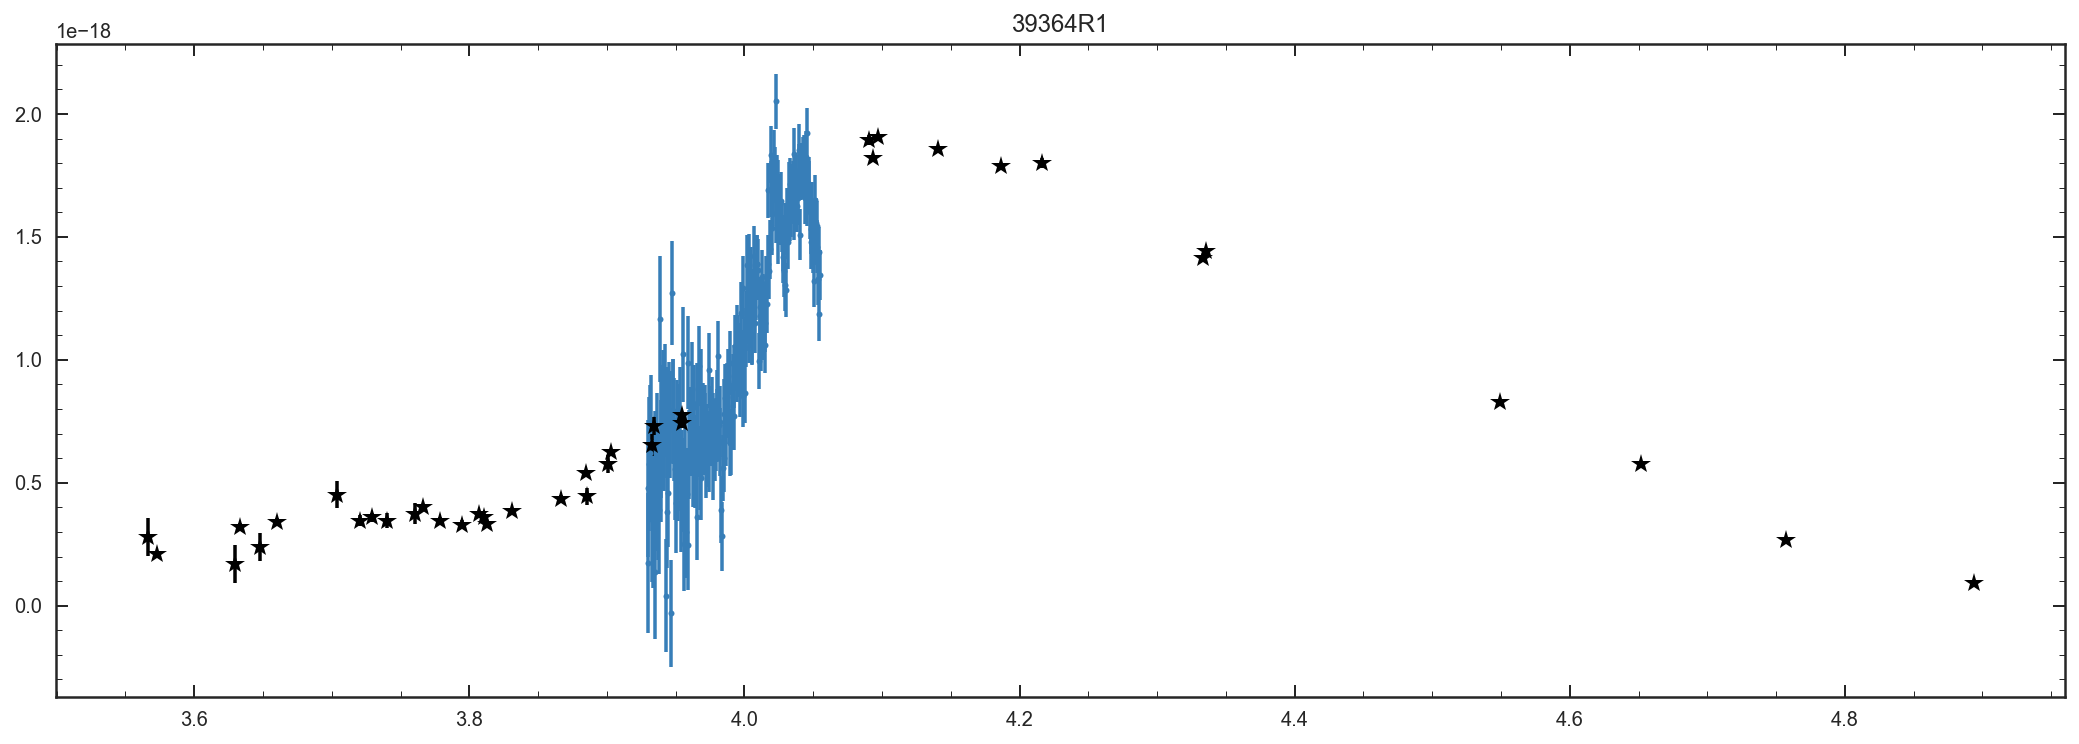

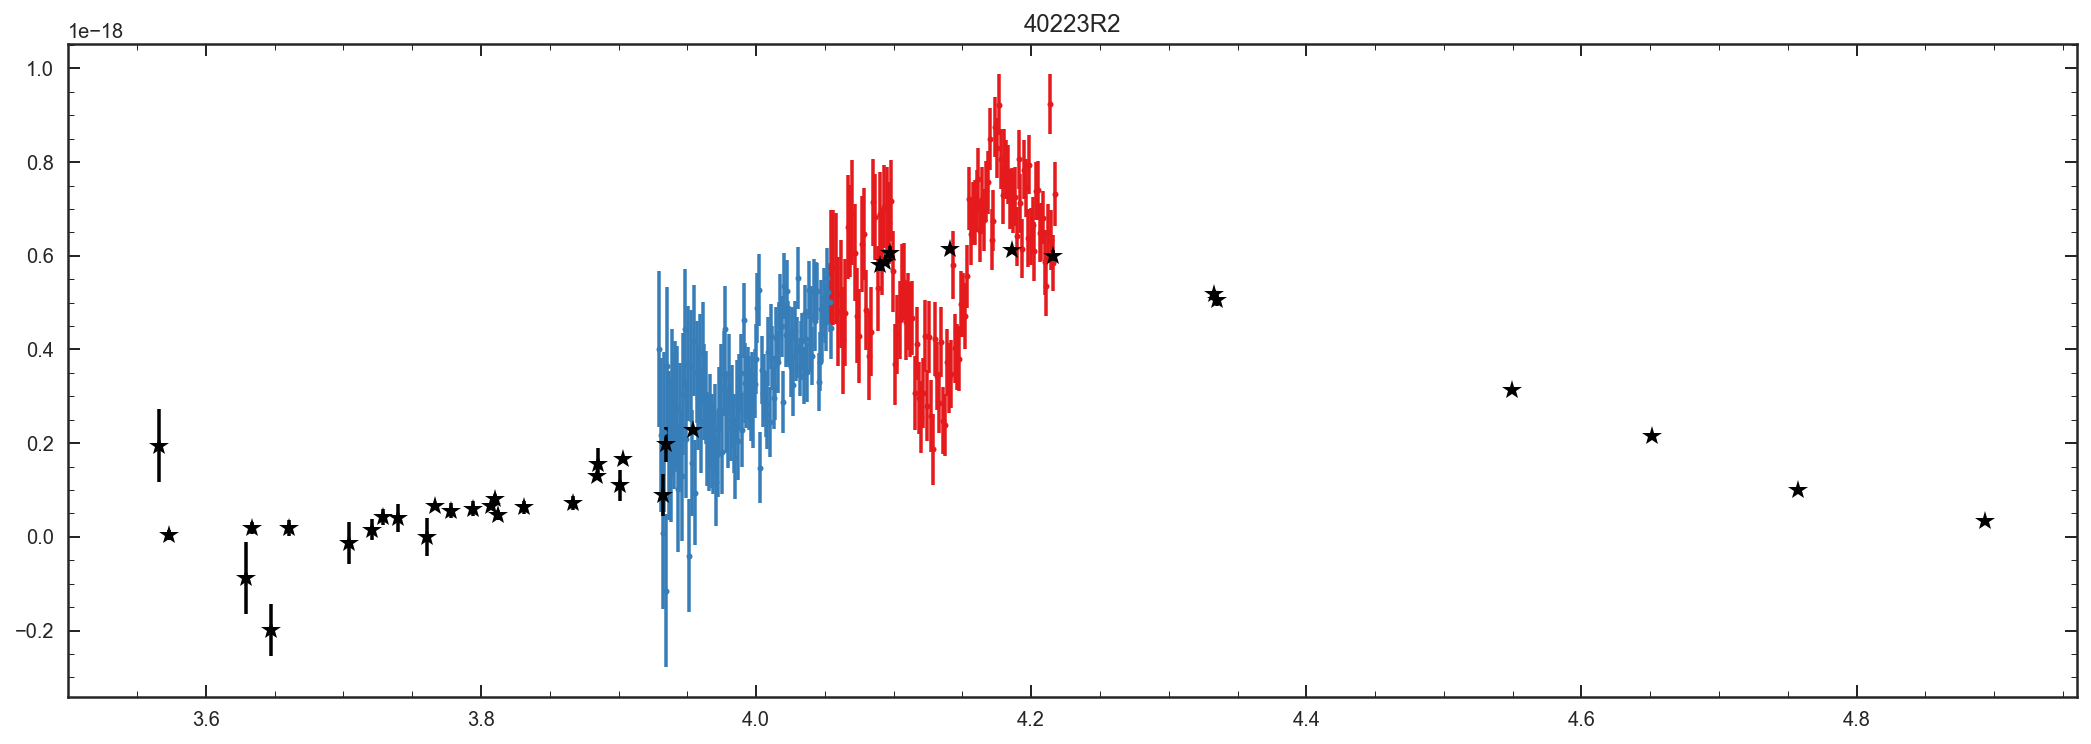

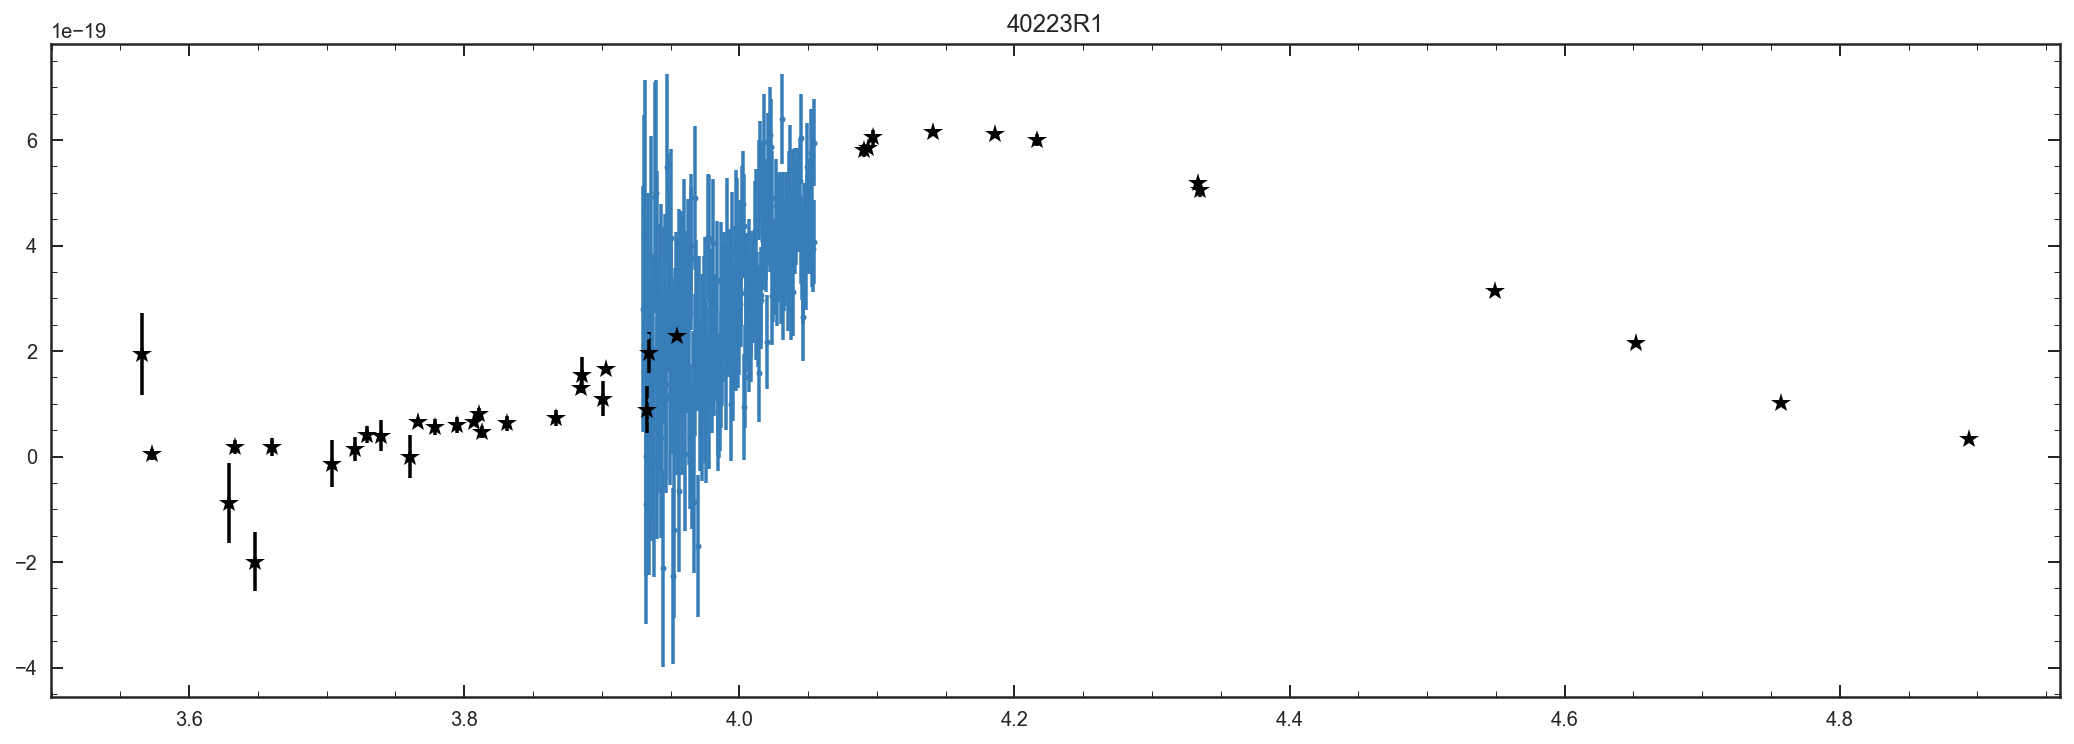

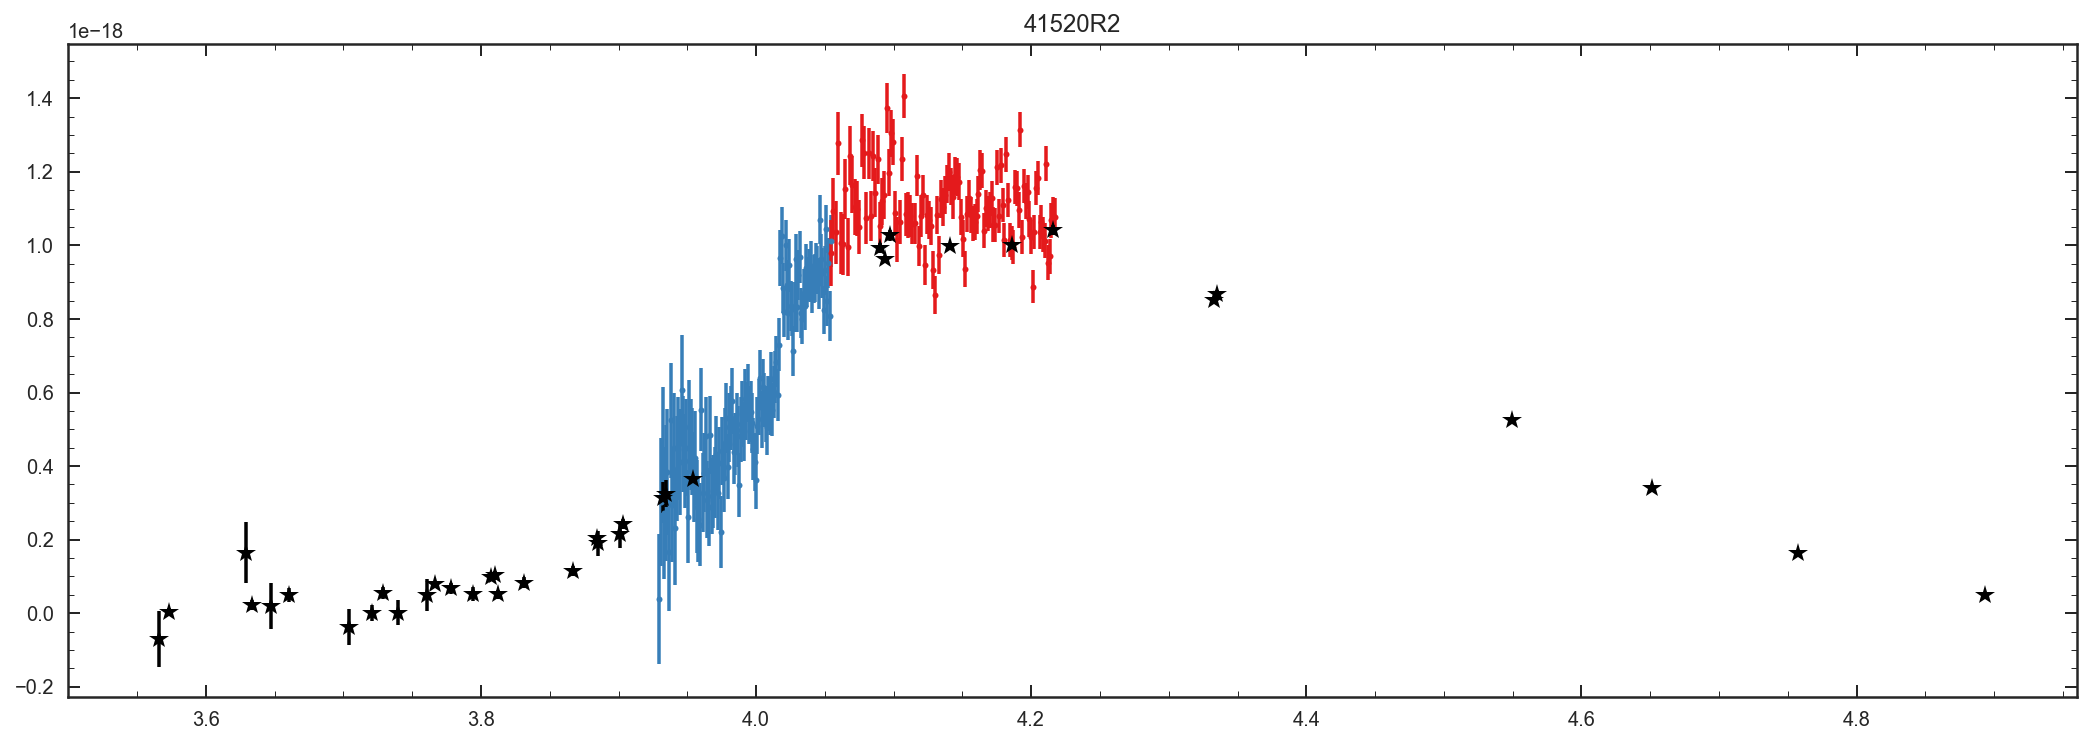

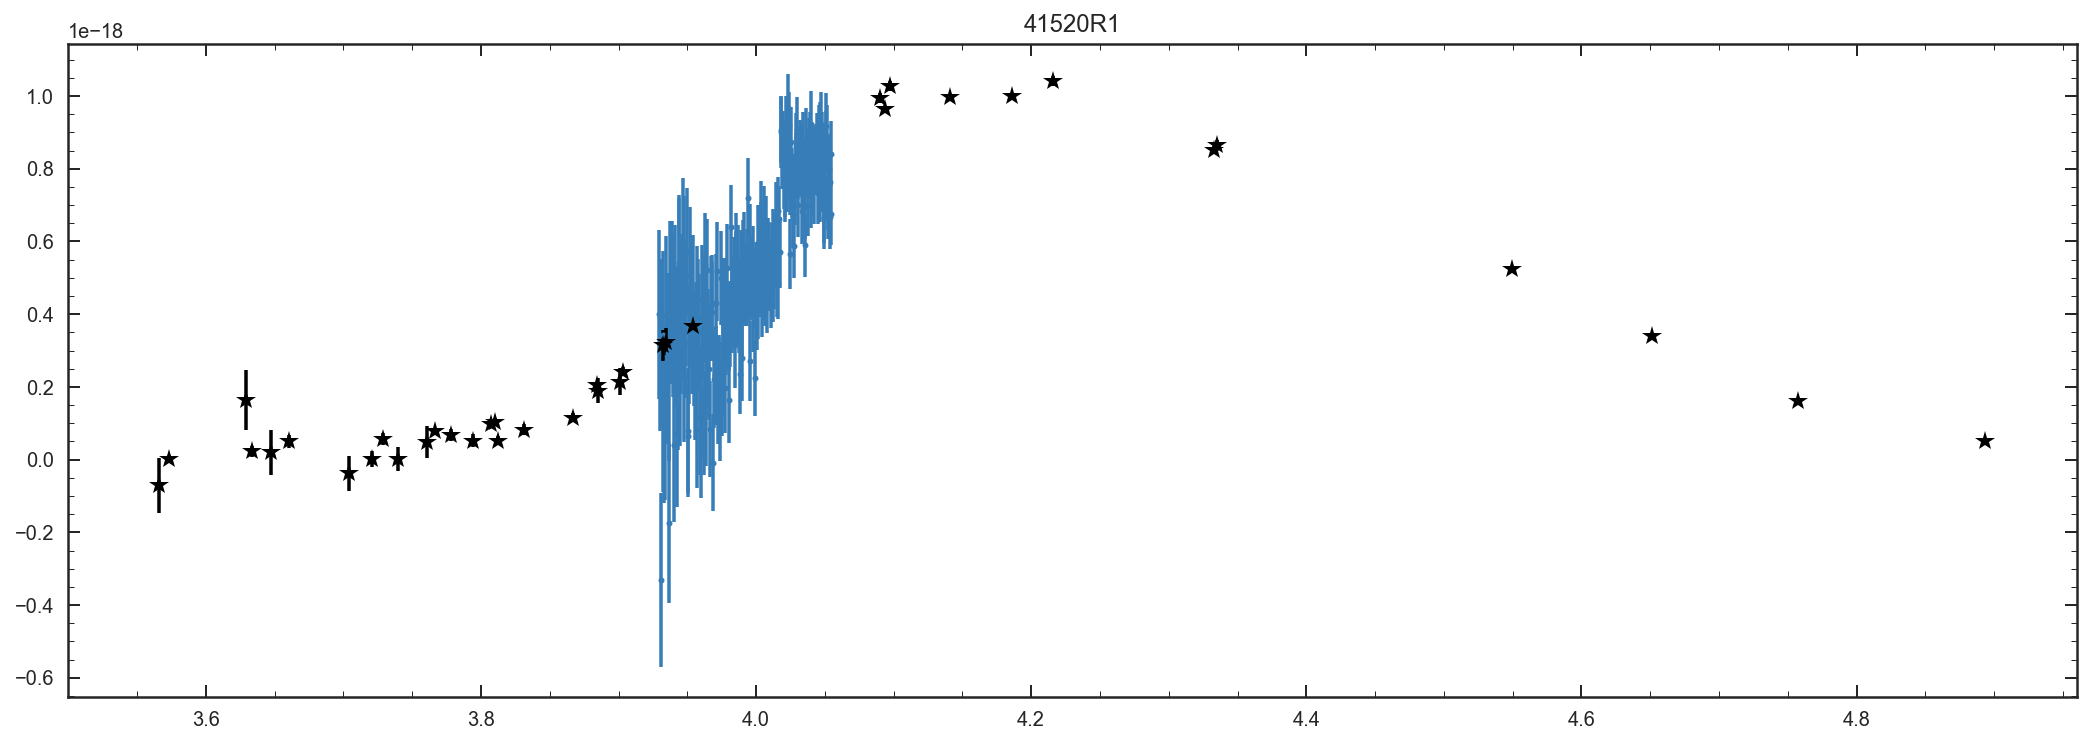

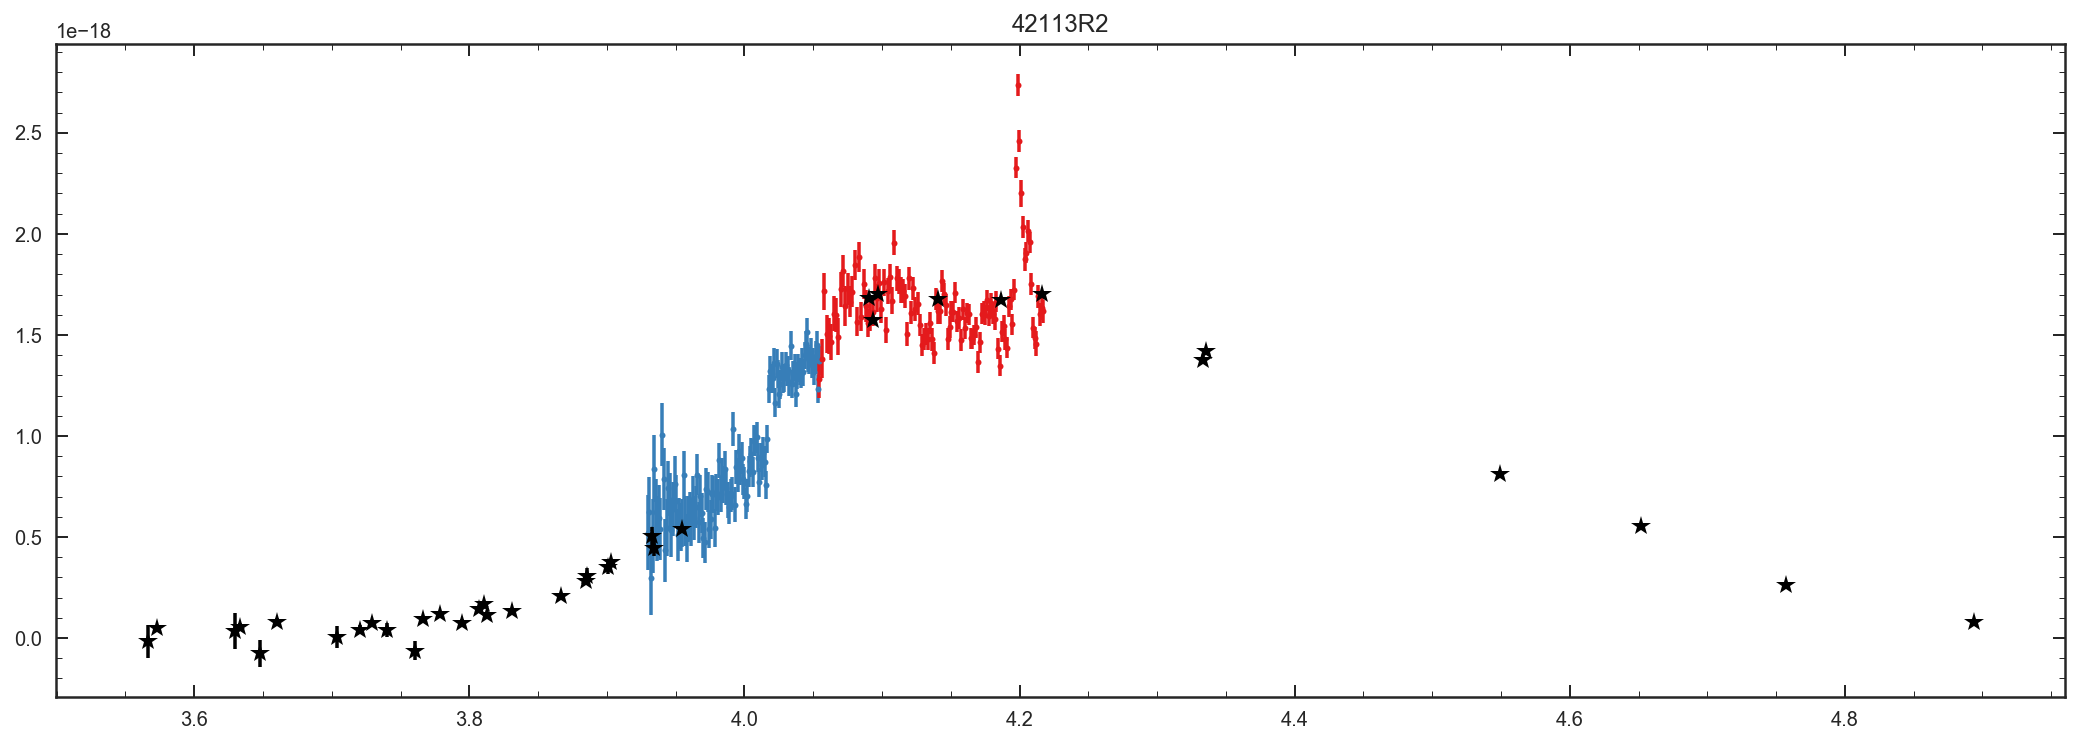

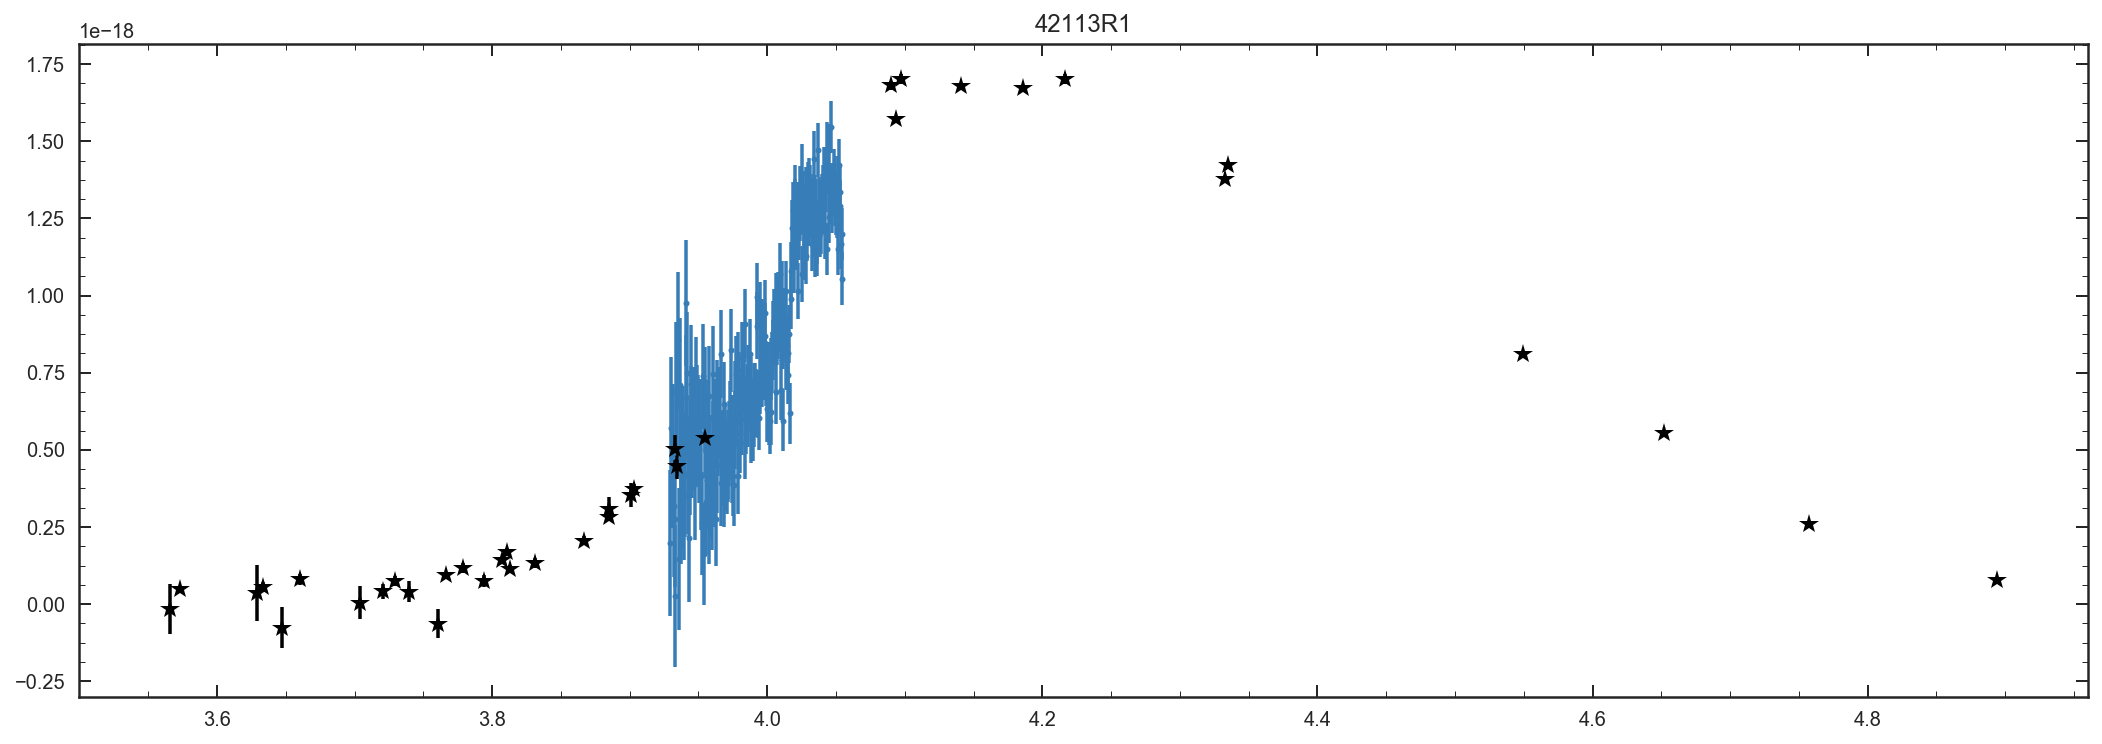

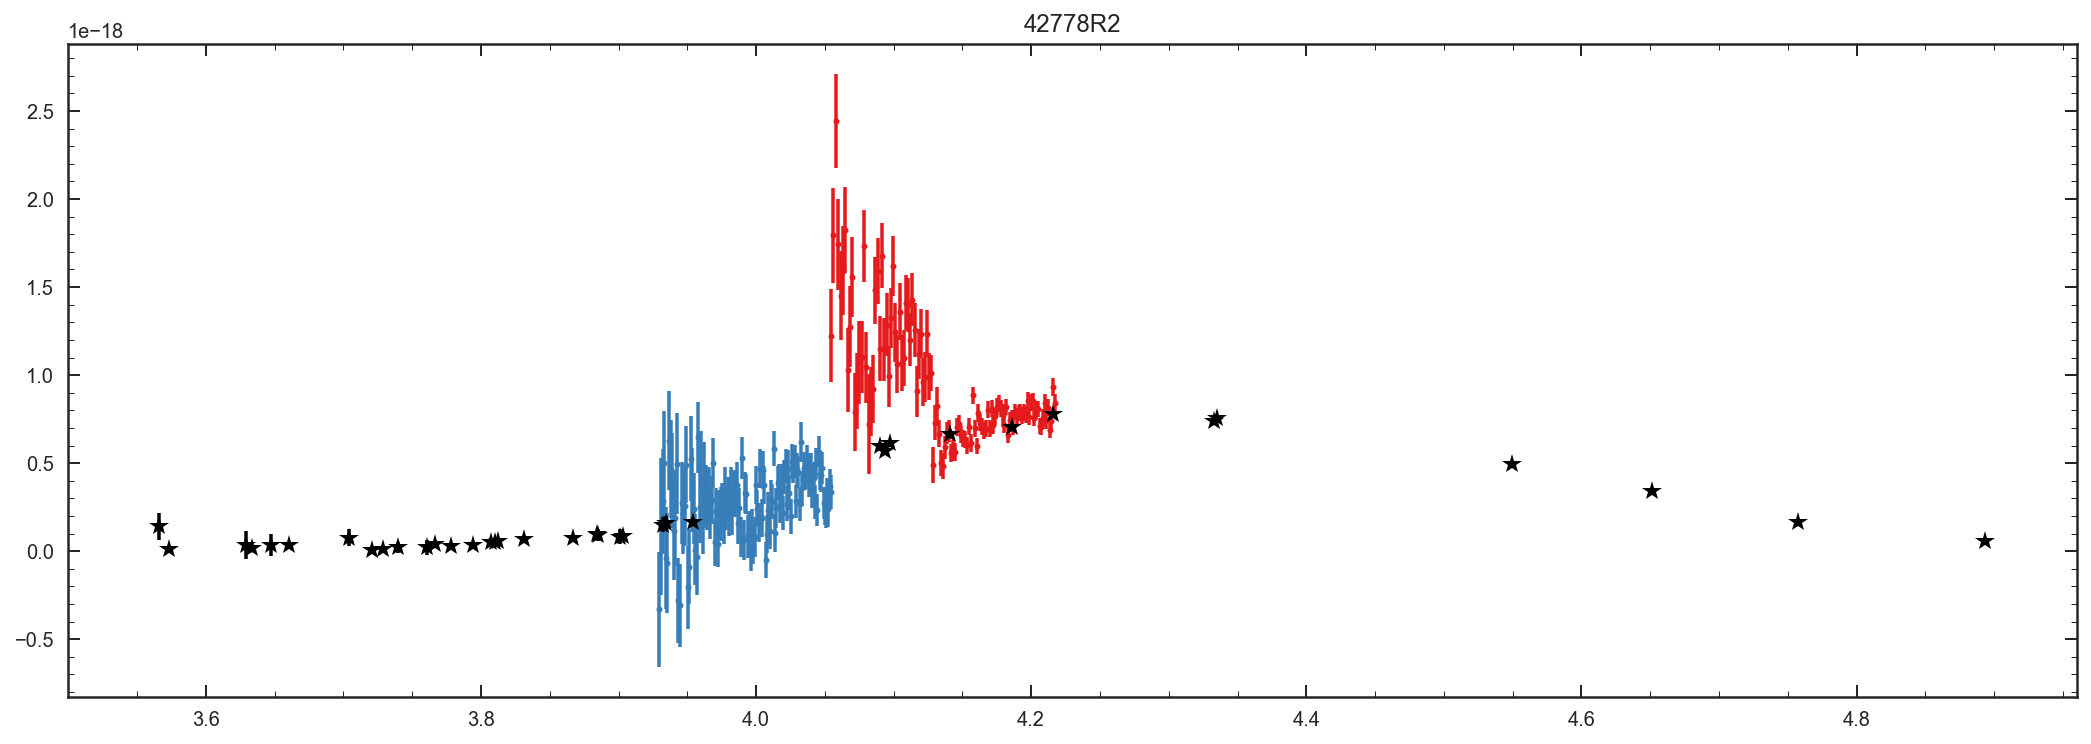

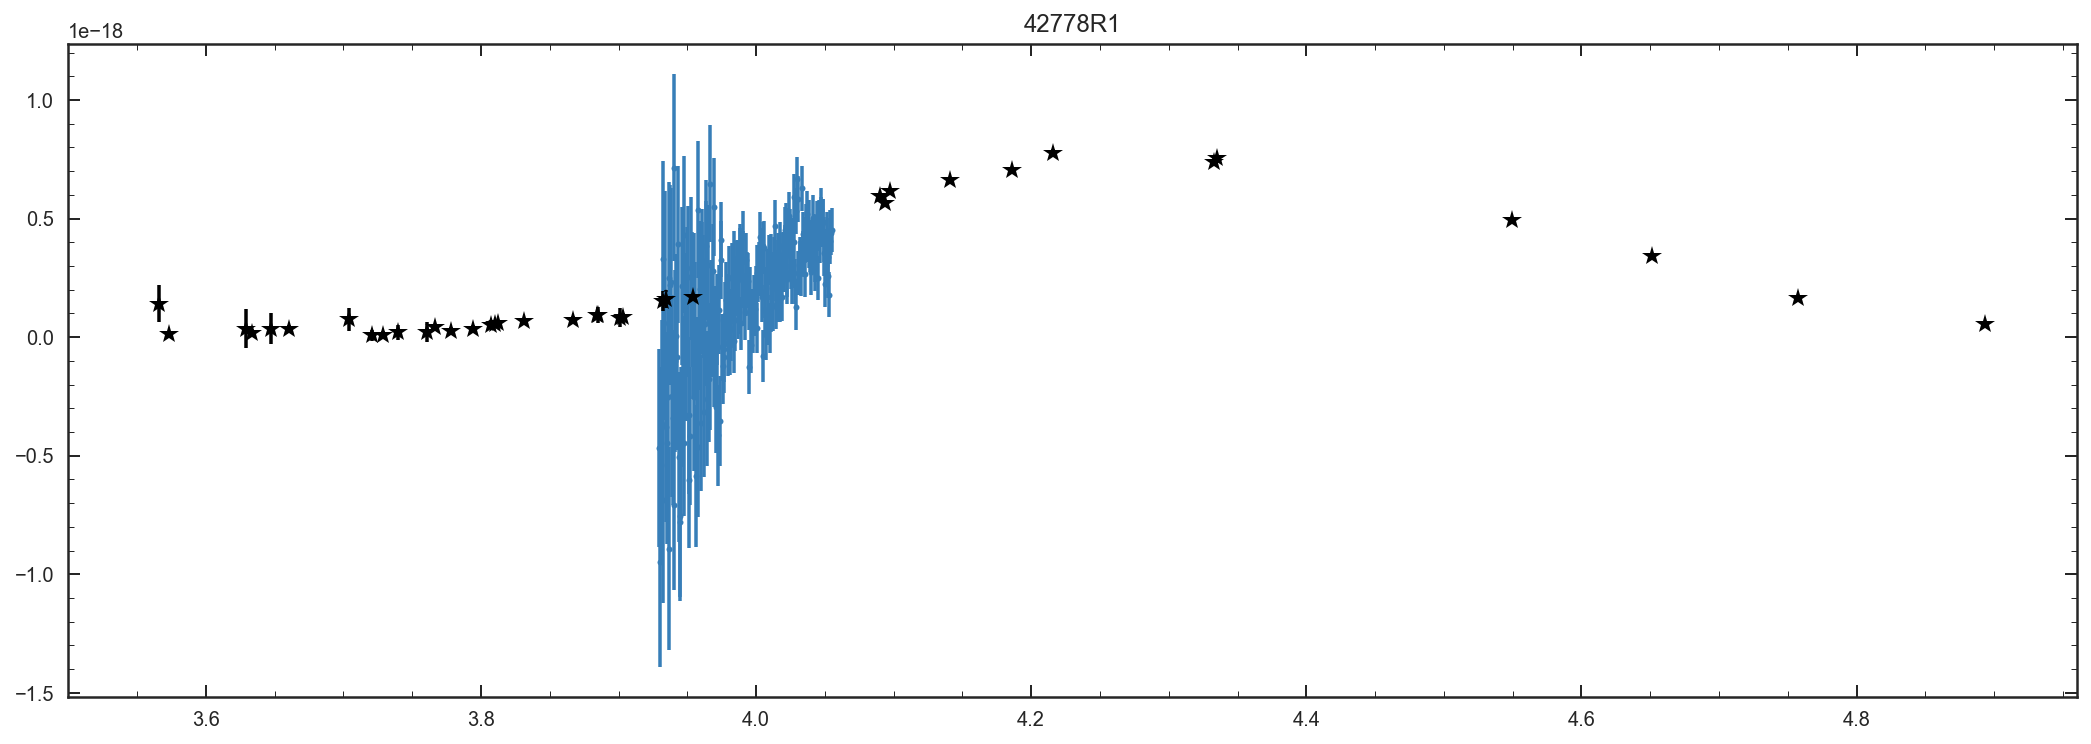

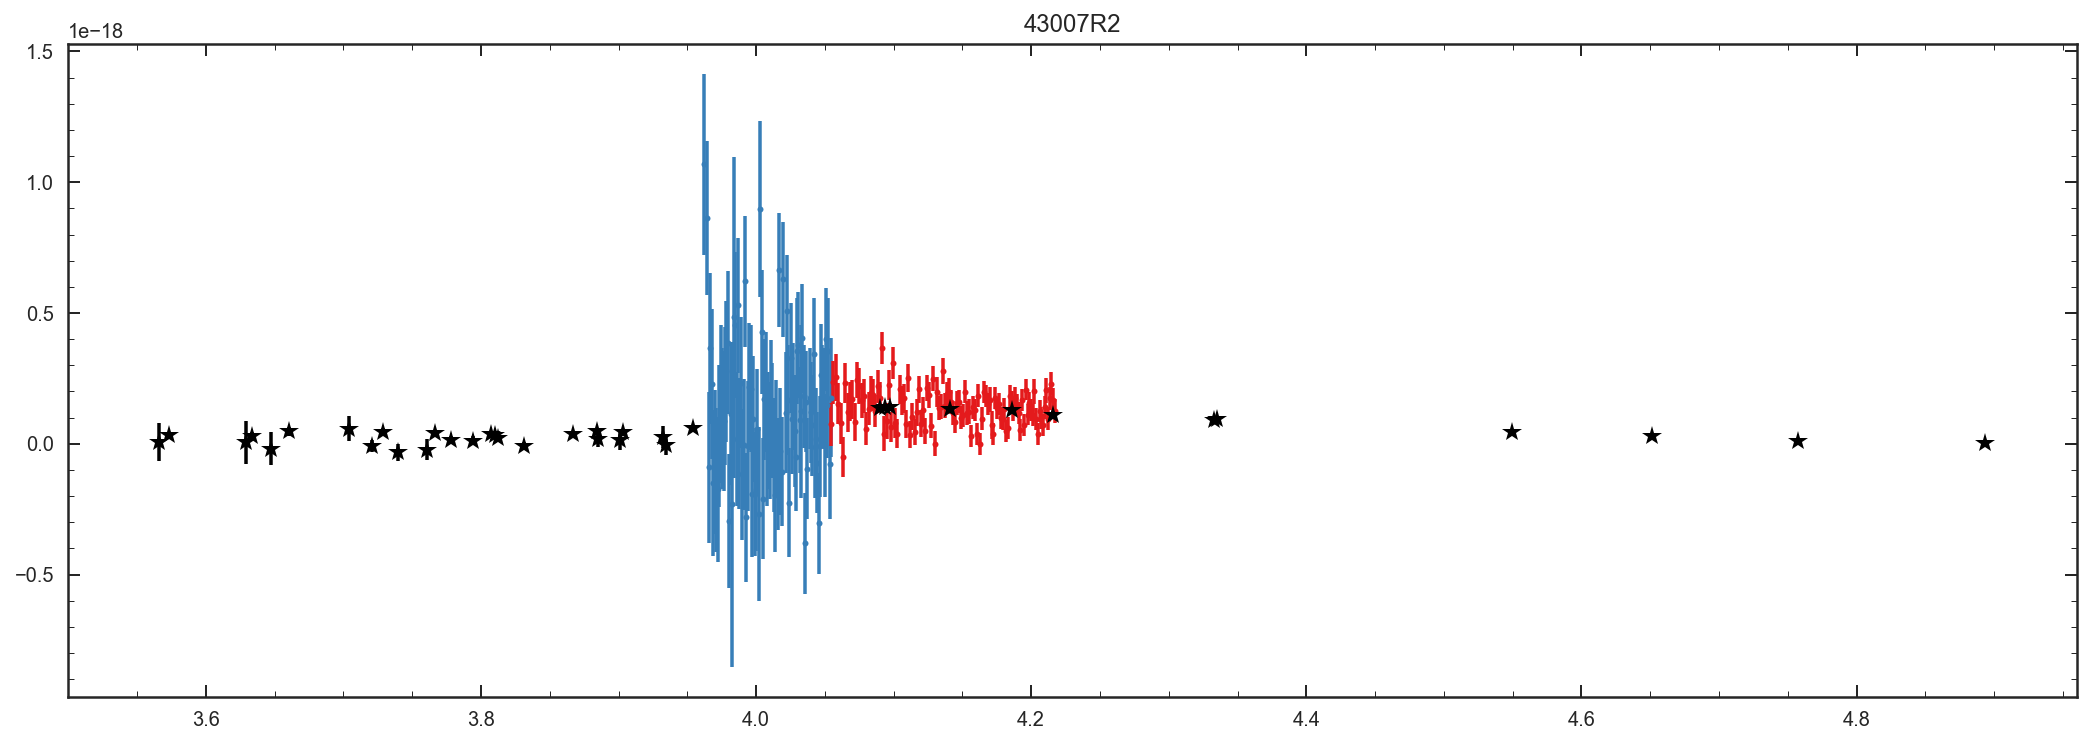

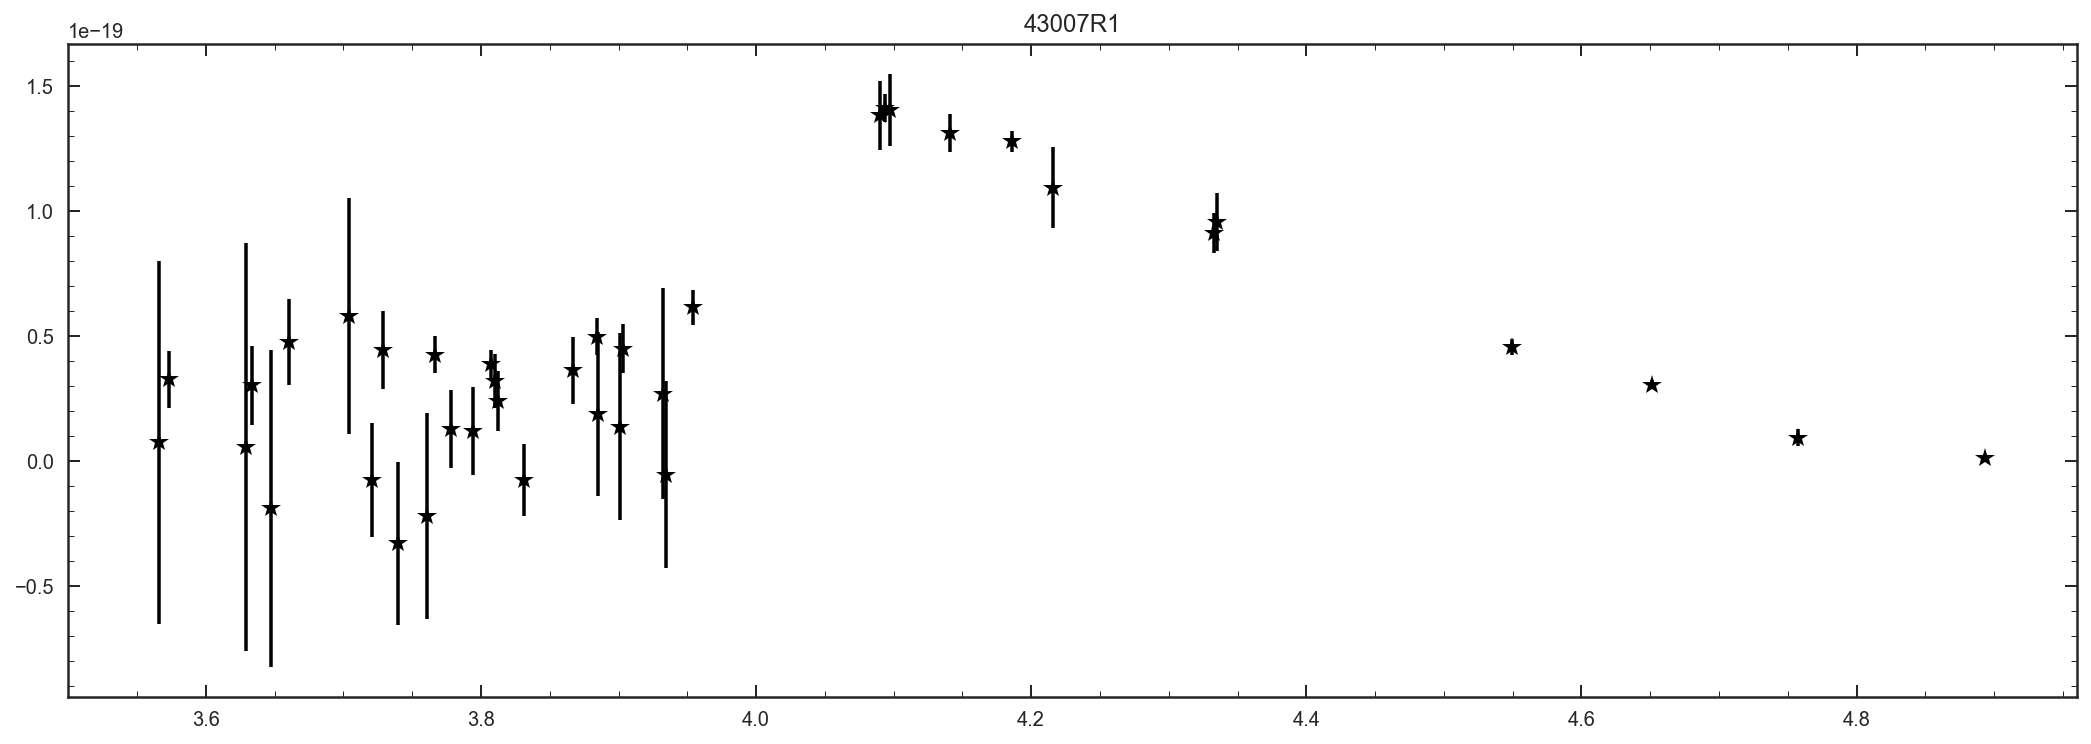

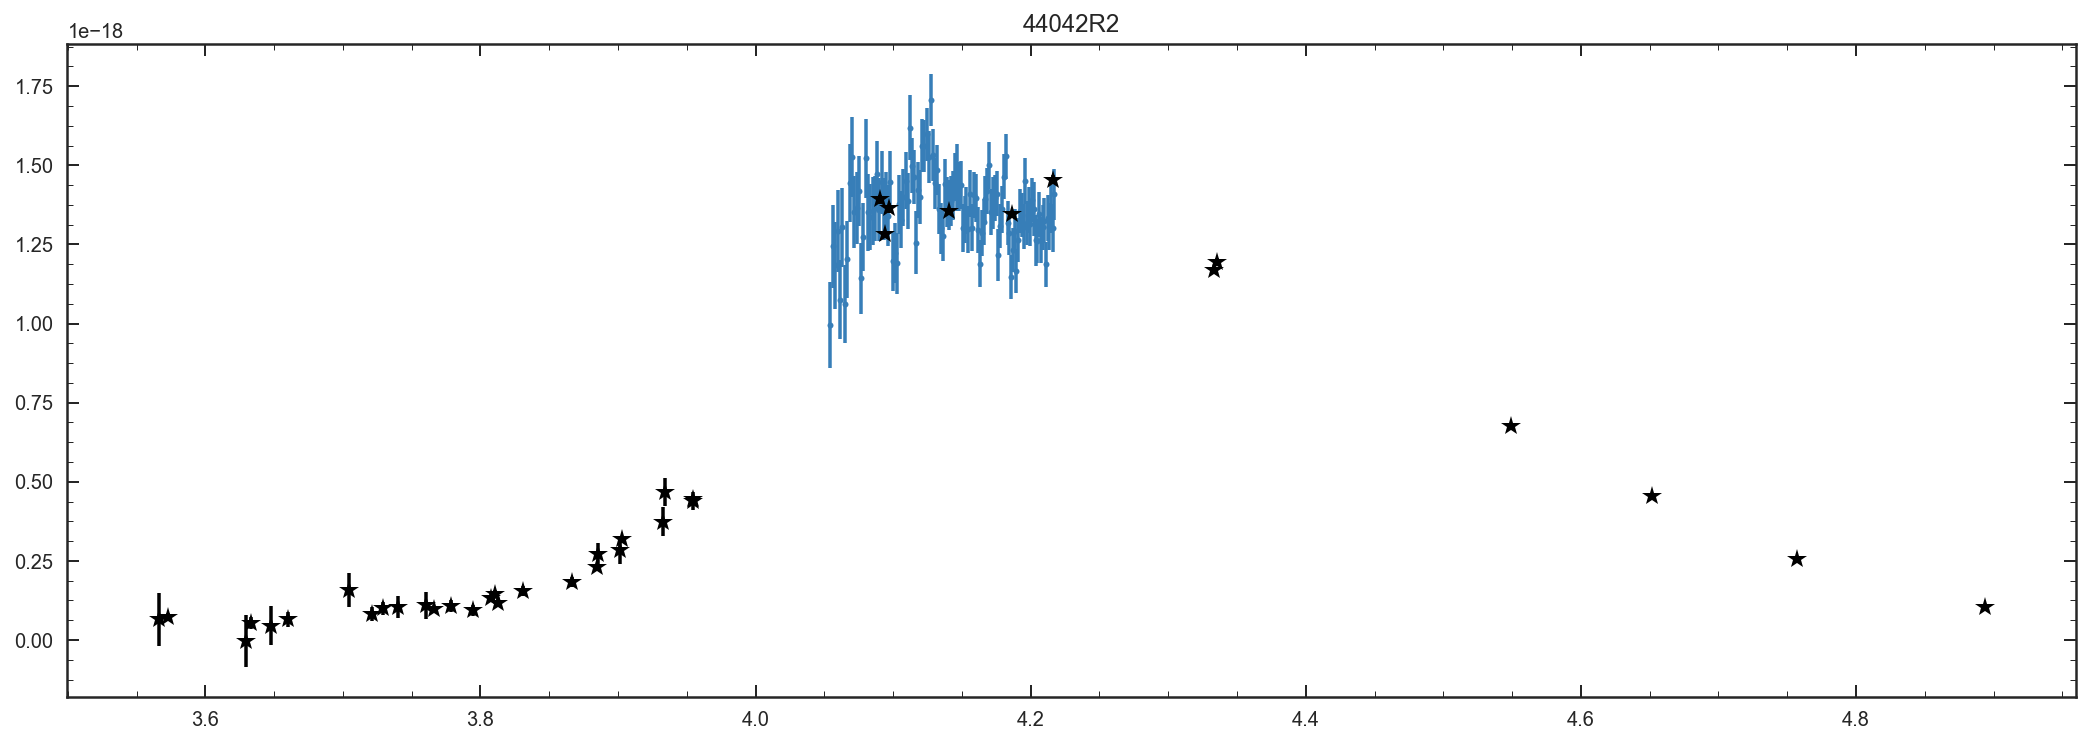

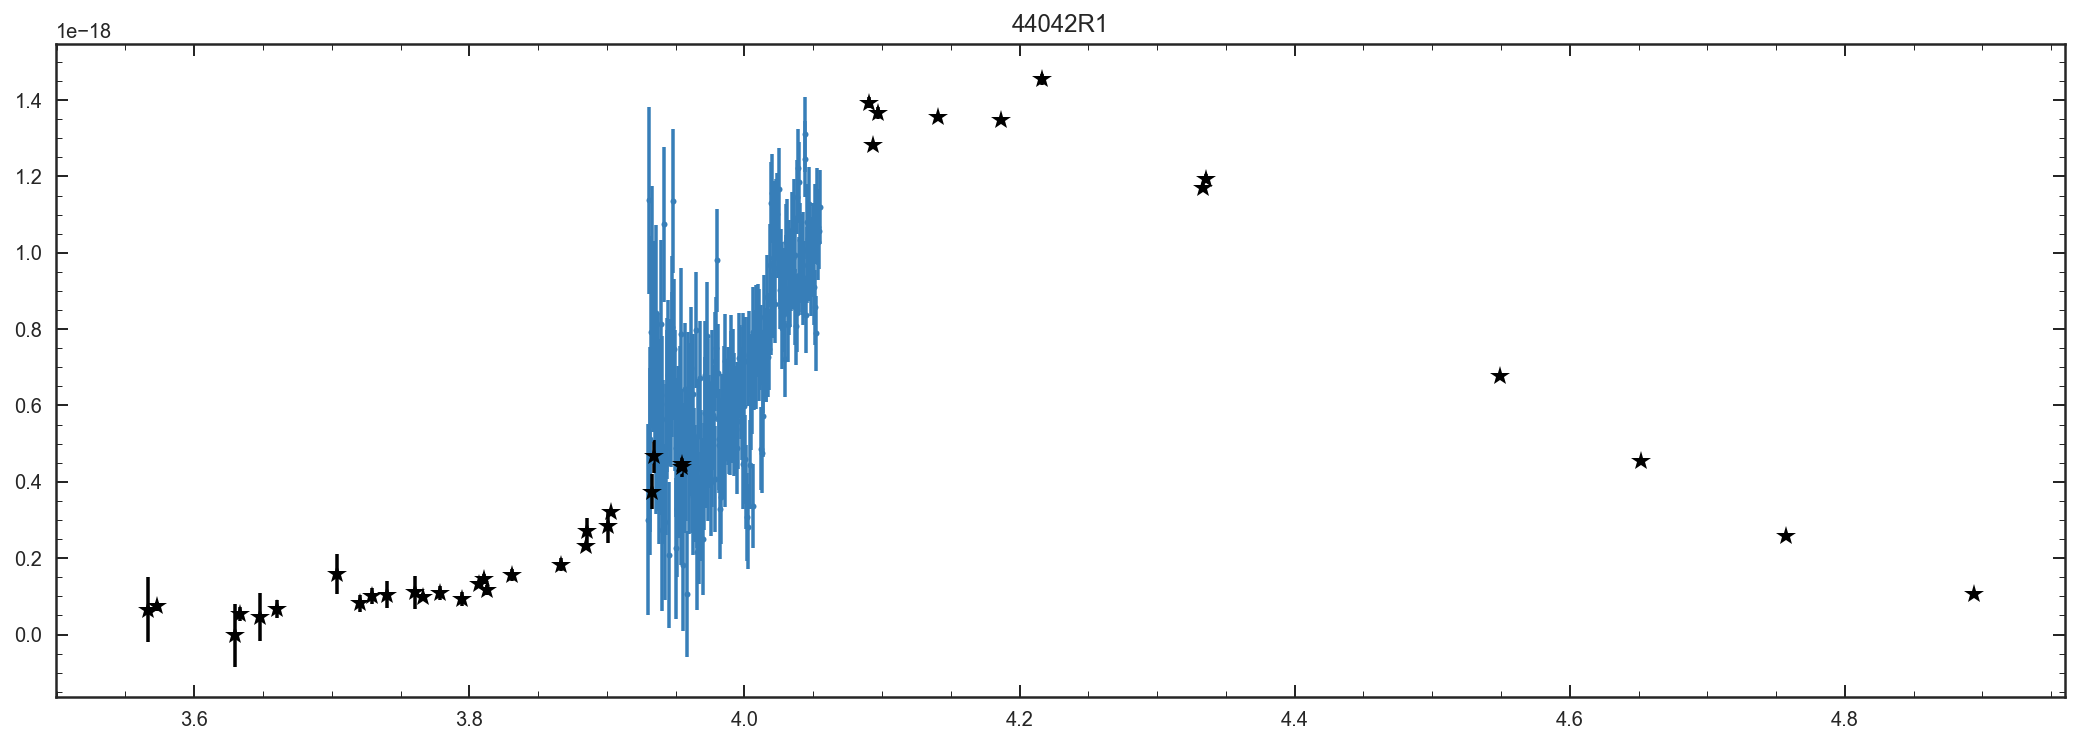

In [68]:
for i in SQ_up:
    Pwv,Pfl,Per,num = Extract_phot(v4Scat, v4S.id[i])
    
    if v4S.R2[i]:
        spec_info = Extract_spec_R2(v4S.id[i])
        
        if len(spec_info) > 3:
            Bwv, Bfl, Ber, Rwv, Rfl, Rer = spec_info
        
            plt.figure(figsize=[18,6])
            plt.errorbar(np.log10(Bwv),Bfl,Ber,linestyle='None', marker='o', markersize=3, color='#377eb8')
            plt.errorbar(np.log10(Rwv),Rfl,Rer,linestyle='None', marker='o', markersize=3, color='#e41a1c')
            plt.errorbar(np.log10(Pwv),Pfl,Per,linestyle='None', marker='*', markersize=10, color='k')
        
        else:
            Bwv, Bfl, Ber = spec_info
            plt.figure(figsize=[18,6])
            plt.errorbar(np.log10(Bwv),Bfl,Ber,linestyle='None', marker='o', markersize=3, color='#377eb8')
            plt.errorbar(np.log10(Pwv),Pfl,Per,linestyle='None', marker='*', markersize=10, color='k')
            
        plt.title(str(v4S.id[i]) + 'R2' )

        
    Bwv1, Bfl1, Ber1= Extract_spec_R1(v4S.id[i])
    plt.figure(figsize=[18,6])
    plt.errorbar(np.log10(Bwv1),Bfl1,Ber1,linestyle='None', marker='o', markersize=3, color='#377eb8')
    plt.errorbar(np.log10(Pwv),Pfl,Per,linestyle='None', marker='*', markersize=10, color='k')
    plt.title(str(v4S.id[i]) + 'R1' )


# Build plotting code

In [14]:
def PLOT(galaxy_id, R2 = True, R1 = False, clipB = None, clipR = None):
    Pwv,Pfl,Per,num = Extract_phot(v4Scat, galaxy_id)
    wv11 = wv21 = wv22 = []
    
    
    if R2:
        spec_info = Extract_spec_R2(galaxy_id)
        
        if len(spec_info) > 3:
            wv21, fl21, er21, wv22, fl22, er22 = spec_info
        else:
            wv21, fl21, er21 = spec_info
    
    if R1:
        wv11, fl11, er11= Extract_spec_R1(galaxy_id)

    if clipB != None:
        if len(wv11) > 0:
            IDBC = [U for U in range(len(wv11)) if clipB[0] < wv11[U] < clipB[1]]
            wv11[IDBC] = np.nan
            fl11[IDBC] = np.nan
            er11[IDBC] = np.nan
        
        if len(wv21) > 0 and min(wv21) < 10000:
            IDBC = [U for U in range(len(w21)) if clipB[0] < wv21[U] < clipB[1]]
            wv21[IDBC] = np.nan
            fl21[IDBC] = np.nan
            er21[IDBC] = np.nan
            
    if clipR != None:
        if len(wv21) > 0 and min(wv21) > 10000:
            IDRC = [U for U in range(len(wv21)) if clipR[0] < wv21[U] < clipR[1]]
            wv21[IDRC] = np.nan
            fl21[IDRC] = np.nan
            er21[IDRC] = np.nan
          
        if len(wv22) > 0 and min(wv22) > 10000:
            IDRC = [U for U in range(len(wv22)) if clipR[0] < wv22[U] < clipR[1]]
            wv22[IDRC] = np.nan
            fl22[IDRC] = np.nan
            er22[IDRC] = np.nan
            
    gs = GridSpec(2,2, hspace=0.5)        
    plt.figure(figsize=[12,10])
    
    plt.subplot(gs[0,:])
    plt.errorbar(np.log10(Pwv),Pfl,Per,linestyle='None', marker='o', markersize=7.5, color='#4daf4a',zorder = 1)
    
    if len(wv21) > 0:
        plt.errorbar(np.log10(wv21),fl21,er21,linestyle='None', marker='o', markersize=3, color='#377eb8',zorder = 2)
            
    if len(wv22) > 0:
        plt.errorbar(np.log10(wv22),fl22,er22,linestyle='None', marker='o', markersize=3, color='#e41a1c',zorder = 2)
            
    if len(wv11) > 0:
        plt.errorbar(np.log10(wv11),fl11,er11,linestyle='None', marker='o', markersize=3, color='#ff7f00',zorder = 2)
            
    plt.title(galaxy_id, fontsize=25)
  
    plt.xticks(np.log10([5000,7500,10000,25000,50000,75000]),[5000,7500,10000,25000,50000,75000])

    plt.xlabel('Wavelength ($\AA$)', fontsize=25)
    plt.ylabel('F$_\lambda$ ($10^{-18}$ $erg/s/cm^{2}/\AA $)', fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=20)

    idx = np.argwhere(seg == galaxy_id)

    ycnt = int((max(idx.T[0]) + min(idx.T[0])) / 2)
    xcnt = int((max(idx.T[1]) + min(idx.T[1])) / 2)
    
    f105img = f105[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
    f125img = f125[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
    f160img = f160[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]

    img = np.zeros((f125img.shape[0], f125img.shape[1], 3), dtype=float)
    img[:,:,0] = img_scale.asinh(f160img, scale_min=-0.1, scale_max=0.5)
    img[:,:,1] = img_scale.asinh(f125img, scale_min=-0.1, scale_max=0.5)
    img[:,:,2] = img_scale.asinh(f105img, scale_min=-0.1, scale_max=0.5)

    plt.subplot(gs[1,0])
    plt.imshow(img,aspect='equal')
    plt.title('Blue = F105W, Green = F125W, Red = F160W')
    
    plt.subplot(gs[1,1])
    
    for i in range(len(allpos)):
        plt.plot(allpos[i][0],allpos[i][1], 'k',alpha = 0.05,zorder=1)

    plt.scatter(v4S.ra[SQ_up],v4S.dec[SQ_up],marker='*', s=200, color = 'b')        
    plt.scatter(v4S.ra[galaxy_id - 1],v4S.dec[galaxy_id - 1],marker='*', s=200, color = 'r')

img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh


/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_fiel

img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh


/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_fiel

img_scale : asinh
img_scale : asinh
img_scale : asinh
no g102


/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_fiel

img_scale : asinh
img_scale : asinh
img_scale : asinh
no g102


/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_fiel

img_scale : asinh
img_scale : asinh
img_scale : asinh
no g102


/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_fiel

img_scale : asinh
img_scale : asinh
img_scale : asinh
no g102


/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_fiel

img_scale : asinh
img_scale : asinh
img_scale : asinh
no g102


/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_fiel

img_scale : asinh
img_scale : asinh
img_scale : asinh


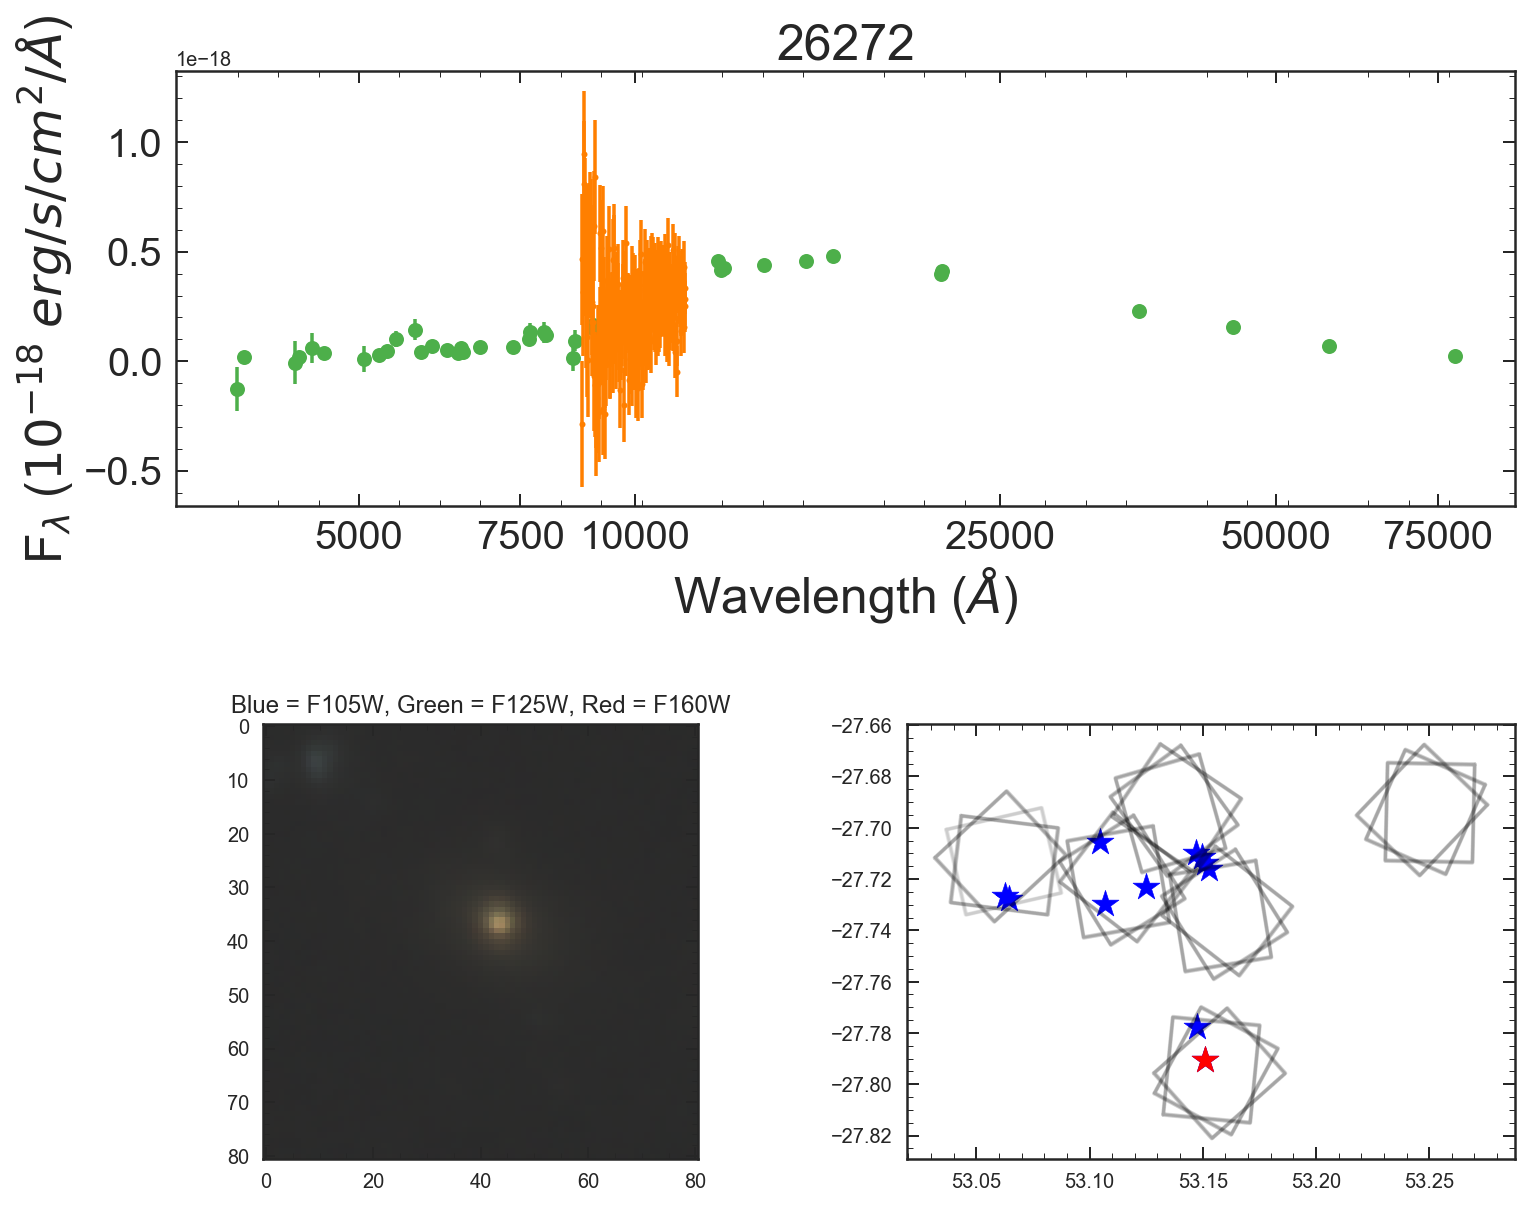

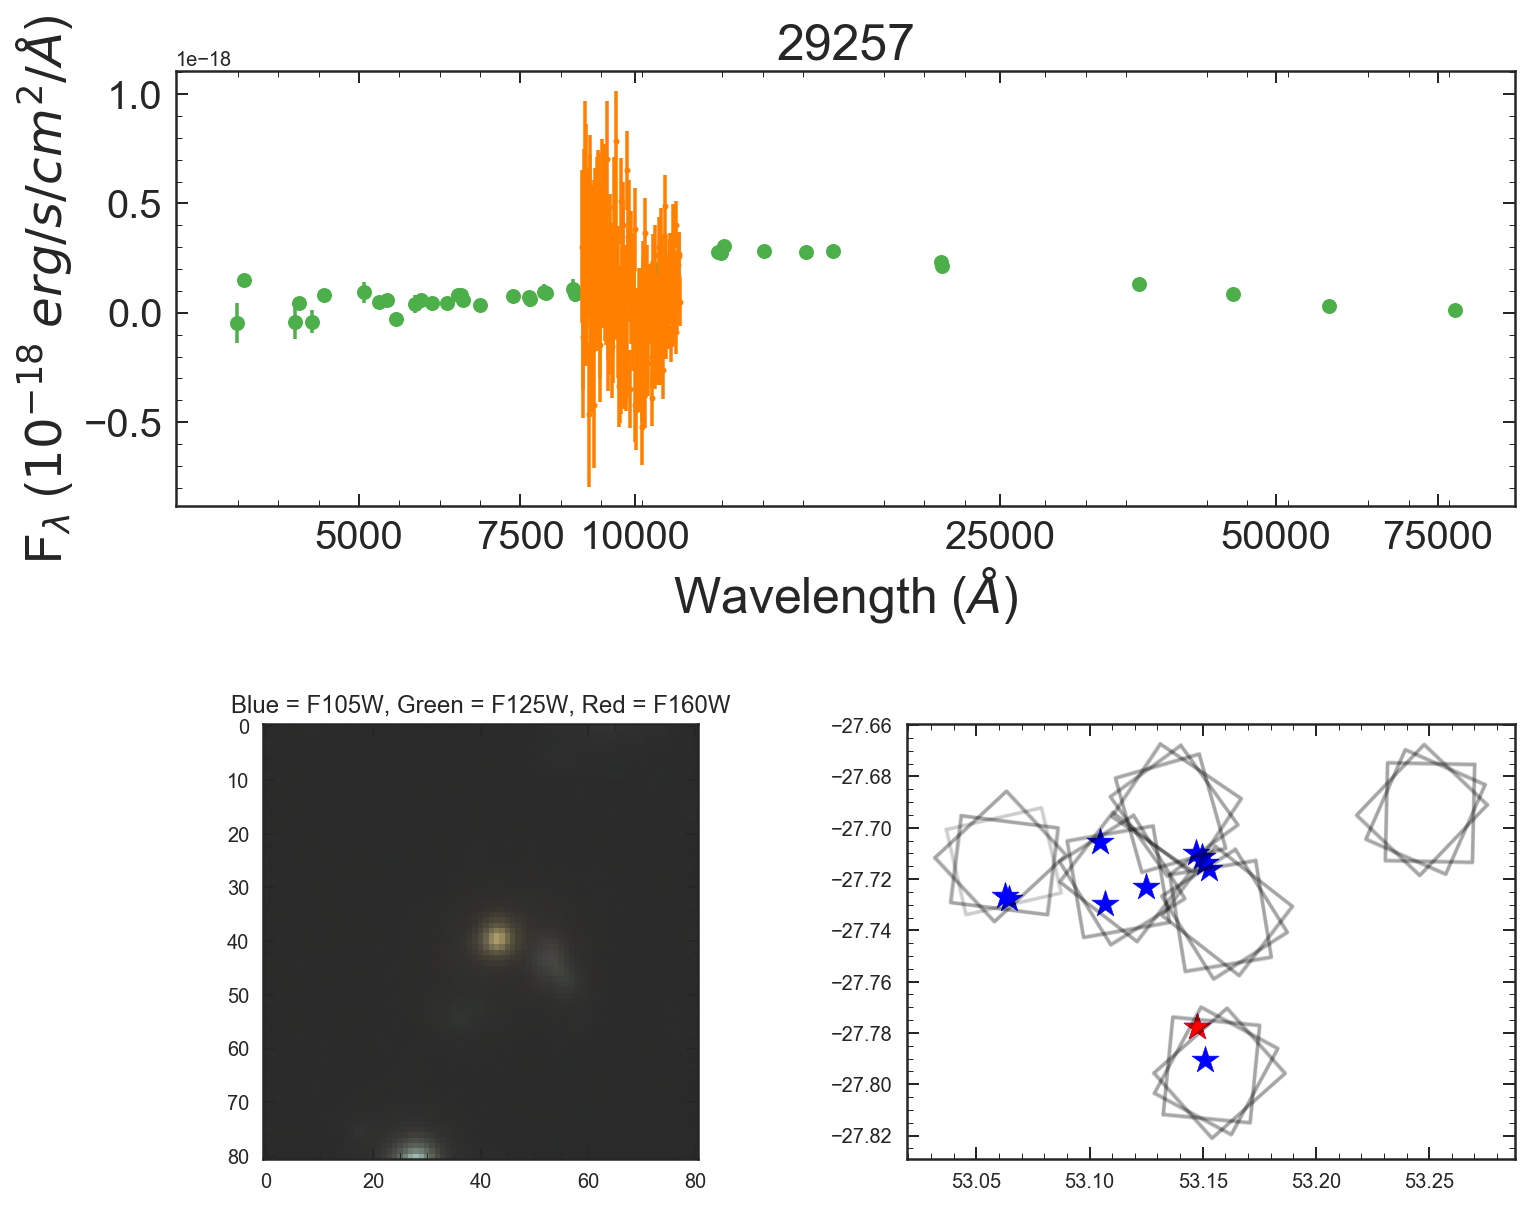

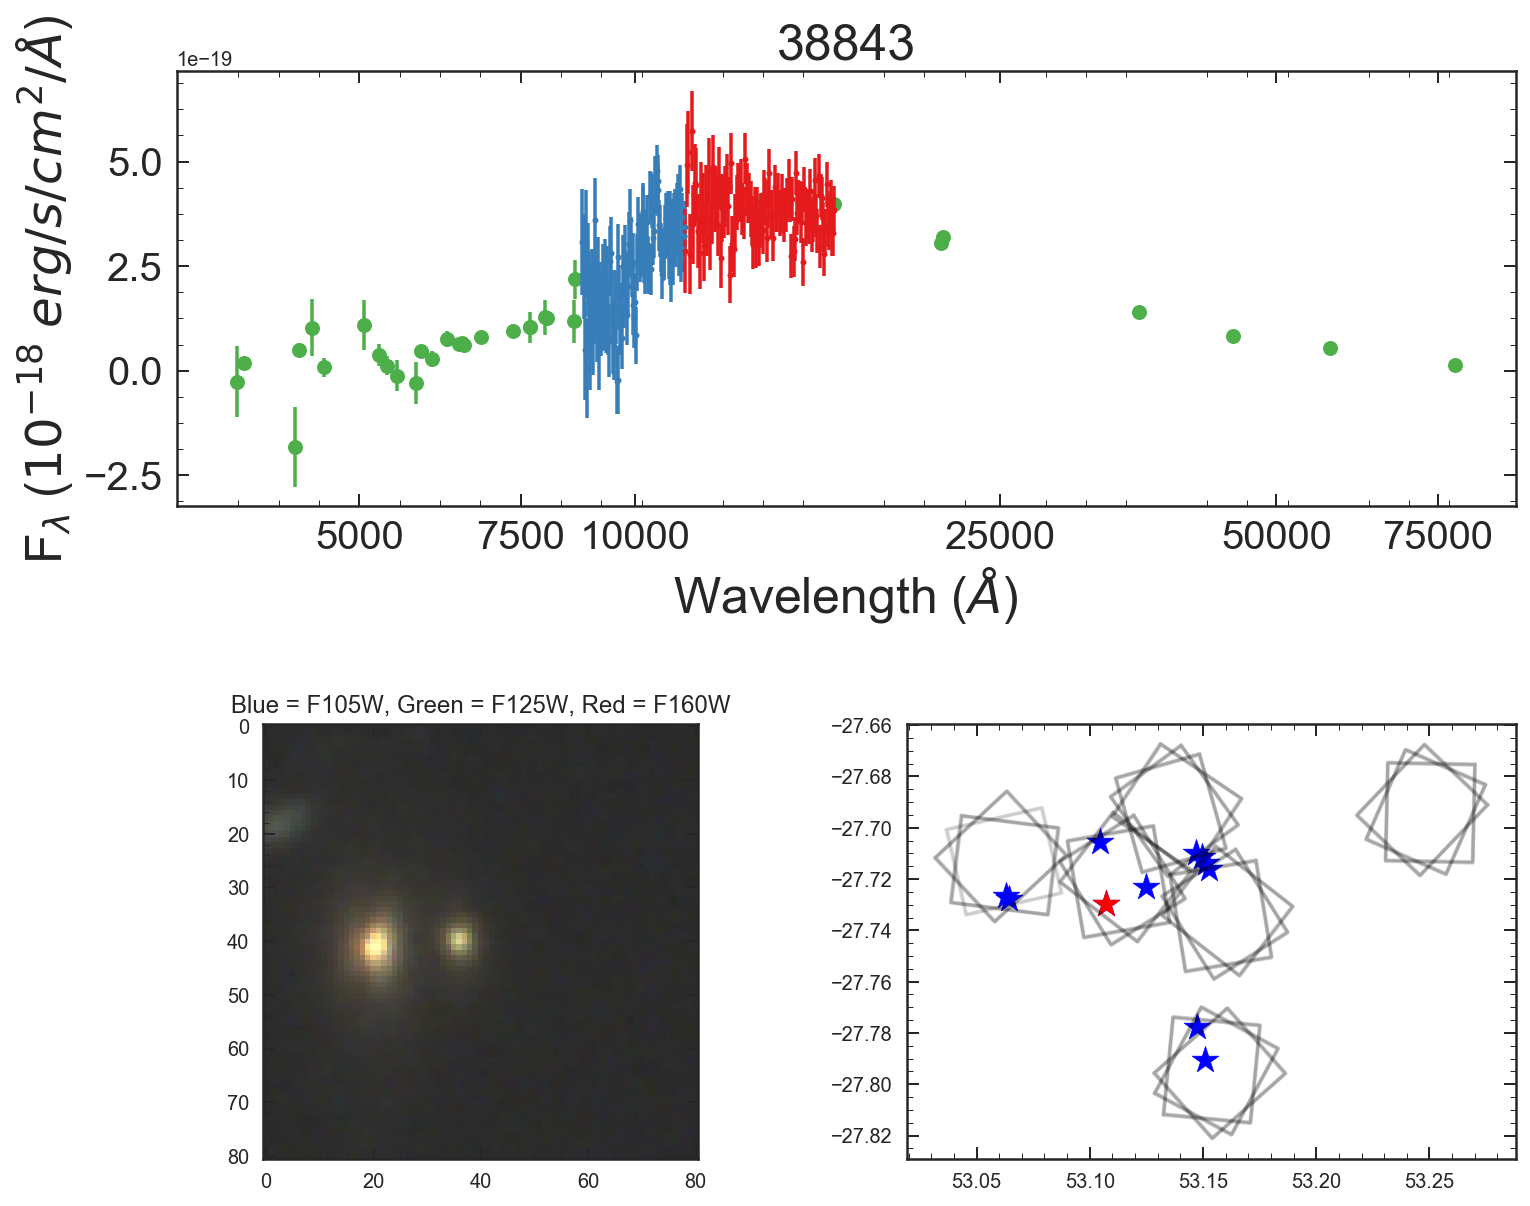

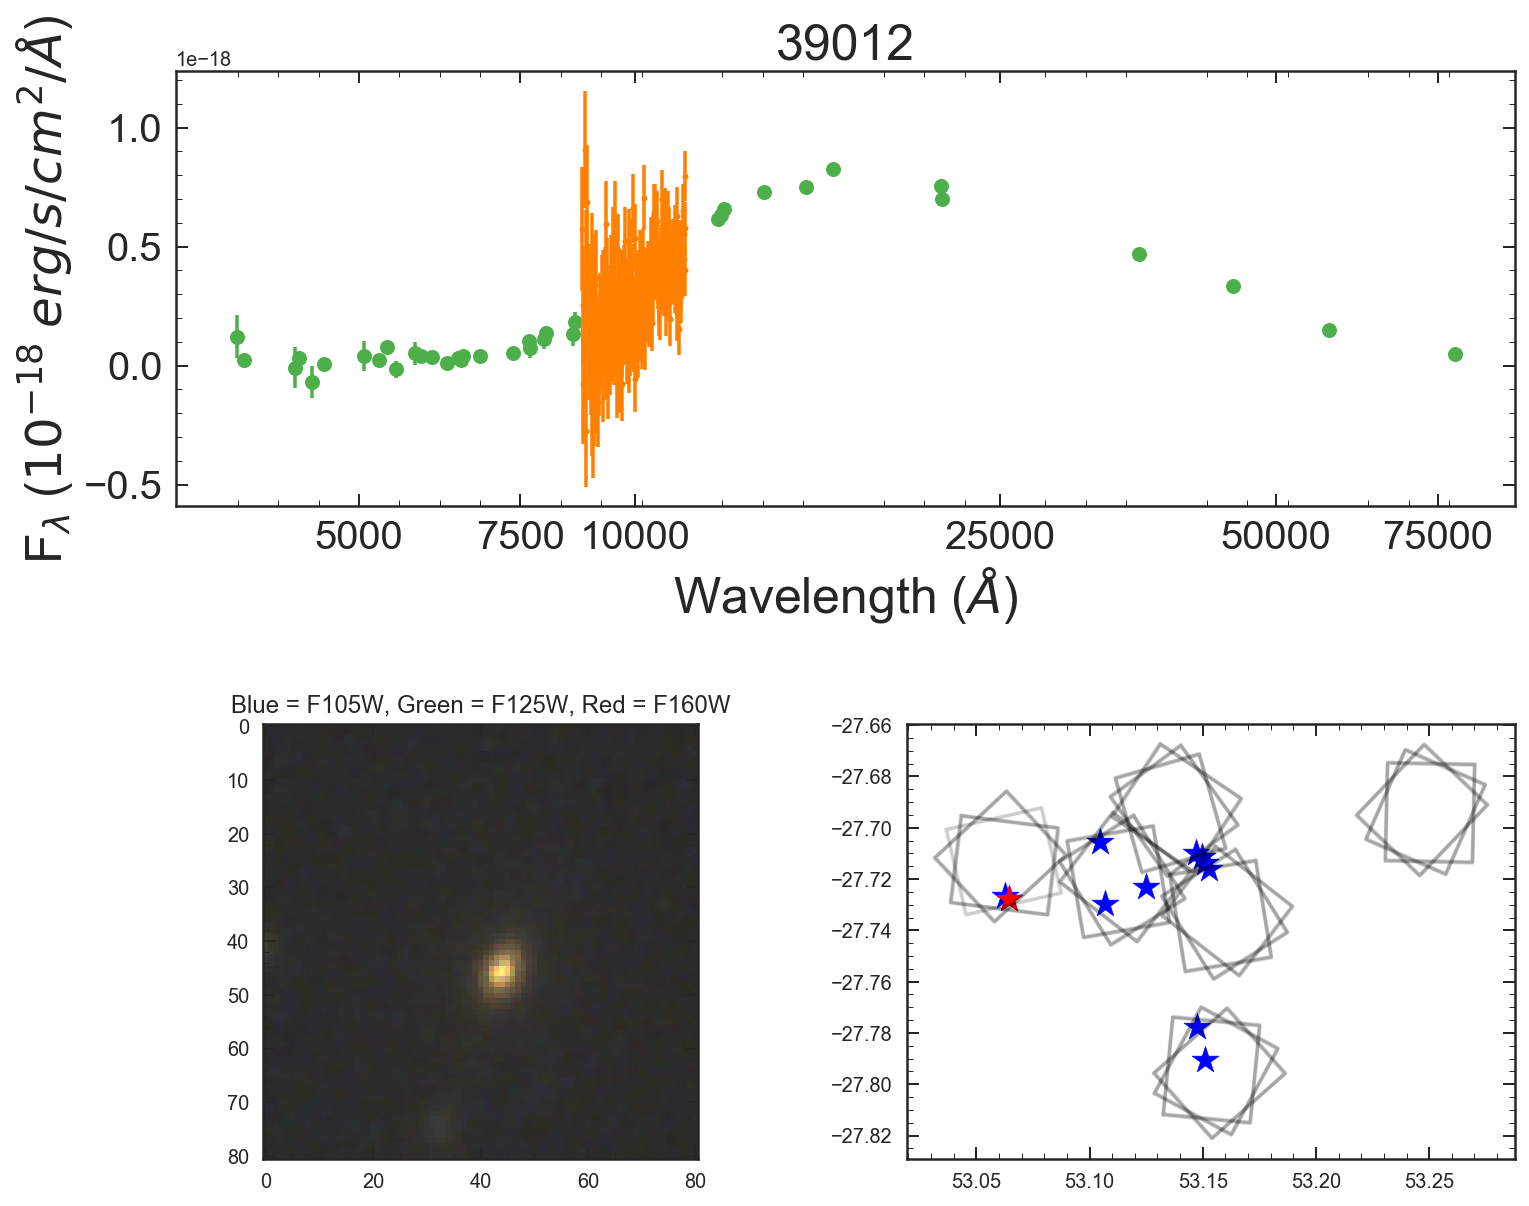

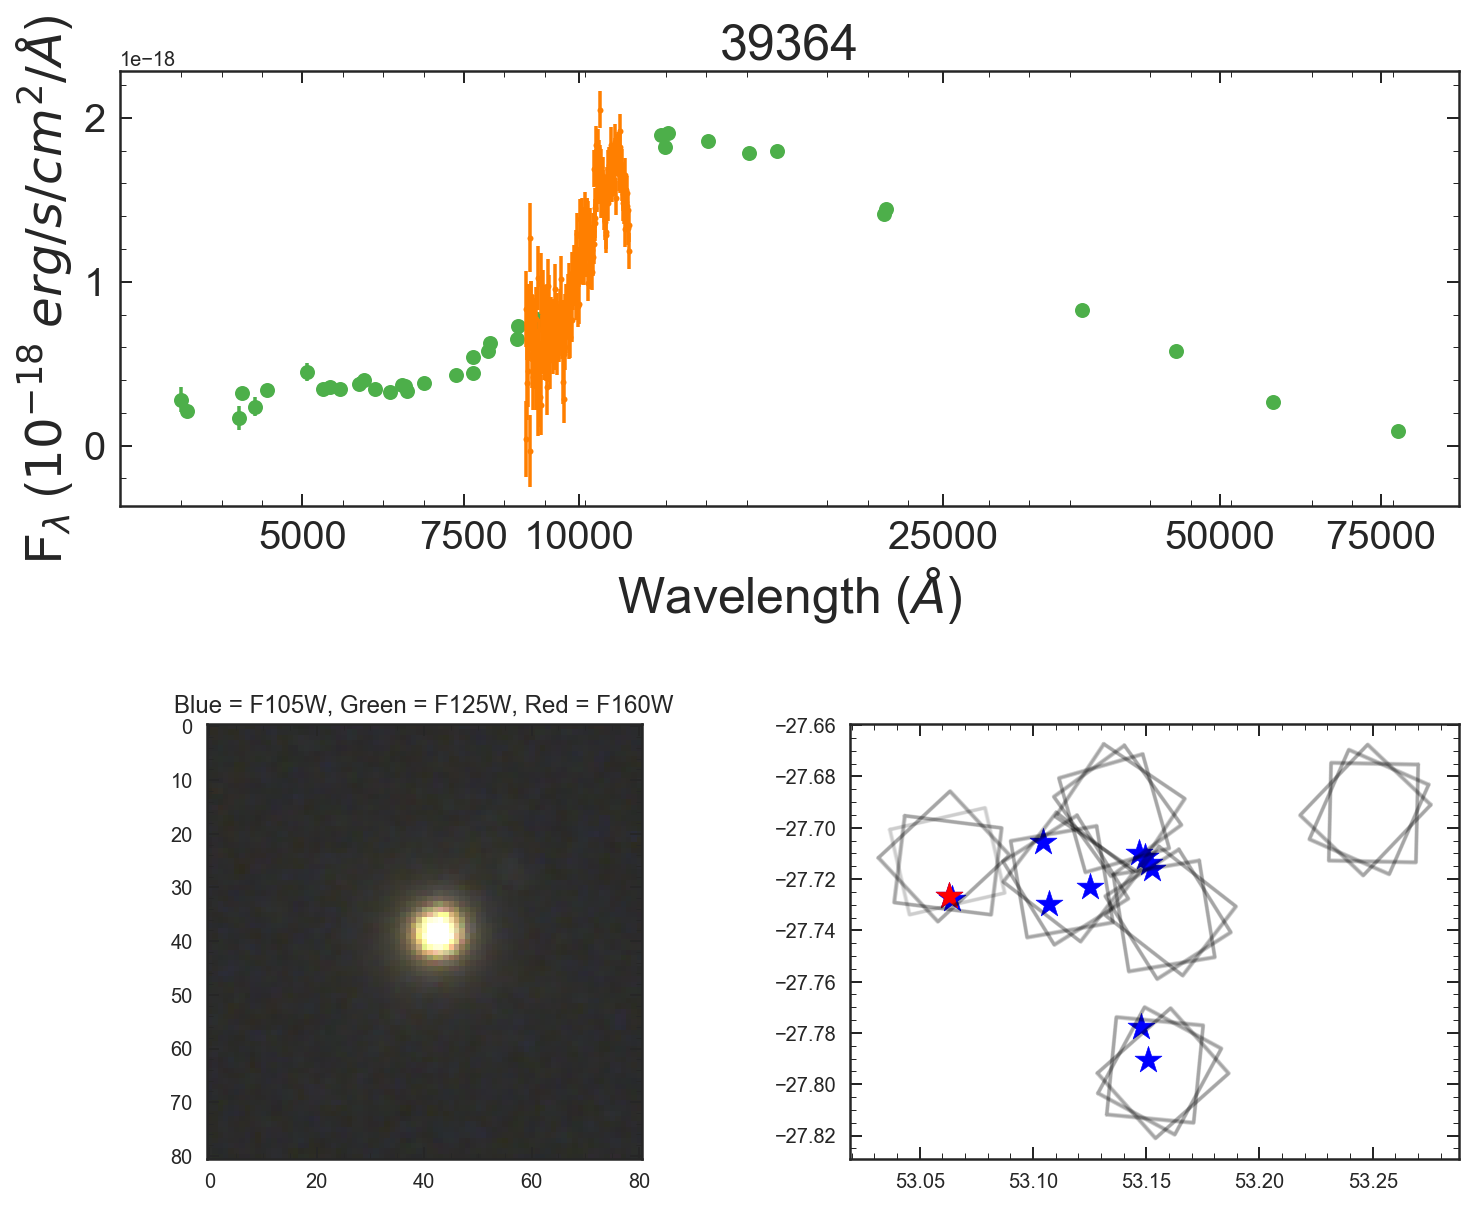

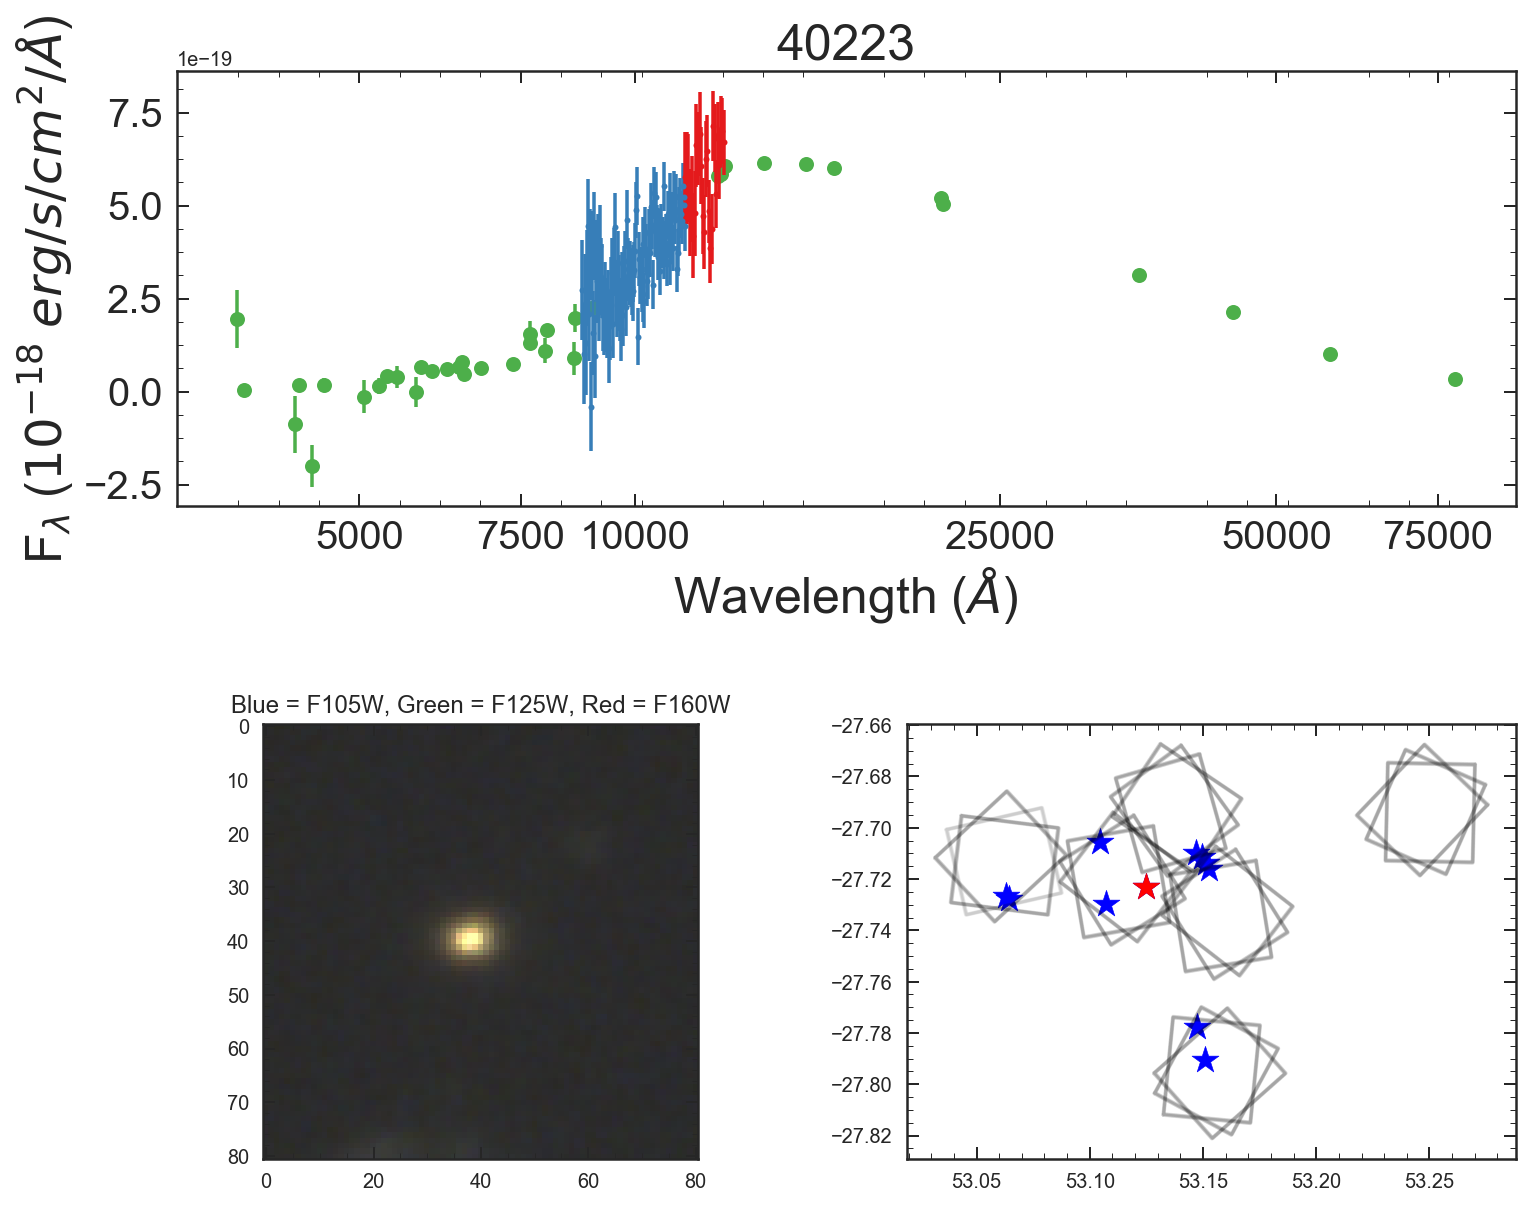

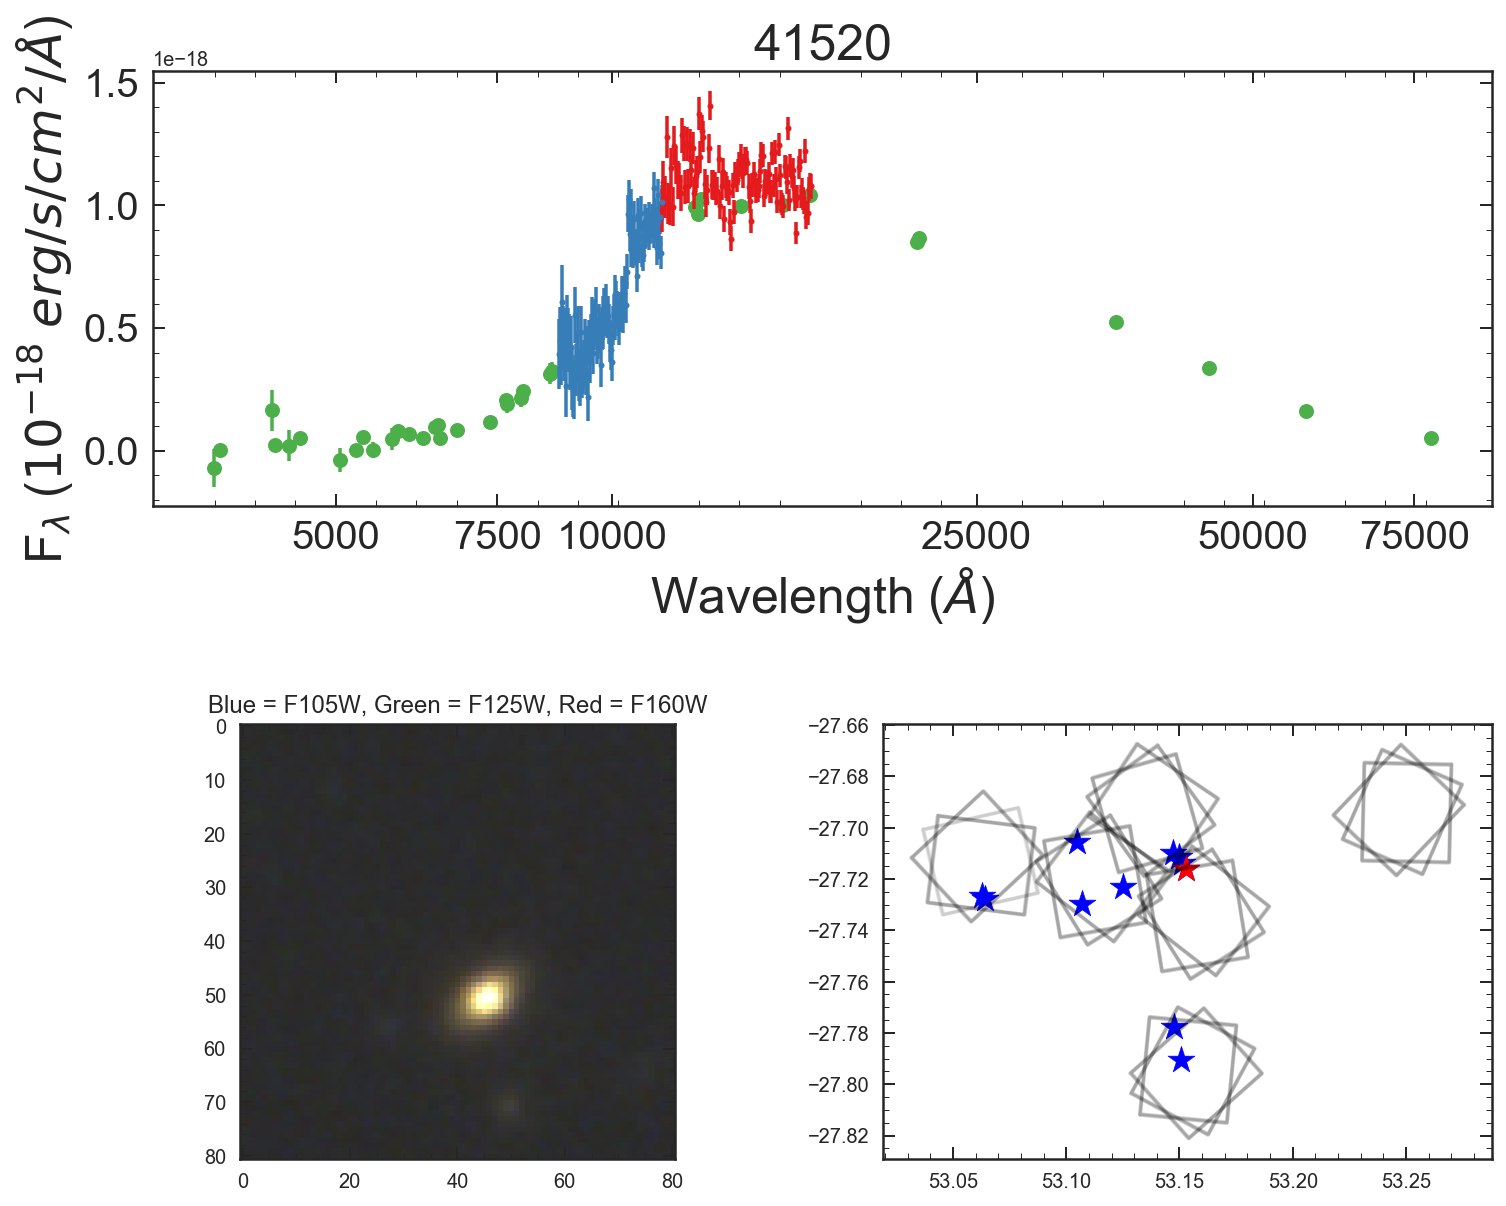

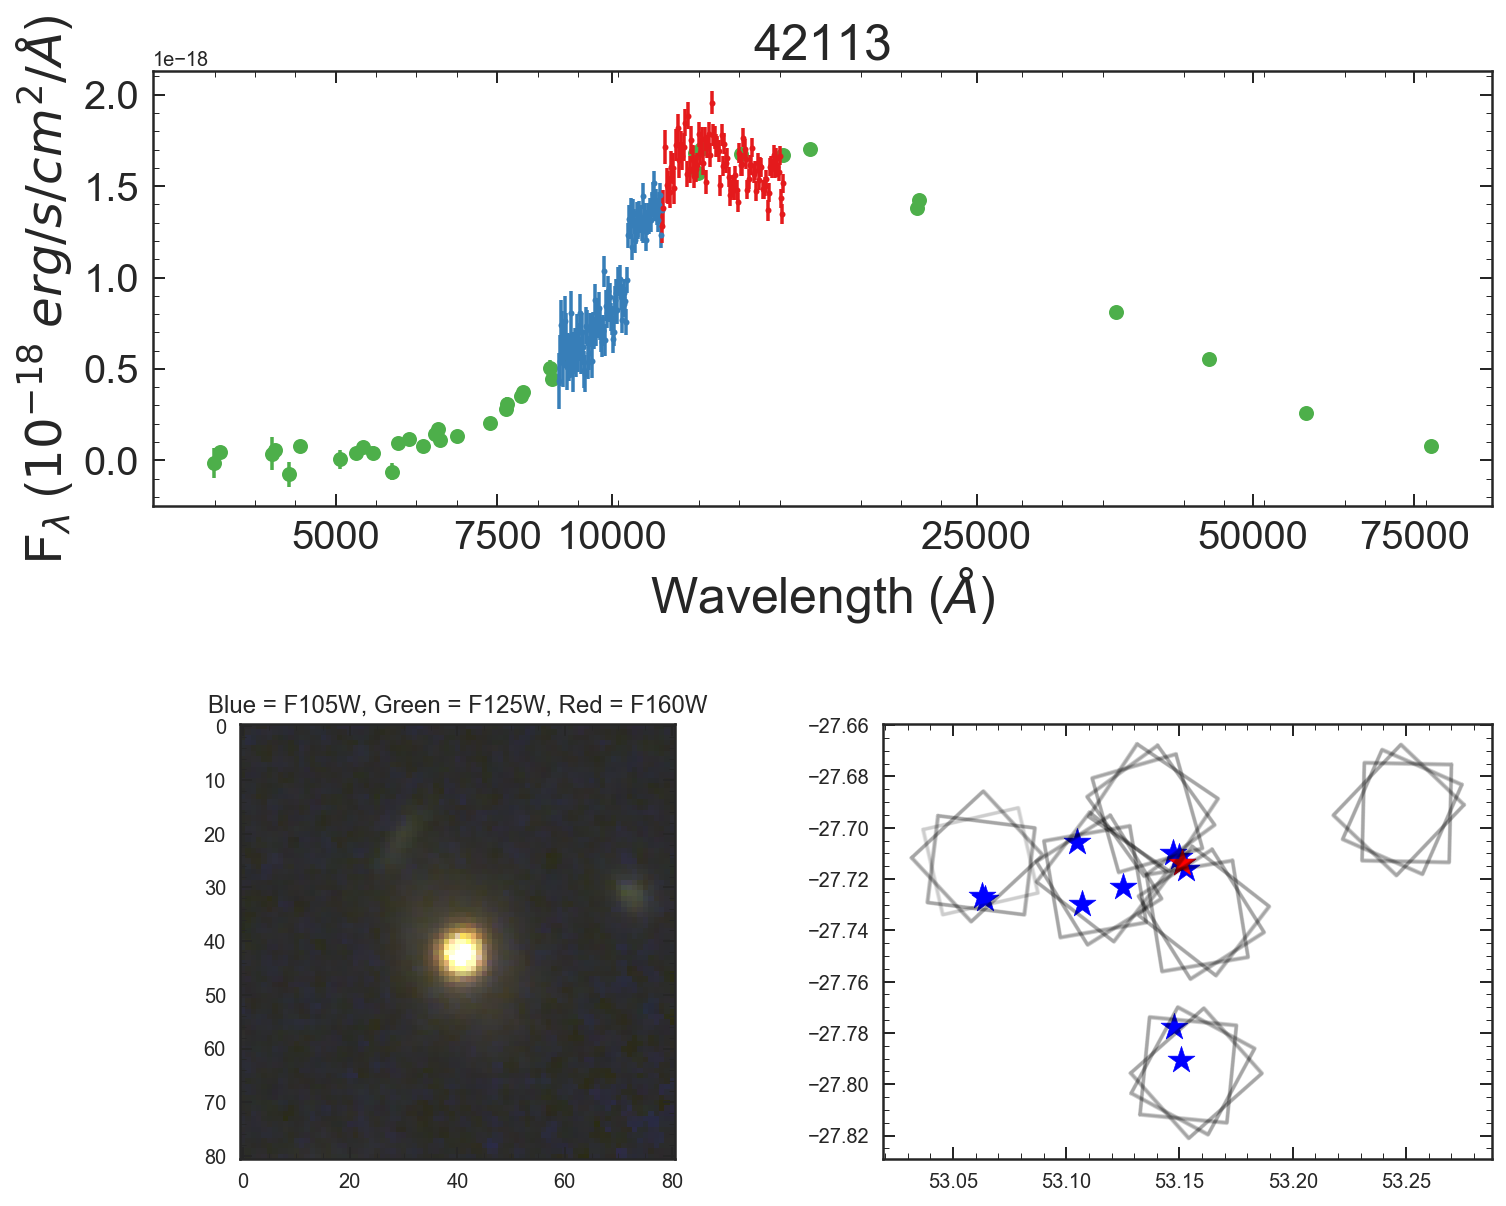

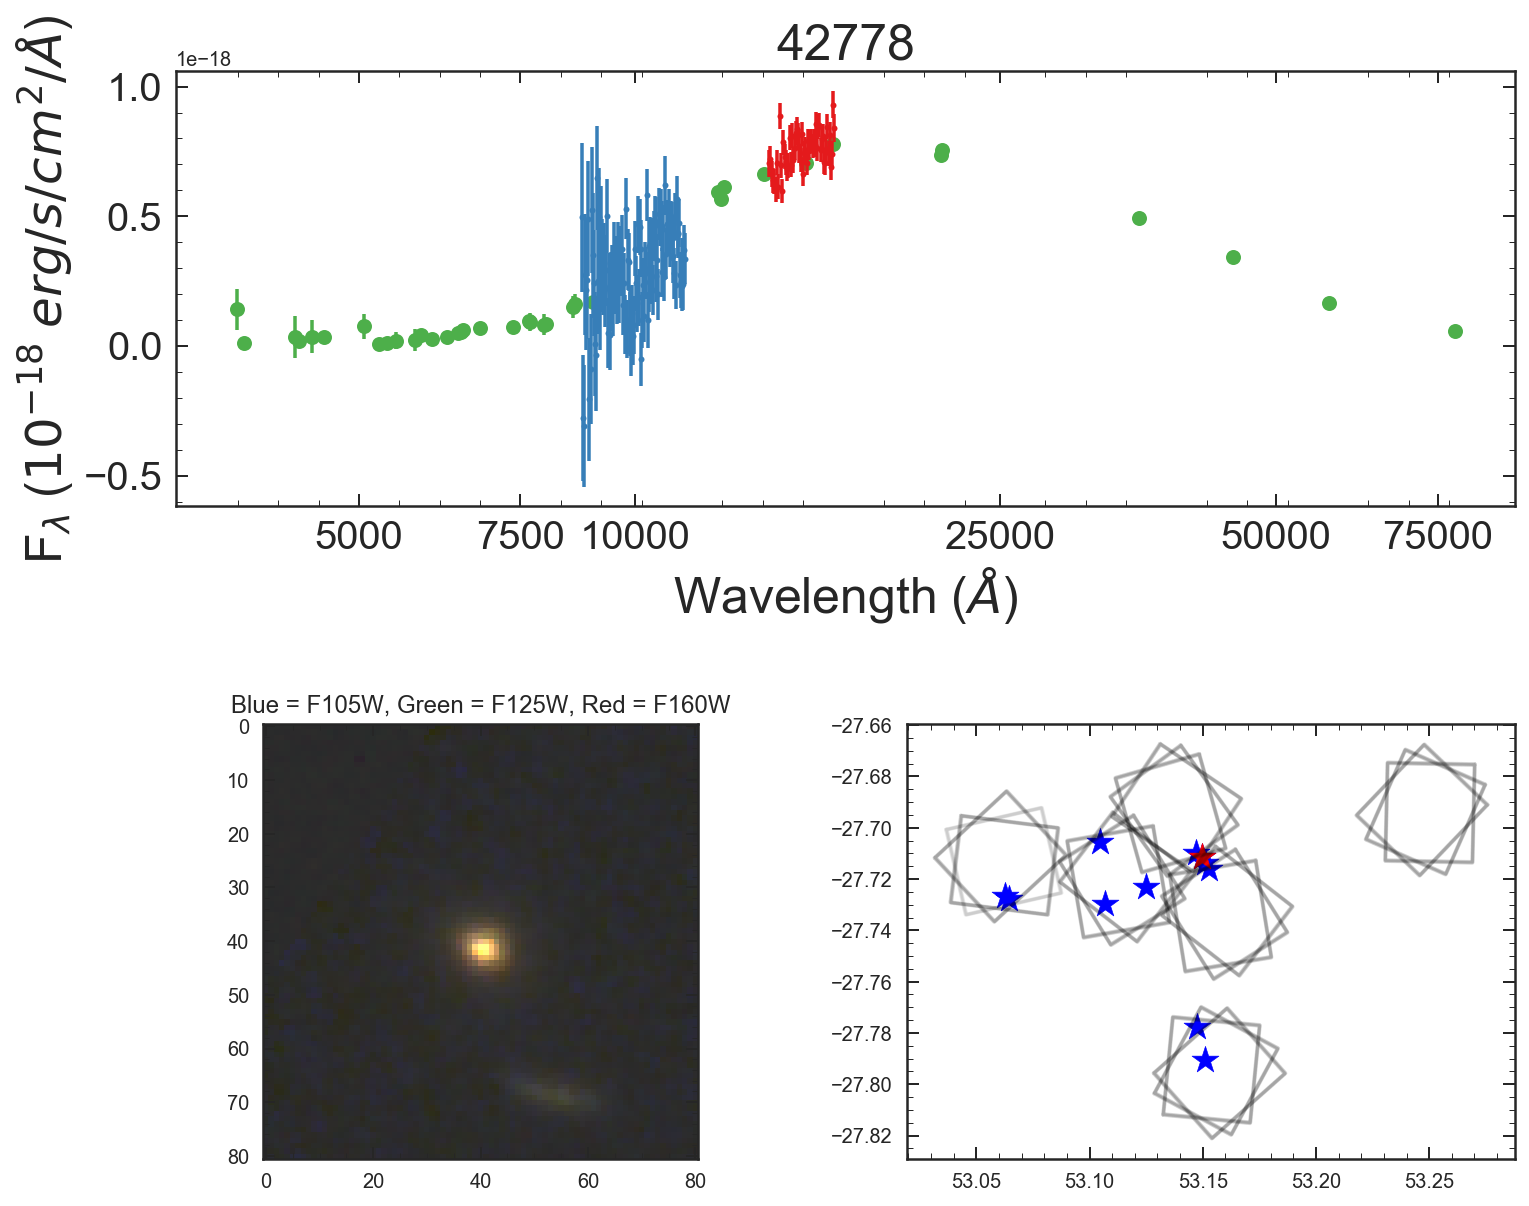

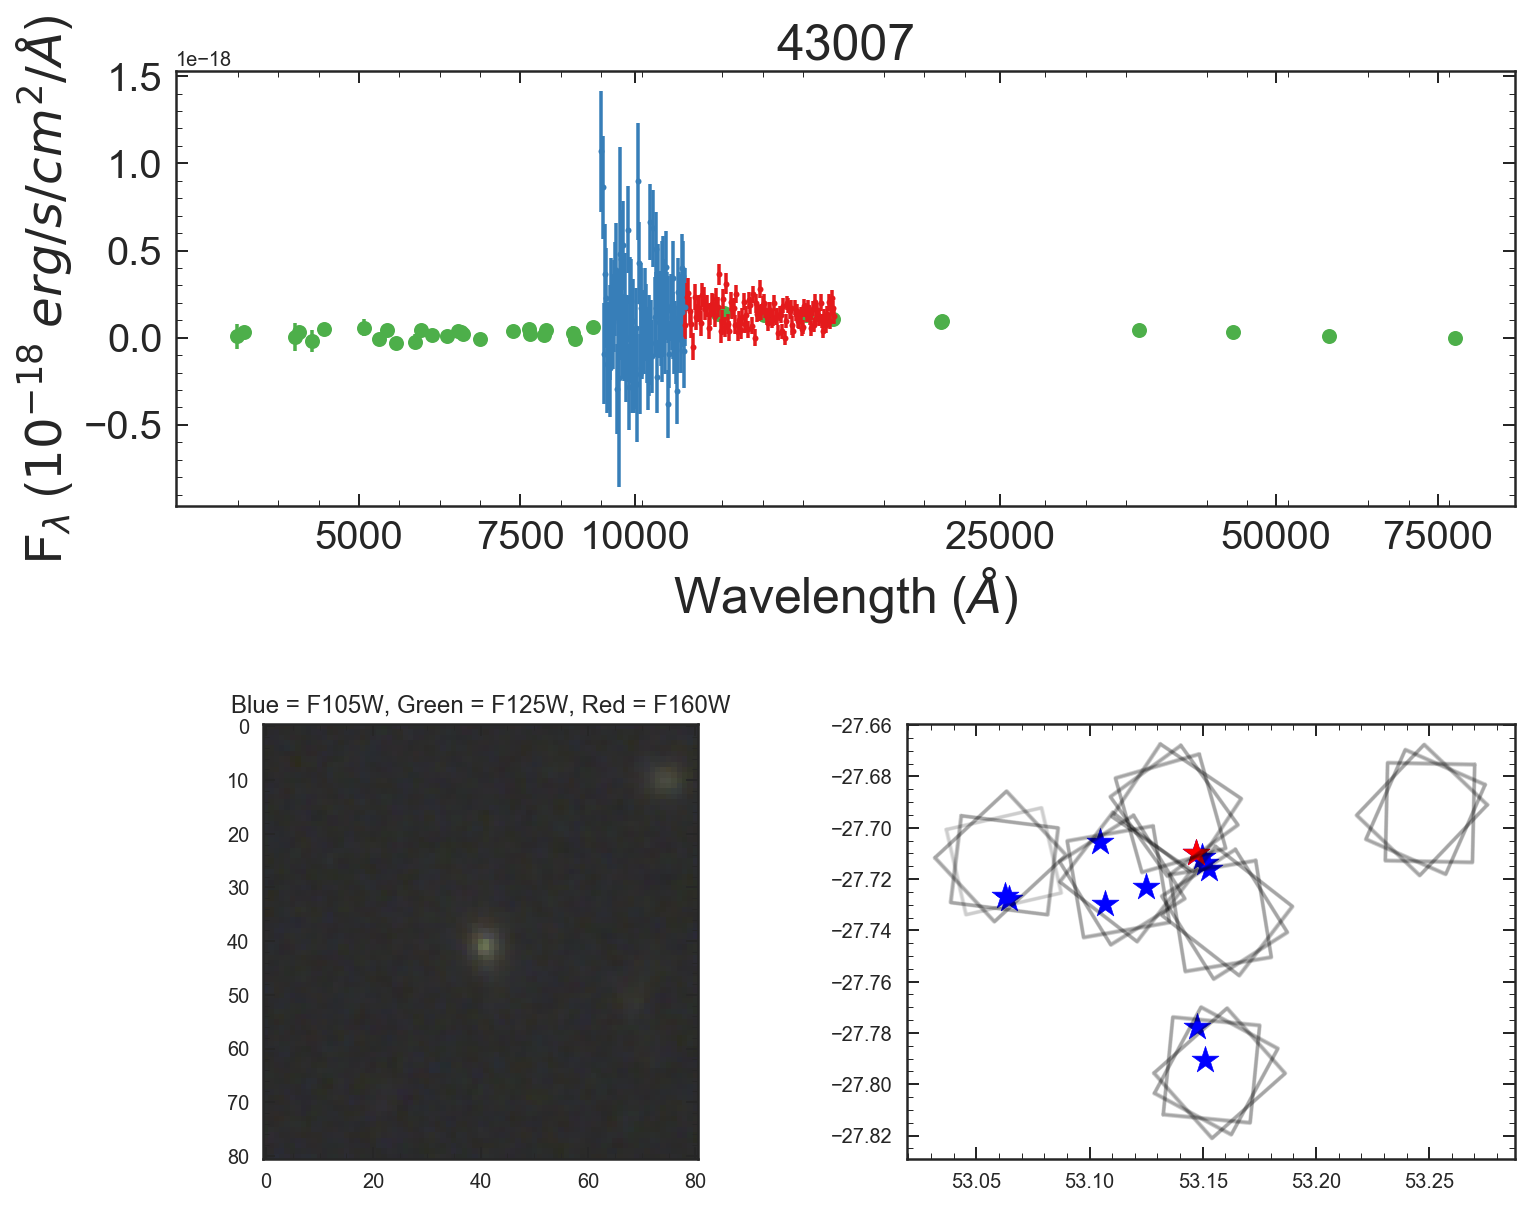

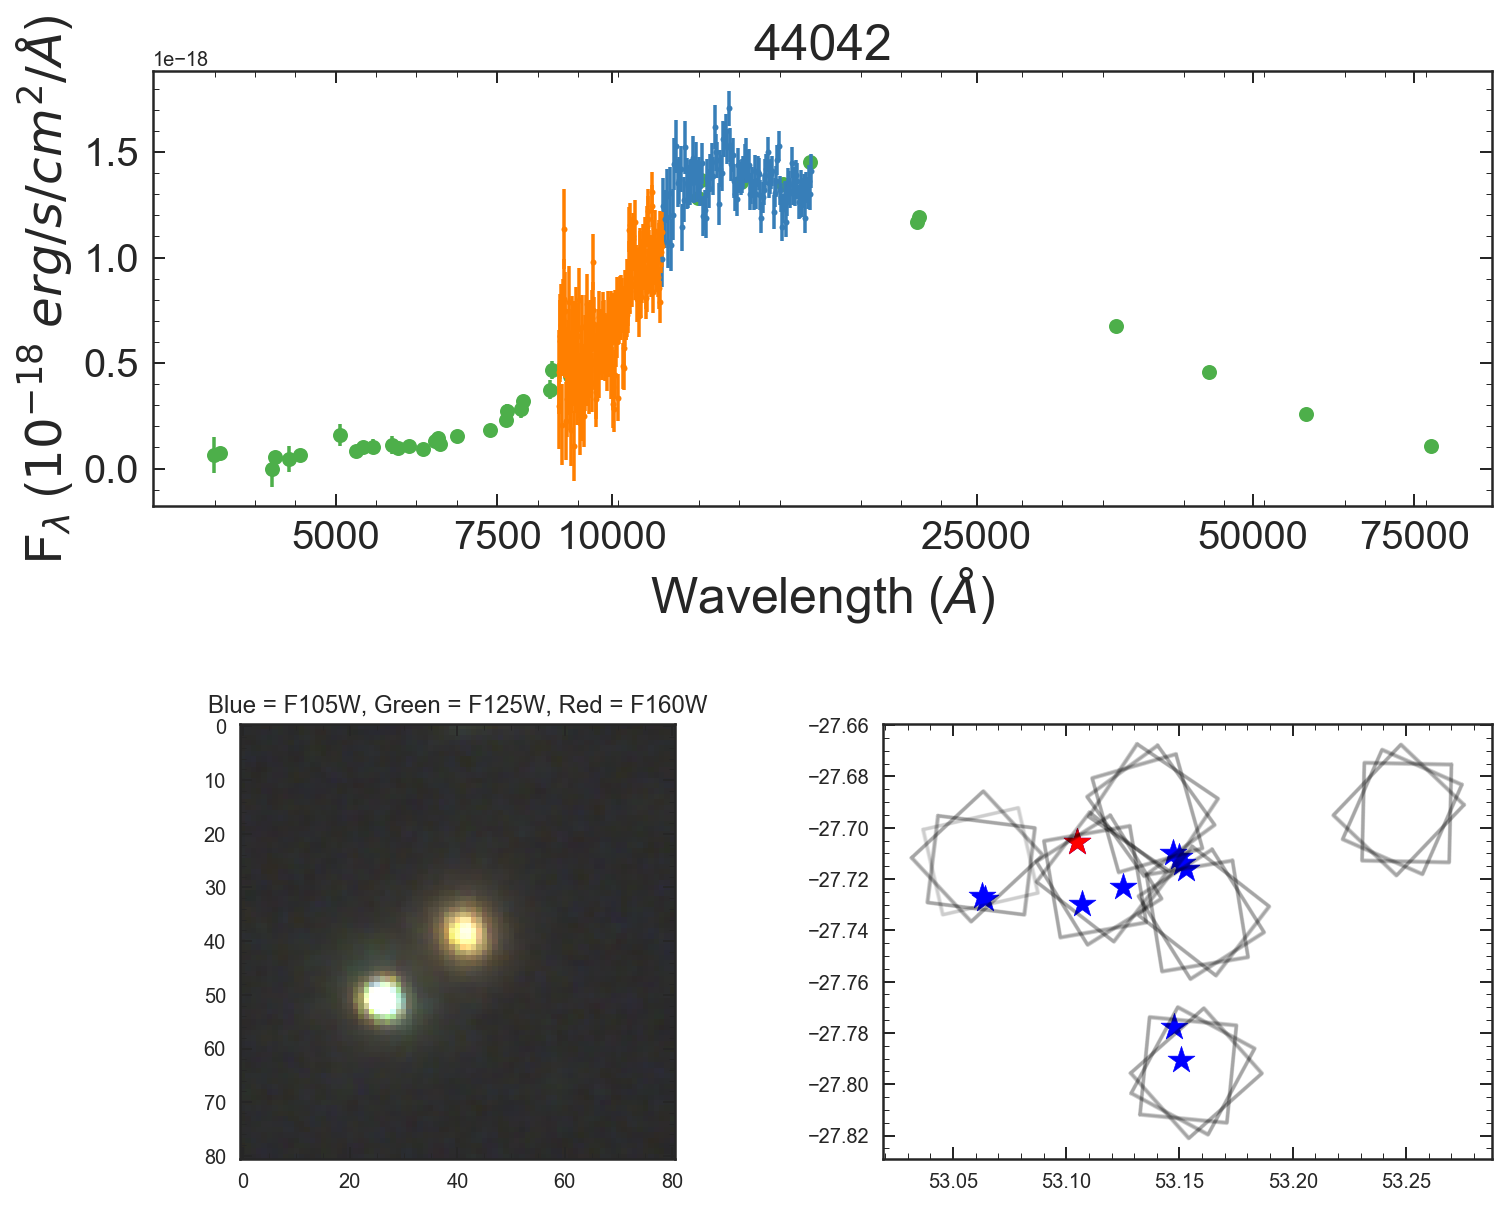

In [15]:
R2_USE = [0,0,1,0,0,1,1,1,1,1,1]
R1_USE = [1,1,0,1,1,0,0,0,0,0,1]
CLIPB = [None, None, None, None, None, None, None, None, None, None, None]
CLIPR = [None, None, None, None, None, [12500,80000], None, [15400,80000], [8000,14000], None, None]

for i in range(len(SQ_up)):
    PLOT(v4S.id[SQ_up[i]], R2=R2_USE[i], R1=R1_USE[i], clipR=CLIPR[i])

/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_fiel

img_scale : asinh
img_scale : asinh
img_scale : asinh


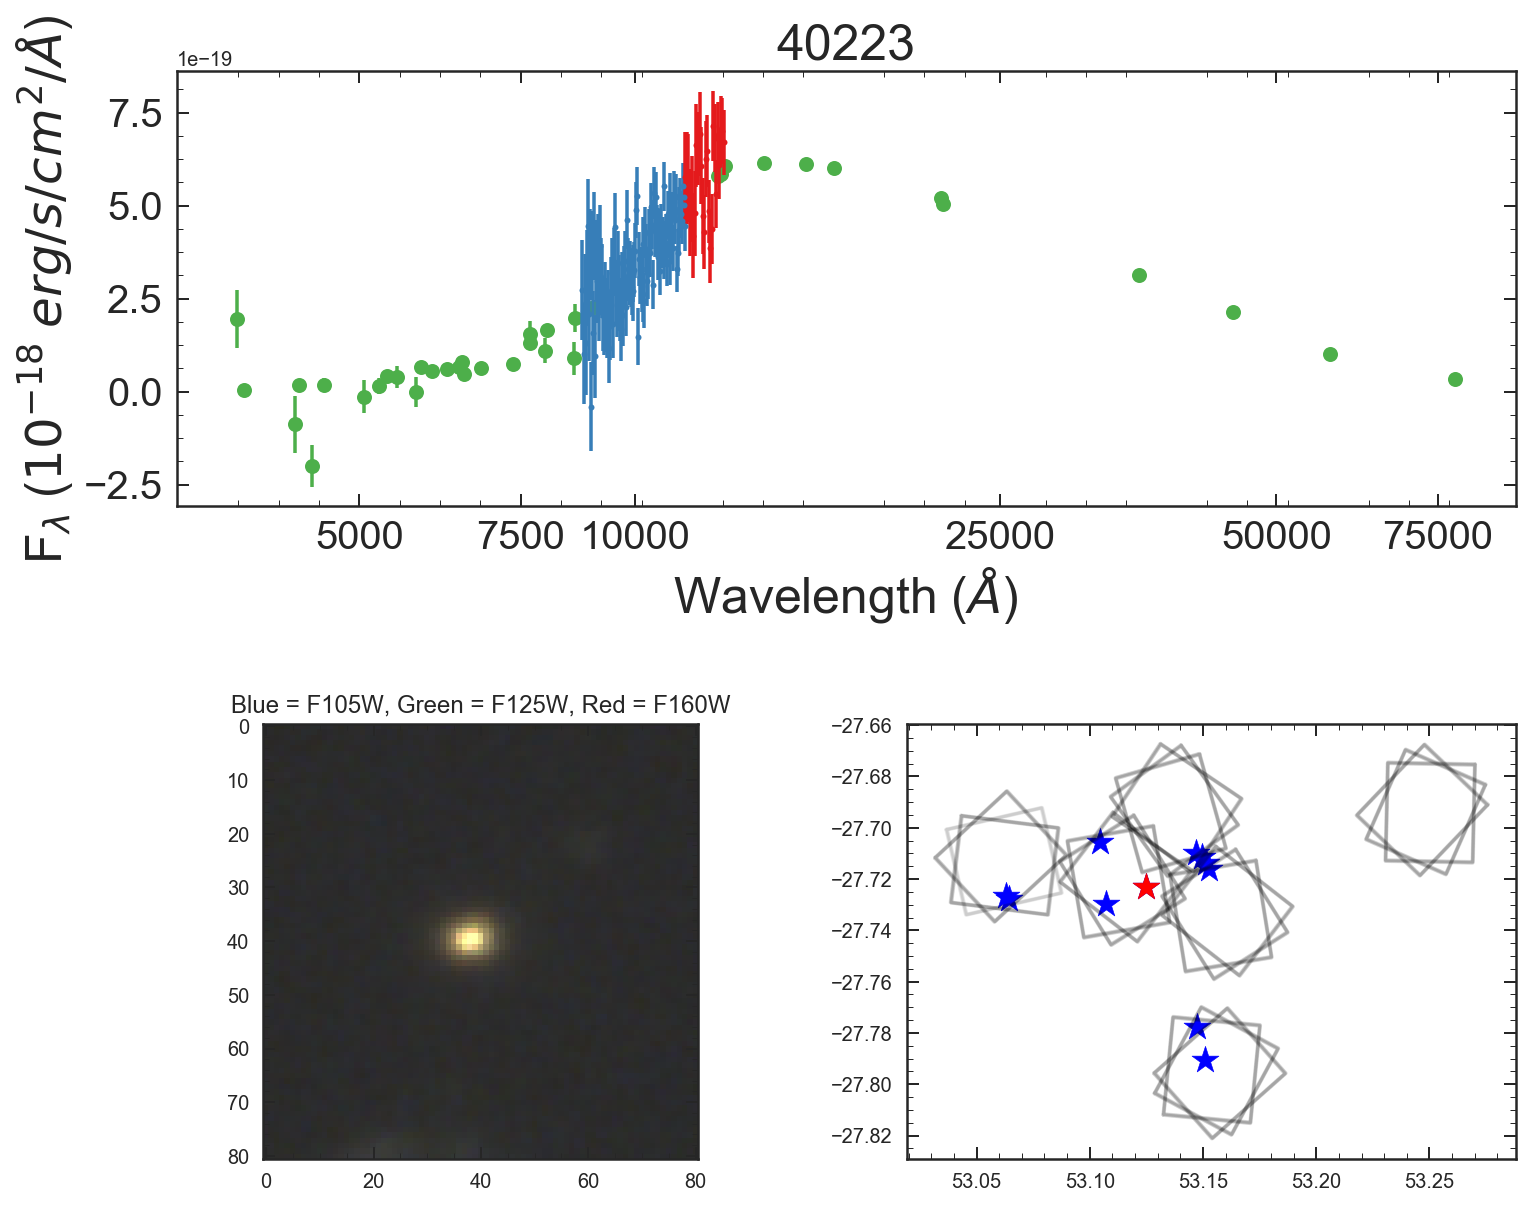

In [128]:
PLOT(40223, R2=True, R1=False, clipR=[12500,80000])

# get P(z)

In [2]:
from spec_exam import Gen_ALMA_spec
import dynesty
from dynesty import plotting as dyplot
from dynesty.utils import quantile as _quantile
from scipy.ndimage import gaussian_filter as norm_kde
from multiprocessing import Pool
from scipy import stats
import fsps
from sim_engine import *

In [3]:
Gs = Gen_ALMA_spec(41520,1, g102_lims=[8750,11300], g141_lims=[11200,16500], mdl_err=False)

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


<ErrorbarContainer object of 3 artists>

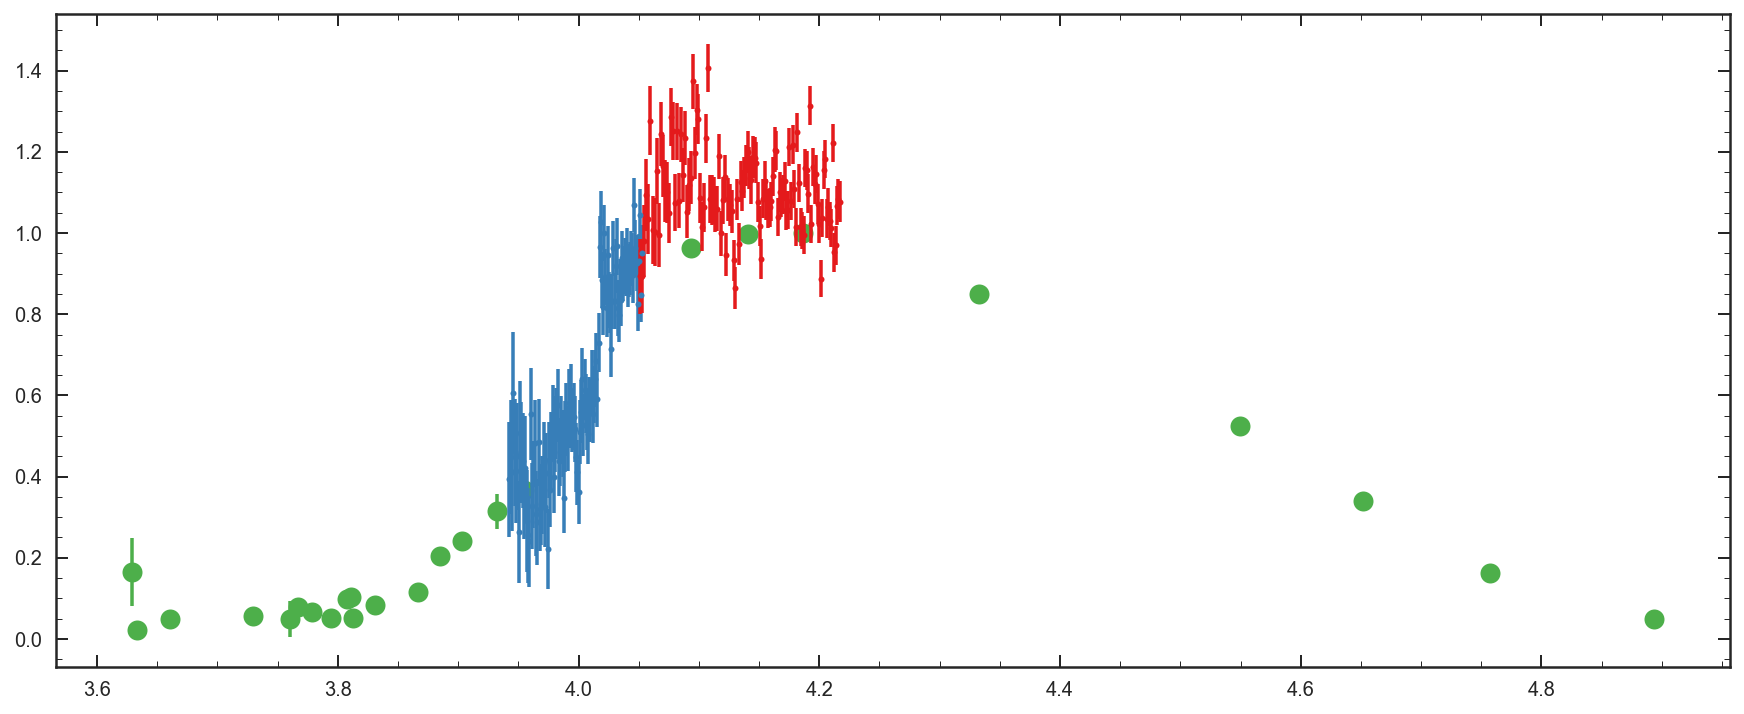

In [4]:
plt.figure(figsize=[15,6])
plt.errorbar(np.log10(Gs.Bwv),Gs.Bfl*1E18,Gs.Ber*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8',zorder = 2, label = 'CLEAR G102')
plt.errorbar(np.log10(Gs.Rwv),Gs.Rfl*1E18,Gs.Rer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c',zorder = 2, label = '3D-HST G141')
plt.errorbar(np.log10(Gs.Pwv),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='o', markersize=10, color='#4daf4a',zorder = 1, label = '3D-HST Photometry')

In [5]:
from spec_tools import Oldest_galaxy

In [6]:
Oldest_galaxy(1.4)

4.535936166227886

## Set Prior and Likelihood

In [7]:
sp = fsps.StellarPopulation(imf_type = 2, tpagb_norm_type=0, zcontinuous = 1, logzsol = np.log10(1), sfh = 4, tau=0.1, dust_type = 1)

############
###priors###
def alma_prior(u):
    m = (0.03 * u[0] + 0.001) / 0.019
    a = (4.5 - 0.01)* u[1] + 0.01
    t = (1 - 0.001)*u[2] + 0.001  
    z = stats.norm.ppf(u[3],loc = 1.6, scale = 0.1)
    d = u[4]
    return [m, a, t, z, d]

############
#likelihood#
def Gather_grism_sim_data(spec):
    wvs = []
    flxs = []
    errs = []
    beams = []
    trans = []
    
    if spec.g102:
        wvs.append(spec.Bwv)
        flxs.append(spec.Bfl)
        errs.append(spec.Ber)
        beams.append(spec.Bbeam)
        trans.append(spec.Btrans)
    
    if spec.g141:
        wvs.append(spec.Rwv)
        flxs.append(spec.Rfl)
        errs.append(spec.Rer)
        beams.append(spec.Rbeam)
        trans.append(spec.Rtrans)

    return np.array([wvs, flxs, errs, beams, trans])

def forward_model_all_beams(beams, trans, in_wv, model_wave, model_flux):
    FL = np.zeros([len(beams),len(in_wv)])

    for i in range(len(beams)):
        mwv, mflx = forward_model_grism(beams[i], model_wave, model_flux)
        FL[i] = interp1d(mwv, mflx)(in_wv)
        FL[i] /= trans[i]

    return np.mean(FL.T,axis=1)

def Full_forward_model(spec, wave, flux, specz):
    Gmfl = []
    
    for i in range(len(wvs)):
        Gmfl.append(forward_model_all_beams(beams[i], trans[i], wvs[i], wave * (1 + specz), flux))

    Pmfl = spec.Sim_phot_mult(wave * (1 + specz),flux)

    return np.array(Gmfl), Pmfl


def Full_fit(spec, Gmfl, Pmfl):
    Gchi = 0
    
    for i in range(len(wvs)):
        scale = Scale_model(flxs[i], errs[i], Gmfl[i])
        Gchi = Gchi + np.sum(((((flxs[i] / scale) - Gmfl[i]) / (errs[i] / scale))**2))

    Pchi = np.sum((((spec.Pflx - Pmfl) / spec.Perr)**2))
    
    return Gchi, Pchi

def Full_scale(spec, Pmfl):
    return Scale_model(spec.Pflx, spec.Perr, Pmfl)

wvs, flxs, errs, beams, trans = Gather_grism_sim_data(Gs)

def alma_L(X):
    m, a, t, z, d = X
    
    sp.params['logzsol'] = np.log10( m )
    sp.params['dust2'] = d
    sp.params['dust1'] = d
    sp.params['tau'] = t

    wave, flux = sp.get_spectrum(tage = a, peraa = True)
       
    Gmfl, Pmfl = Full_forward_model(Gs, wave, flux, z)
    
    PC = Full_scale(Gs, Pmfl)

    Gchi, Pchi = Full_fit(Gs, PC*Gmfl, PC*Pmfl)
                  
    return -0.5 * (Gchi + Pchi)


In [8]:
sampler = dynesty.DynamicNestedSampler(alma_L, alma_prior, ndim = 5, sample = 'rwalk', bound = 'single',
                                  queue_size = 8, pool = Pool(processes=8))  

In [9]:
sampler.run_nested(wt_kwargs={'pfrac': 1.0}, dlogz_init=0.01, print_progress=True)

dres = sampler.results

iter: 24255 | batch: 7 | bound: 1173 | nc: 25 | ncall: 572744 | eff(%):  4.235 | loglstar: -359.014 < -351.157 < -352.969 | logz: -369.293 +/-  0.165 | stop:  0.981            


(<Figure size 864x1080 with 10 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a90ba82e8>,
       dtype=object))

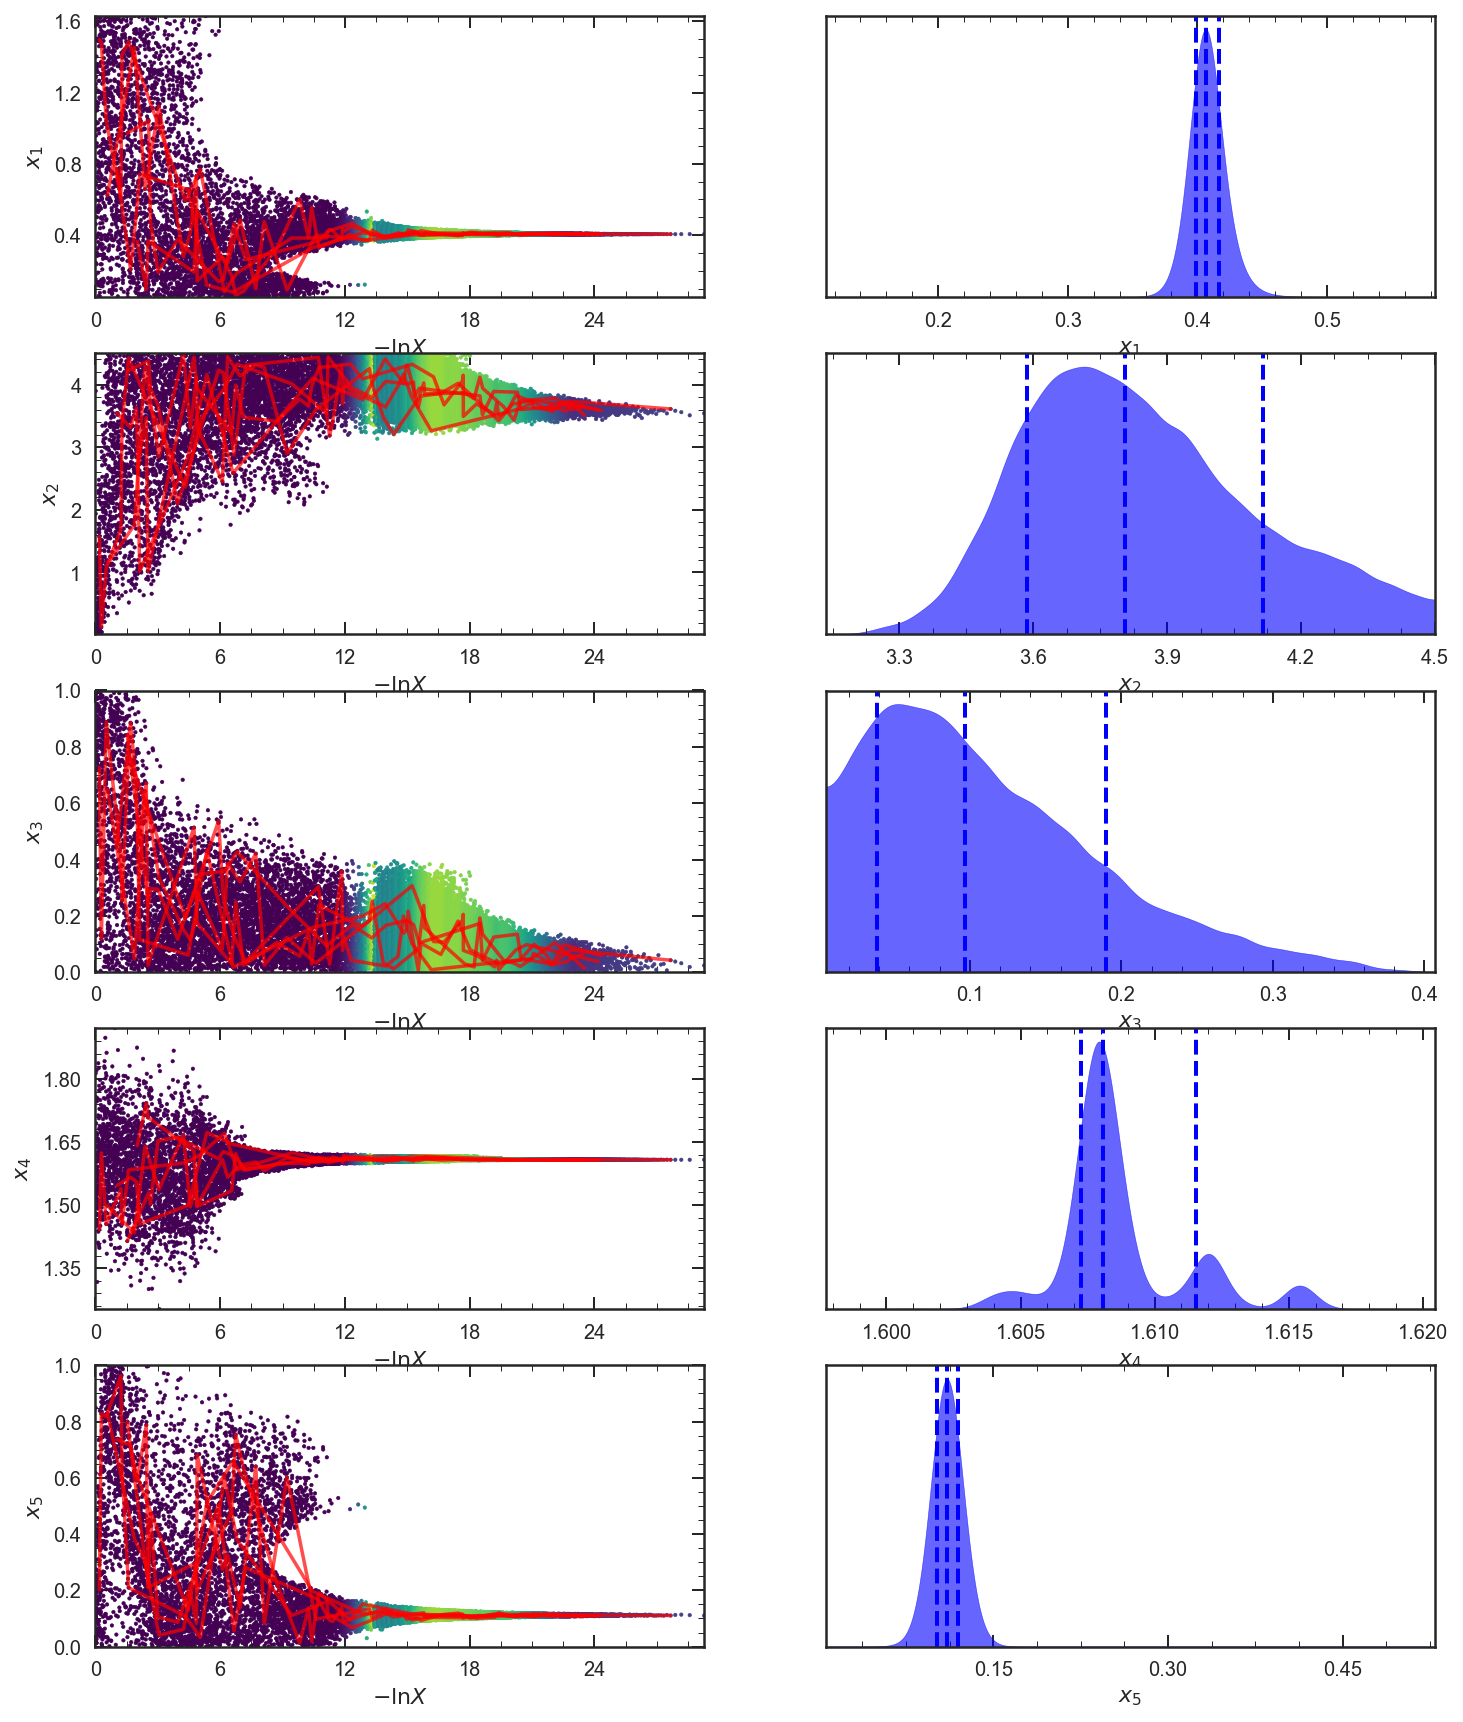

In [10]:
dyplot.traceplot(dres, truths=None, truth_color='black',
                             show_titles=False, title_kwargs={'fontsize': 5, 'y': 1.05},
                             trace_cmap='viridis', kde=False,
                             connect=True, connect_highlight=range(5))